# Minería de datos caso Interbank

#### Objetivo: Estimar la probabilidad de default de la BD de clientes interbank que han adquirido un prestamo

In [1]:
# Importando las librerias 
#-------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly

import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
#Lectura de bases de datos
#rcc_train : 1.4 GB
#se_train: 27.5 MB
#sunat_train: 107MB
#y_train: 3MB

In [3]:
rcc_train = pd.read_csv("D:/Maestria-URP/2020-III/Aprendizaje maquina_2pm/DATA_IBK/rcc_train.csv")
#se_train = pd.read_csv("D:/Maestria-URP/2020-III/Minería de Datos en Analítica de Negocio II/BASE DE DATOS/DATA_IBK/se_train.csv", index_col="key_value")
#sunat_train = pd.read_csv("D:/Maestria-URP/2020-III/Minería de Datos en Analítica de Negocio II/BASE DE DATOS/DATA_IBK/sunat_train.csv")
#y_train = pd.read_csv("D:/Maestria-URP/2020-III/Minería de Datos en Analítica de Negocio II/BASE DE DATOS/DATA_IBK/y_train.csv", index_col="key_value").target

#rcc_test= pd.read_csv("D:/Maestria-URP/2020-III/Minería de Datos en Analítica de Negocio II/BASE DE DATOS/DATA_IBK/rcc_test.csv")
#se_test= pd.read_csv("D:/Maestria-URP/2020-III/Minería de Datos en Analítica de Negocio II/BASE DE DATOS/DATA_IBK/se_test.csv", index_col="key_value")
#sunat_test= pd.read_csv("D:/Maestria-URP/2020-III/Minería de Datos en Analítica de Negocio II/BASE DE DATOS/DATA_IBK/sunat_test.csv")

In [4]:
rcc_train.head(5)

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
0,201711,4,0,12,33,-0.072601,6,-1,0
1,201711,4,0,12,33,-0.070608,7,-1,0
2,201711,4,0,12,61,-0.052054,5,-1,0
3,201711,4,0,11,32,-0.072456,8,1,0
4,201711,4,0,12,61,-0.057877,0,1,0


In [5]:
#Downcast in order to save memory
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    return df  

In [6]:
rcc_train=downcast(rcc_train)

# Trabajo con base de rcc_train

In [7]:
rcc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30391626 entries, 0 to 30391625
Data columns (total 9 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   codmes                    int32  
 1   key_value                 int32  
 2   condicion                 int16  
 3   tipo_credito              int8   
 4   cod_instit_financiera     int8   
 5   saldo                     float16
 6   PRODUCTO                  int16  
 7   RIESGO_DIRECTO            int8   
 8   COD_CLASIFICACION_DEUDOR  int8   
dtypes: float16(1), int16(2), int32(2), int8(4)
memory usage: 521.7 MB


In [8]:
#Clientes unicos por mes
result =rcc_train.groupby('codmes')['key_value'].nunique()
print(result)

codmes
201703    271195
201704    274087
201705    277157
201706    279899
201707    284332
201708    287315
201709    289606
201710    293824
201711    296166
201712    294880
201801    294427
201802    358487
Name: key_value, dtype: int64


In [9]:
#Clientes unicos por tipo de crédito
#tipo de credito: variable categórica 
result =rcc_train.groupby('tipo_credito')['key_value'].nunique()
(result.sort_values(ascending=False) / result.sum())*100

tipo_credito
12    32.714543
11    29.270915
10    27.656972
99     4.653823
9      4.407346
13     1.205547
8      0.079760
6      0.011094
Name: key_value, dtype: float64

In [10]:
#Clientes unicos por estado de cod_instit_financiera
#codigo de la institución financiera otorgante, variable categórica
result =rcc_train.groupby('cod_instit_financiera')['key_value'].nunique()
(result.sort_values(ascending=False) / result.sum())*100

cod_instit_financiera
28     9.370022
10     8.648393
34     7.349868
1      6.802850
37     6.191517
         ...   
72     0.000097
84     0.000097
105    0.000097
31     0.000097
89     0.000097
Name: key_value, Length: 109, dtype: float64

In [11]:
#Clientes unicos por estado de condición
#dias de atraso: variable continua entera, podemos reclasificarla en tramos 0-10, 20-30, 30-60, etc.
result =rcc_train.groupby('condicion')['key_value'].nunique()
(result.sort_values(ascending=False) / result.sum())*100

condicion
0       40.431174
1        1.745088
6        1.461646
5        1.388333
3        1.336788
          ...    
6537     0.000113
6550     0.000113
6555     0.000113
6556     0.000113
5410     0.000113
Name: key_value, Length: 7245, dtype: float64

In [12]:
#Clientes únicos por estado de producto
#tipo de producto, para la descripción cruzar con productos.csv
result =rcc_train.groupby('PRODUCTO')['key_value'].nunique()
(result.sort_values(ascending=False) / result.sum())*100

PRODUCTO
1      15.791727
0       8.685175
255     8.376012
2       8.314856
3       8.222152
4       8.140084
6       8.073069
8       7.090057
5       6.989782
15      5.161351
11      4.387903
7       3.486103
13      2.311285
9       1.604672
10      0.653433
12      0.628736
16      0.406013
29      0.364055
21      0.298887
14      0.238858
22      0.234080
20      0.205913
19      0.115418
18      0.042544
23      0.039389
25      0.032809
17      0.032313
28      0.027401
31      0.025598
24      0.009419
32      0.003290
30      0.003110
27      0.002118
38      0.000631
37      0.000541
34      0.000315
39      0.000315
35      0.000270
36      0.000135
33      0.000090
41      0.000045
40      0.000045
Name: key_value, dtype: float64

In [13]:
#Clientes únicos por estado de RIESGO DIRECTO 
#un indicador ordinal del riesgo de la persona
result =rcc_train.groupby('RIESGO_DIRECTO')['key_value'].nunique()
(result.sort_values(ascending=False) / result.sum())*100

RIESGO_DIRECTO
 1    48.440000
-1    48.351764
 2     2.871508
 3     0.290786
 5     0.045942
Name: key_value, dtype: float64

In [14]:
#Clientes únicos por estado de COD_CLASIFICACION_DEUDOR
#un indicador categórico del riesgo de la persona
result =rcc_train.groupby('COD_CLASIFICACION_DEUDOR')['key_value'].nunique()
(result.sort_values(ascending=False) / result.sum())*100

COD_CLASIFICACION_DEUDOR
0    75.663263
1    11.652750
2     4.239555
3     3.787054
5     2.990314
4     1.667065
Name: key_value, dtype: float64

In [15]:
#Saldo por mes
result =rcc_train.groupby('codmes')['saldo'].sum()
print(result)

codmes
201703    3696.000
201704    1911.000
201705     228.000
201706     171.375
201707     538.000
201708   -1746.000
201709   -3658.000
201710    -866.500
201711    -472.500
201712    4936.000
201801    1719.000
201802   -6464.000
Name: saldo, dtype: float16


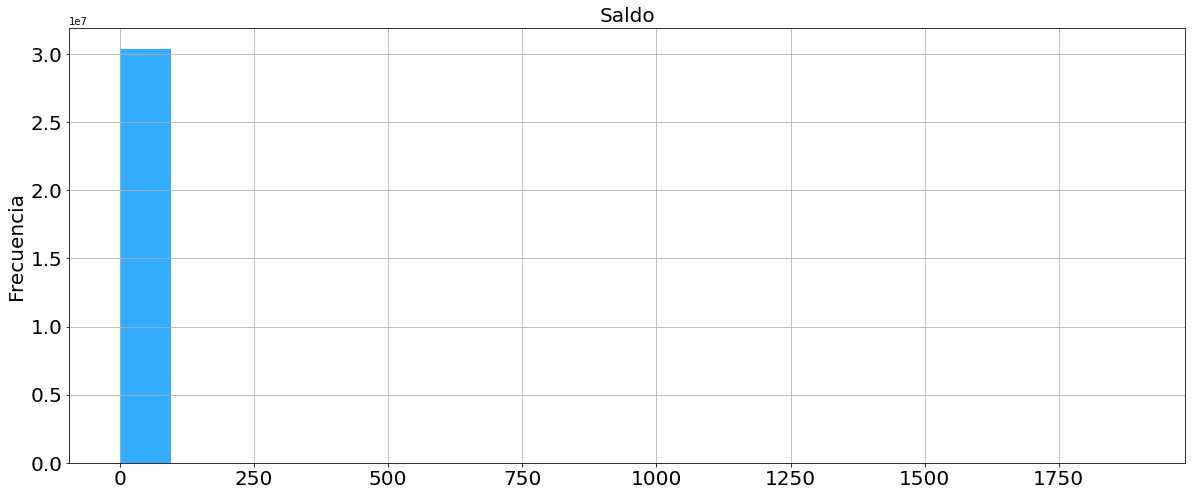

In [16]:
#Distribución de saldo
fig = plt.figure(figsize=(20,8))
plt.hist(rcc_train['saldo'],bins=20,color='#33ACFF')

plt.title('Saldo',fontsize=20)
plt.ylabel('Frecuencia',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.show()

In [17]:
rcc_train['saldo'].describe()

count    3.039163e+07
mean    -3.457069e-06
std               NaN
min     -7.287598e-02
25%     -7.232666e-02
50%     -6.396484e-02
75%     -3.308105e-02
max      1.891000e+03
Name: saldo, dtype: float64

## Transformación de la rcc_train

In [267]:
rcc_train = pd.read_csv("D:/Maestria-URP/2020-III/Aprendizaje maquina_2pm/DATA_IBK/rcc_train.csv")

In [268]:
# Reclasificamos la variable condición en días de corte por periodo 
bins = [-1, 0, 10, 20, 30, 60, 90, 180, 360, 720, float("inf")]
rcc_train["condicion"] = pd.cut(rcc_train.condicion, bins)
rcc_train["condicion"] = rcc_train["condicion"].cat.codes

In [269]:
#Tipo de crédito 
tipo_credito=pd.crosstab(rcc_train.key_value, rcc_train.tipo_credito).reset_index()
columnas2 = ['key_value',12,11,10,]
tipo_credito=tipo_credito[columnas2]

In [270]:
tipo_credito['tipo_credito_12']=tipo_credito[12]
tipo_credito['tipo_credito_11']=tipo_credito[11]
tipo_credito['tipo_credito_10']=tipo_credito[10]
tipo_credito=tipo_credito.iloc[:, [0,4,5,6]]

In [271]:
#Condición 
condicion=pd.crosstab(rcc_train.key_value, rcc_train.condicion).reset_index()
columnas2 = ['key_value',0,1]
condicion=condicion[columnas2]
condicion['condicion_0']=condicion[0]
condicion['condicion_1']=condicion[1]
condicion=condicion.iloc[:, [0,3,4]]

In [272]:
#Riesgo Directo
riesgo_directo=pd.crosstab(rcc_train.key_value, rcc_train.RIESGO_DIRECTO).reset_index()
columnas2 = ['key_value',1,-1]
riesgo_directo=riesgo_directo[columnas2]
riesgo_directo['riesgo_1']=riesgo_directo[1]
riesgo_directo['riesgo_menos_1']=riesgo_directo[-1]
riesgo_directo=riesgo_directo.iloc[:, [0,3,4]]

In [273]:
#Cod clasificador deudor
clasificacion_deudor=pd.crosstab(rcc_train.key_value, rcc_train.COD_CLASIFICACION_DEUDOR).reset_index()
columnas2 = ['key_value',0,1]
clasificacion_deudor=clasificacion_deudor[columnas2]
clasificacion_deudor['clasi_deduro_0']=clasificacion_deudor[0]
clasificacion_deudor['clasi_deudor_1']=clasificacion_deudor[1]
clasificacion_deudor=clasificacion_deudor.iloc[:, [0,3,4]]

In [274]:
#Suma de saldo, promedio, mediana totalizado, max, min
sum_saldo=rcc_train[['key_value', 'saldo']].groupby('key_value').agg('sum').reset_index()
sum_saldo['sum_saldo']=sum_saldo['saldo']
sum_saldo=sum_saldo.iloc[:, [0,2]]

In [275]:
median_saldo=rcc_train.groupby('key_value').agg({'saldo':np.median}).reset_index()
median_saldo['median_saldo']=median_saldo['saldo']
median_saldo=median_saldo.iloc[:, [0,2]]

In [276]:
max_saldo=rcc_train[['key_value', 'saldo']].groupby('key_value').agg('max').reset_index()
max_saldo['max_saldo']=max_saldo['saldo']
max_saldo=max_saldo.iloc[:, [0,2]]

In [277]:
min_saldo=rcc_train[['key_value', 'saldo']].groupby('key_value').agg('min').reset_index()
min_saldo['min_saldo']=min_saldo['saldo']
min_saldo=min_saldo.iloc[:, [0,2]]

In [278]:
result =rcc_train.groupby('condicion')['key_value'].nunique()
(result.sort_values(ascending=False) / result.sum())*100

condicion
0    65.405023
1    10.194720
2     6.918849
3     4.839181
4     3.777086
9     2.704956
5     2.047556
6     1.693950
7     1.241999
8     1.176679
Name: key_value, dtype: float64

In [279]:
#Valores NAn en la base de RCC
total_nan_values = rcc_train.isnull().sum().sum()
print (total_nan_values)

0


In [280]:
#len(rcc_train[pd.isnull(rcc_train.saldo)])
#len(rcc_train[pd.isnull(rcc_train.condicion)])
#len(rcc_train[pd.isnull(rcc_train.tipo_credito)])
#len(rcc_train[pd.isnull(rcc_train.cod_instit_financiera)])

In [281]:
##función  para pivotear las columnas de RCC y calcular tamaño, suma, promedio del saldo

In [282]:
def makeCt(df, c, aggfunc=sum):
    try:
        ct = pd.crosstab(df.key_value, df[c].fillna("N/A"), values=df.saldo, aggfunc=aggfunc)
    except:
        ct = pd.crosstab(df.key_value, df[c], values=df.saldo, aggfunc=aggfunc)
    ct.columns = [f"{c}_{aggfunc.__name__}_{v}" for v in ct.columns]
    return ct

In [283]:
train = []
aggfuncs = [len, sum , np.mean, np.median]
for c in rcc_train.drop(["codmes", "key_value", "saldo"], axis=1):
    print("haciendo", c)
    train.extend([makeCt(rcc_train, c, aggfunc) for aggfunc in aggfuncs])

haciendo condicion
haciendo tipo_credito
haciendo cod_instit_financiera
haciendo PRODUCTO
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR


In [284]:
train = pd.concat(train, axis=1).reset_index()

In [285]:
#rcc_mean=pd.crosstab(rcc_train.key_value, rcc_train.condicion.fillna("N/A"), values=rcc_train.saldo, aggfunc="mean").reset_index()
#rcc_mean=rcc_mean.iloc[:,[0,1,2,3]]
#rcc_mean.head(5)

#rcc_len=pd.crosstab(rcc_train.key_value, rcc_train.condicion.fillna("N/A"), values=rcc_train.saldo, aggfunc="sum").reset_index()
#rcc_len=rcc_len.iloc[:,[0,1,2,3]]
#rcc_len.head(5)

In [286]:
#print(train.columns.tolist())

In [287]:
## seleccionamos a las columnas con una mayor de casos por cada cliente
columnas = ['key_value','condicion_len_0', 'condicion_len_1', 'condicion_len_2', 'condicion_len_3', 'condicion_len_4',
            'condicion_sum_0', 'condicion_sum_1', 'condicion_sum_2', 'condicion_sum_3', 'condicion_sum_4',
            'condicion_mean_0', 'condicion_mean_1', 'condicion_mean_2', 'condicion_mean_3', 'condicion_mean_4',
            'condicion_median_0', 'condicion_median_1', 'condicion_median_2', 'condicion_median_3', 'condicion_median_4',
           'tipo_credito_len_10', 'tipo_credito_len_11', 'tipo_credito_len_12',
            'tipo_credito_sum_10', 'tipo_credito_sum_11', 'tipo_credito_sum_12',
            'tipo_credito_mean_10', 'tipo_credito_mean_11', 'tipo_credito_mean_12',
            'tipo_credito_median_10', 'tipo_credito_median_11', 'tipo_credito_median_12',
           'cod_instit_financiera_sum_28','cod_instit_financiera_sum_10','cod_instit_financiera_sum_34','cod_instit_financiera_sum_1','cod_instit_financiera_sum_37',
           'cod_instit_financiera_len_28','cod_instit_financiera_len_10','cod_instit_financiera_len_34','cod_instit_financiera_len_1','cod_instit_financiera_len_37',
            'cod_instit_financiera_mean_28','cod_instit_financiera_mean_10','cod_instit_financiera_mean_34','cod_instit_financiera_mean_1','cod_instit_financiera_mean_37',
            'cod_instit_financiera_median_28','cod_instit_financiera_median_10','cod_instit_financiera_median_34','cod_instit_financiera_median_1','cod_instit_financiera_median_37',
           'PRODUCTO_len_1', 'PRODUCTO_len_0', 'PRODUCTO_len_255', 'PRODUCTO_len_2', 'PRODUCTO_len_3', 'PRODUCTO_len_4', 'PRODUCTO_len_6', 'PRODUCTO_len_7', 'PRODUCTO_len_8','PRODUCTO_len_5',
            'PRODUCTO_sum_1', 'PRODUCTO_sum_0', 'PRODUCTO_sum_255', 'PRODUCTO_sum_2', 'PRODUCTO_sum_3', 'PRODUCTO_sum_4', 'PRODUCTO_sum_6', 'PRODUCTO_sum_7', 'PRODUCTO_sum_8','PRODUCTO_sum_5',
            'PRODUCTO_mean_1', 'PRODUCTO_mean_0', 'PRODUCTO_mean_255', 'PRODUCTO_mean_2', 'PRODUCTO_mean_3', 'PRODUCTO_mean_4', 'PRODUCTO_mean_6', 'PRODUCTO_mean_7', 'PRODUCTO_mean_8','PRODUCTO_mean_5',
             'PRODUCTO_median_1', 'PRODUCTO_median_0', 'PRODUCTO_median_255', 'PRODUCTO_median_2', 'PRODUCTO_median_3', 'PRODUCTO_median_4', 'PRODUCTO_median_6', 'PRODUCTO_median_7', 'PRODUCTO_median_8','PRODUCTO_median_5',
           'RIESGO_DIRECTO_len_1', 'RIESGO_DIRECTO_len_-1',
            'RIESGO_DIRECTO_sum_1','RIESGO_DIRECTO_sum_-1',
            'RIESGO_DIRECTO_mean_1','RIESGO_DIRECTO_mean_-1',
            'RIESGO_DIRECTO_median_1','RIESGO_DIRECTO_median_-1',
            'COD_CLASIFICACION_DEUDOR_sum_0', 'COD_CLASIFICACION_DEUDOR_sum_1',
            'COD_CLASIFICACION_DEUDOR_len_0', 'COD_CLASIFICACION_DEUDOR_len_1',
            'COD_CLASIFICACION_DEUDOR_mean_0', 'COD_CLASIFICACION_DEUDOR_mean_1',
           'COD_CLASIFICACION_DEUDOR_median_0', 'COD_CLASIFICACION_DEUDOR_median_1']

## Base final RCC

In [288]:
train=train[columnas]

In [289]:
#train.head(10)

In [290]:
### Ahora gregarmos información de tipo de crédito en PIVOT 
### No agregamos pivot de cod_institucion por tener demasiada cardinalidad
### Suma de saldo, promedio, mediana totalizado, max, min, 
### Riesgo directo, en pivot 
### Código de clasificación deudor 0, 1

In [291]:
y_train = pd.read_csv("D:/Maestria-URP/2020-III/Aprendizaje maquina_2pm/DATA_IBK/y_train.csv")

In [292]:
#Realizamos un leftJoin para unir las bases
from functools import reduce
data_frames = [train, tipo_credito, condicion,riesgo_directo,clasificacion_deudor,sum_saldo,max_saldo,min_saldo,median_saldo,y_train]
bd_train = reduce(lambda  left,right: pd.merge(left,right,on=['key_value'],
                                            how='outer'), data_frames)

In [293]:
bd_train

,key_value,condicion_len_0,condicion_len_1,condicion_len_2,condicion_len_3,condicion_len_4,condicion_sum_0,condicion_sum_1,condicion_sum_2,condicion_sum_3,...,condicion_1,riesgo_1,riesgo_menos_1,clasi_deduro_0,clasi_deudor_1,sum_saldo,max_saldo,min_saldo,median_saldo,target
0,0,53.0,NaN,NaN,NaN,NaN,-2.051825,NaN,NaN,NaN,...,0,14,39,53,0,-2.051825,0.072673,-0.072859,-0.043309,0
1,1,8.0,NaN,NaN,NaN,NaN,-0.540241,NaN,NaN,NaN,...,0,4,4,8,0,-0.540241,-0.061628,-0.072881,-0.068027,0
2,2,6.0,NaN,NaN,NaN,NaN,-0.363093,NaN,NaN,NaN,...,0,2,4,6,0,-0.363093,-0.004746,-0.072881,-0.072780,0
3,3,7.0,NaN,NaN,NaN,NaN,0.193806,NaN,NaN,NaN,...,0,2,5,7,0,0.193806,0.114270,-0.072791,0.016686,0
4,4,51.0,4.0,NaN,1.0,1.0,-3.185017,-0.236501,NaN,-0.057877,...,4,17,39,47,3,-3.619558,-0.042234,-0.072780,-0.064690,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358482,358482,3.0,NaN,NaN,NaN,NaN,-0.195957,NaN,NaN,NaN,...,0,1,2,3,0,-0.195957,-0.050498,-0.072814,-0.072646,0
358483,358483,3.0,NaN,NaN,NaN,NaN,-0.207356,NaN,NaN,NaN,...,0,1,2,3,0,-0.207356,-0.061673,-0.072881,-0.072803,0
358484,358484,4.0,NaN,NaN,NaN,NaN,-0.259724,NaN,NaN,NaN,...,0,1,3,4,0,-0.259724,-0.059344,-0.072702,-0.063839,0
358485,358485,1.0,NaN,NaN,NaN,NaN,-0.058336,NaN,NaN,NaN,...,0,1,0,1,0,-0.058336,-0.058336,-0.058336,-0.058336,0


In [294]:
#liberamos memoria de todas las bases
import gc

del train, tipo_credito, condicion,riesgo_directo,clasificacion_deudor,sum_saldo,max_saldo,min_saldo,median_saldo,y_train
gc.collect()

262

In [295]:
#liberamos memoria de base train
import gc

del rcc_train
gc.collect()

20

In [296]:
bd_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358487 entries, 0 to 358486
Columns: 123 entries, key_value to target
dtypes: float64(112), int64(11)
memory usage: 339.1 MB


In [297]:
# ahora analizamos la cantidad de valores NaN, que se han generado por pivotear la base rcc_train
#sb.heatmap(bd_train.isnull())

In [298]:
#missing
bd_train.isnull().sum() / len(bd_train)

key_value          0.000000
condicion_len_0    0.000064
condicion_len_1    0.844139
condicion_len_2    0.894222
condicion_len_3    0.926017
                     ...   
sum_saldo          0.000000
max_saldo          0.000000
min_saldo          0.000000
median_saldo       0.000000
target             0.000000
Length: 123, dtype: float64

In [299]:
# Como vemos se han generados varios vacios por que hay clientes que no tienen saldo en esa condición.
# Por lo cual vamos asignarle un saldo de cero a clientes sin condición.
#bd_train=bd_train.fillna(0)

In [300]:
#bd_train.dtypes

D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and m

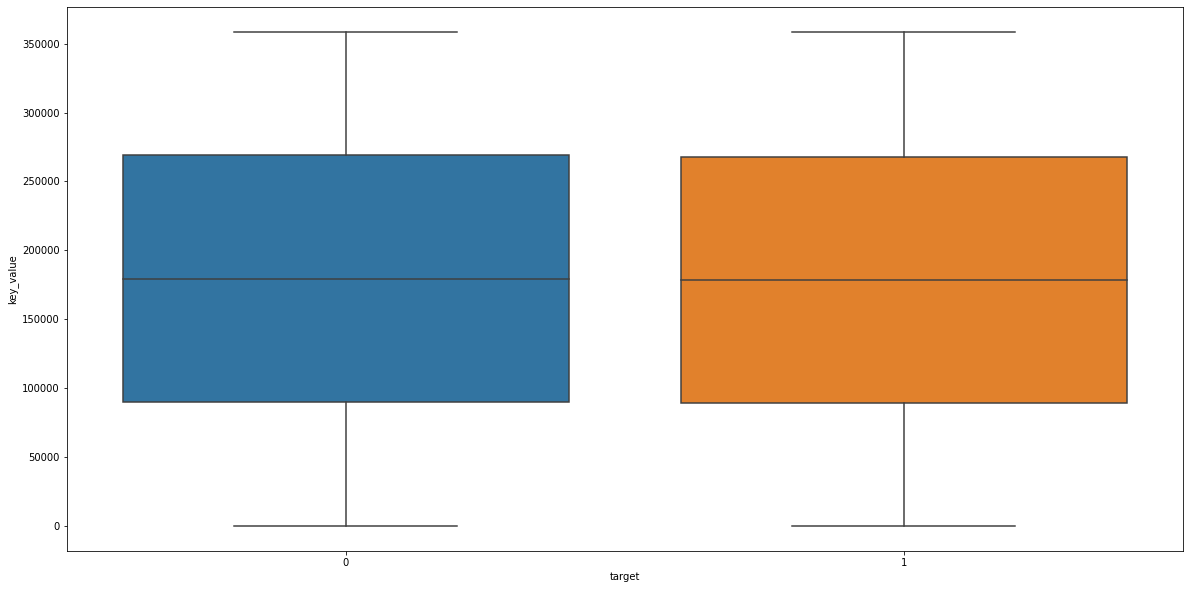

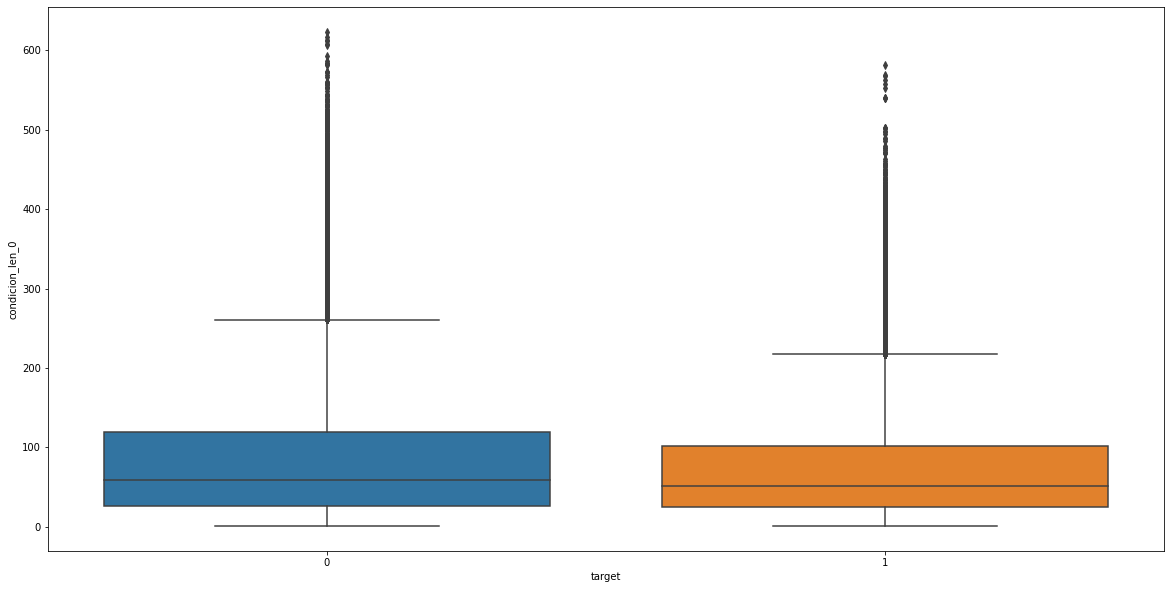

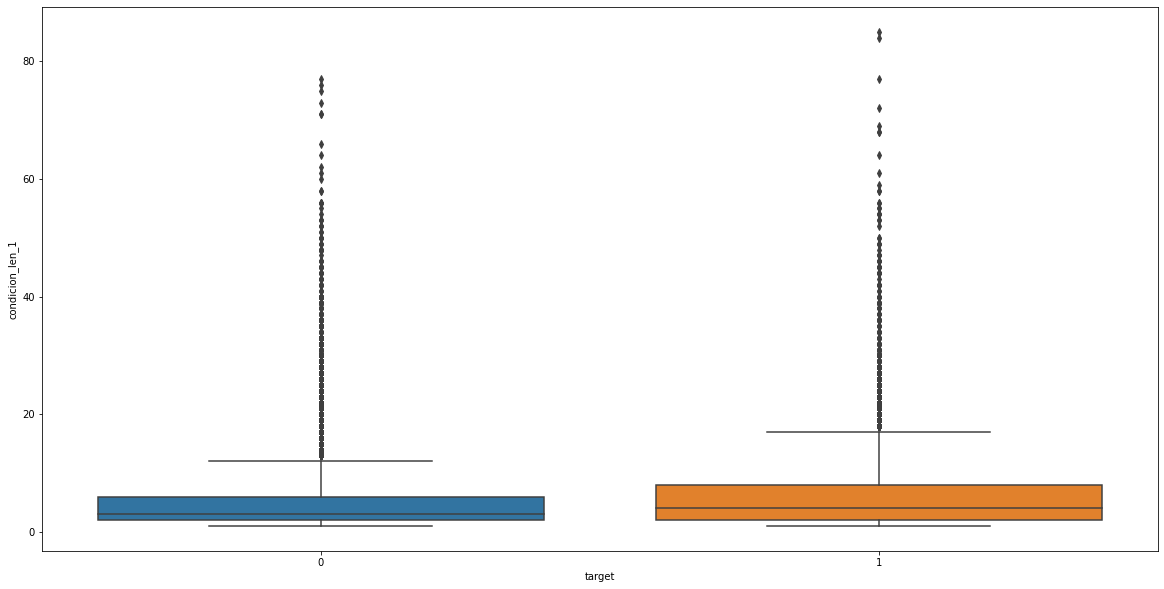

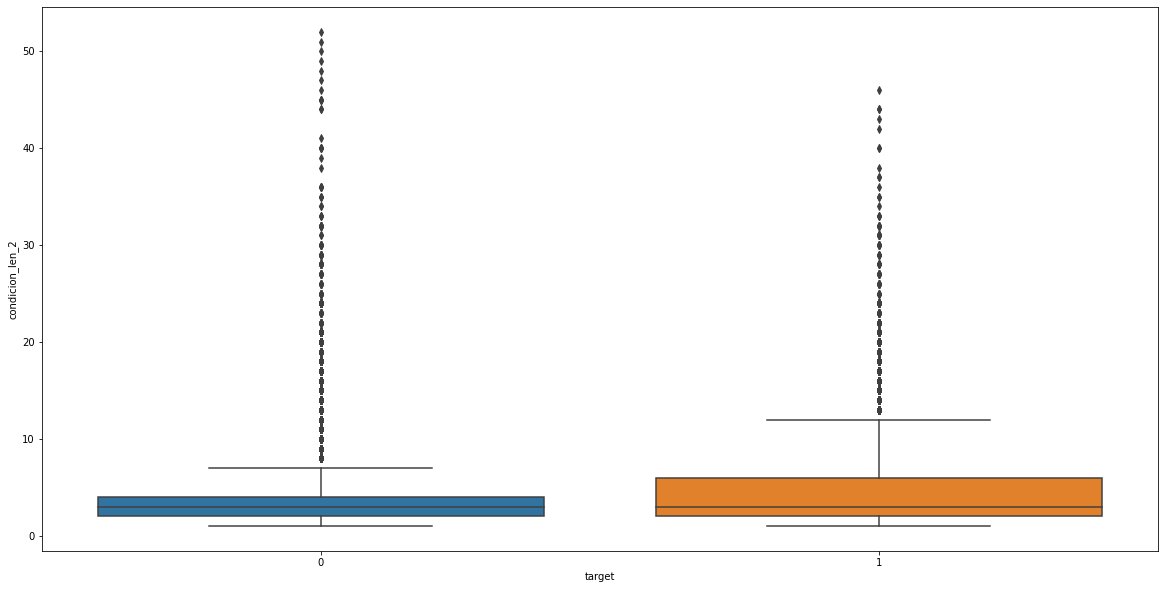

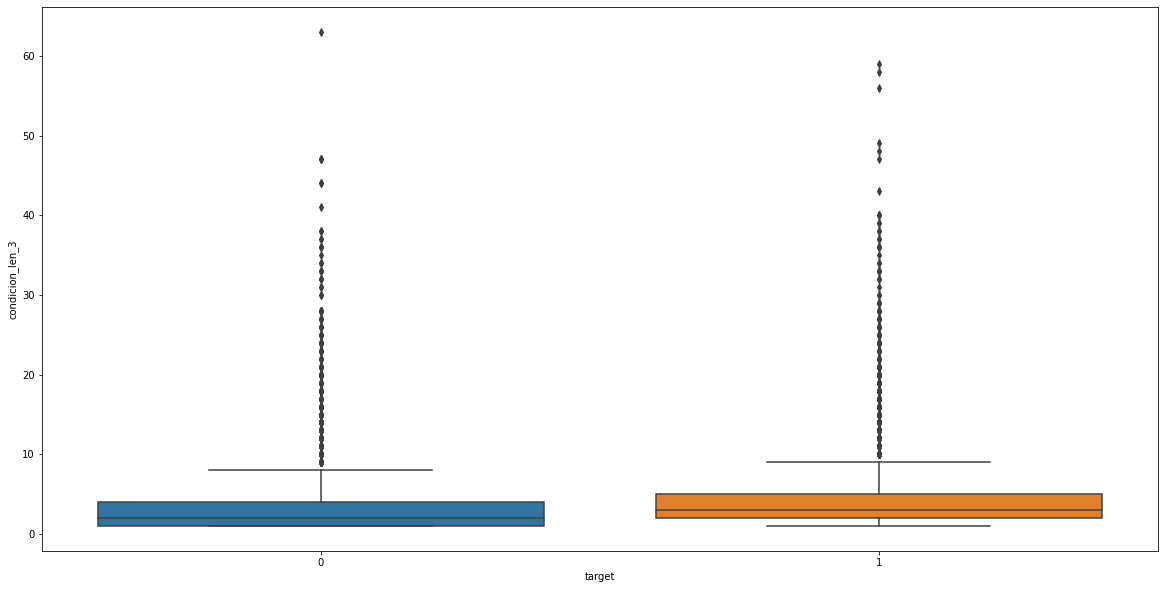

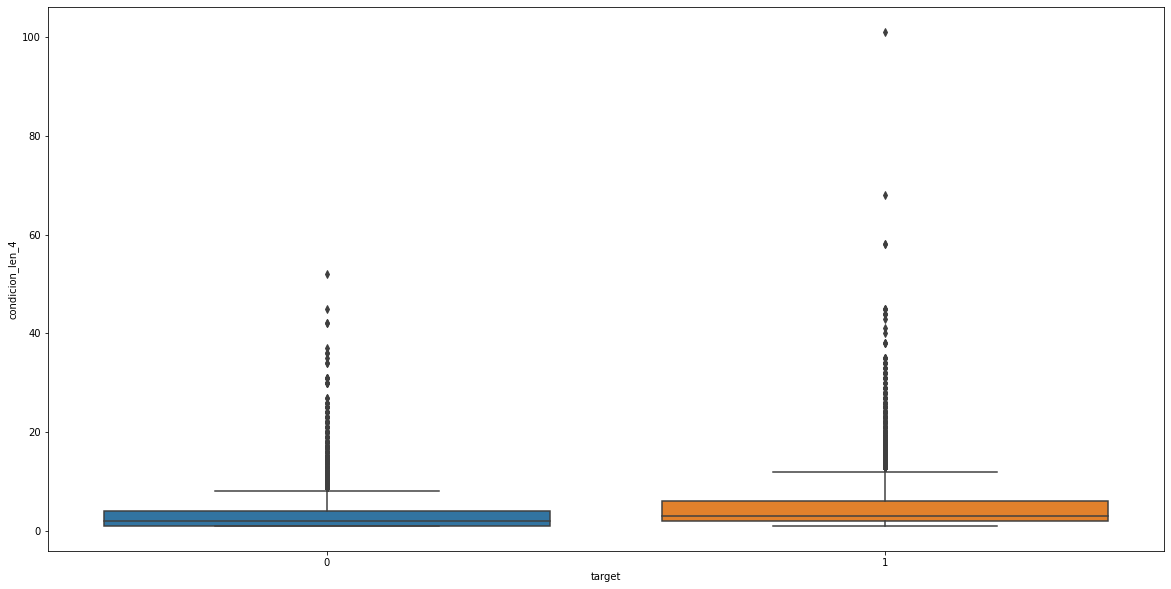

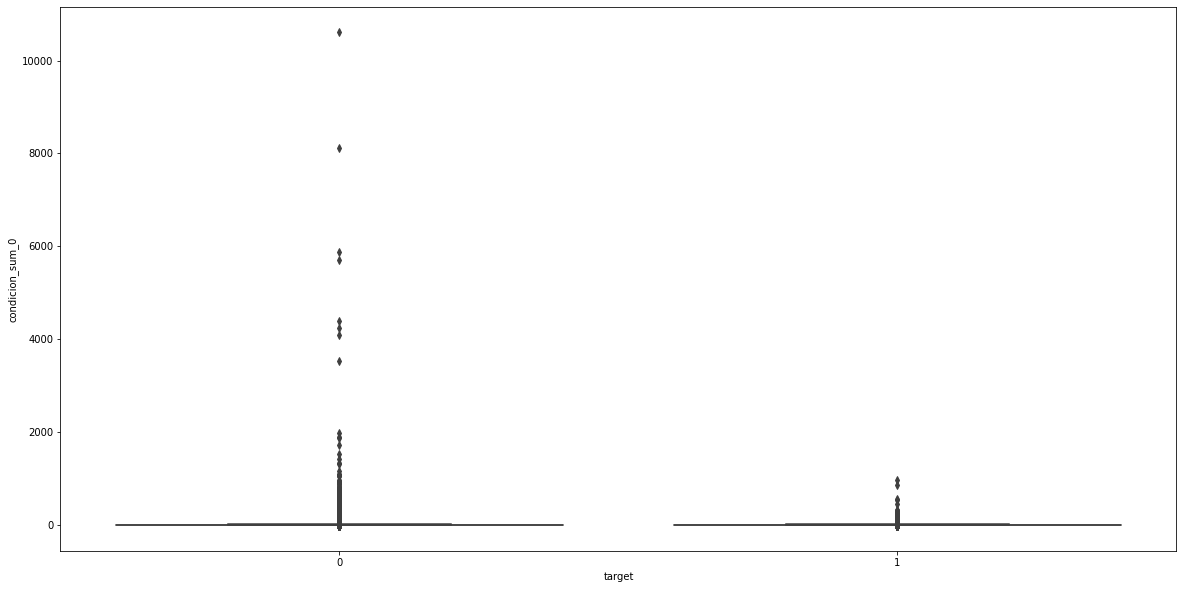

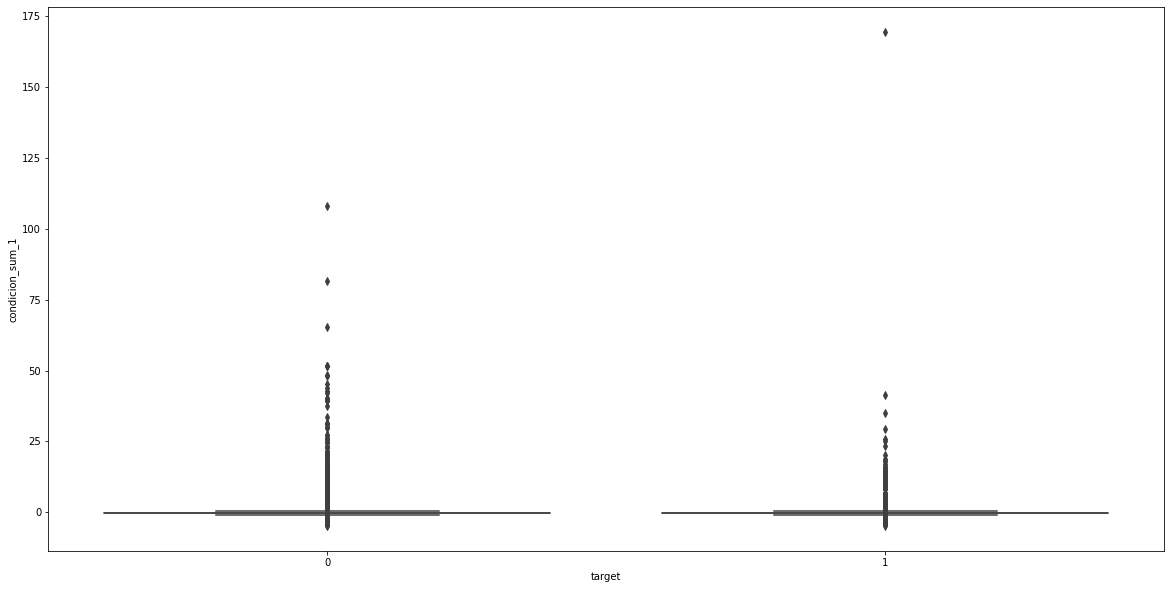

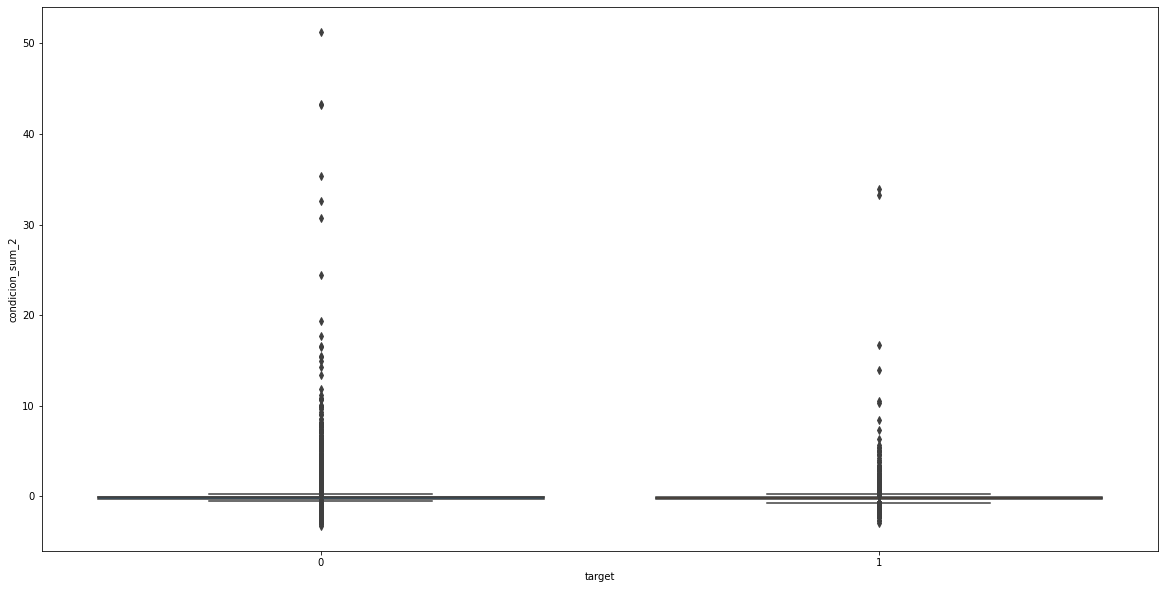

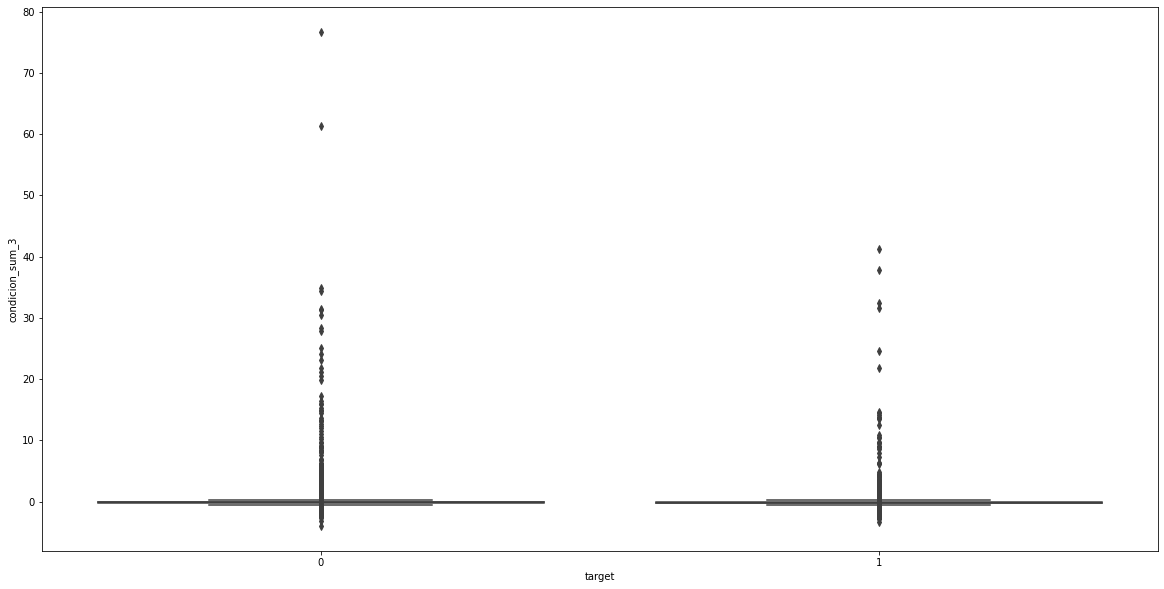

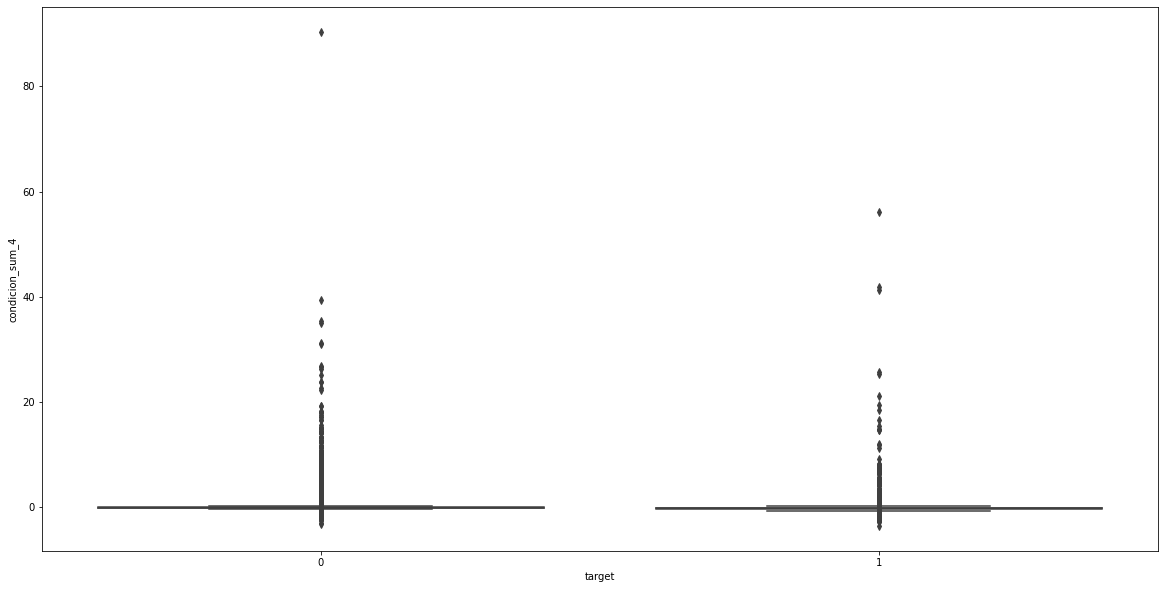

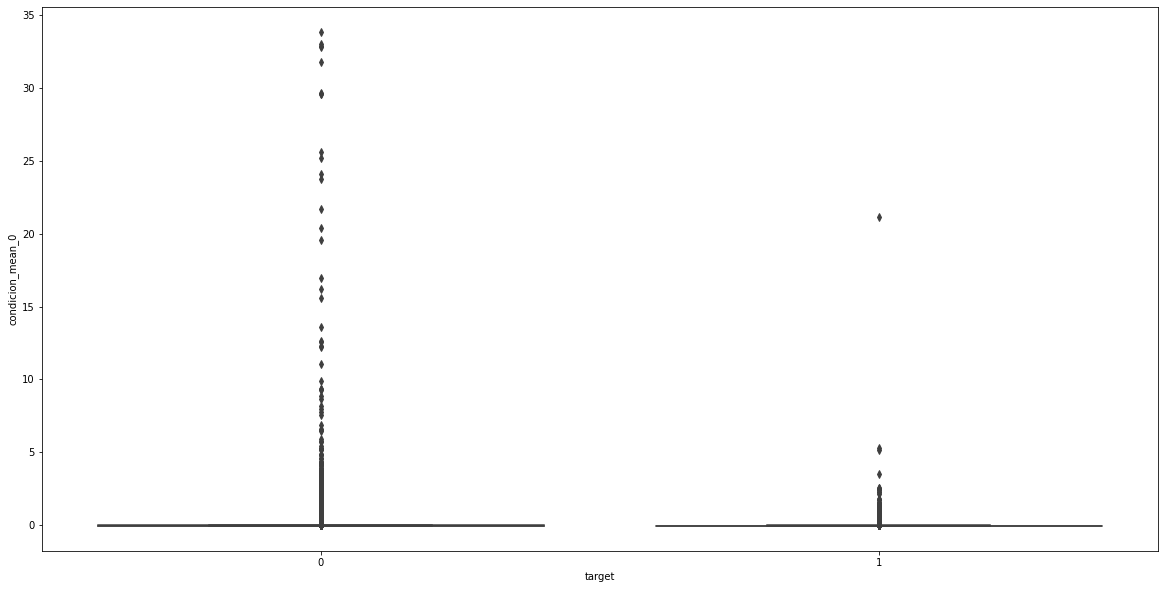

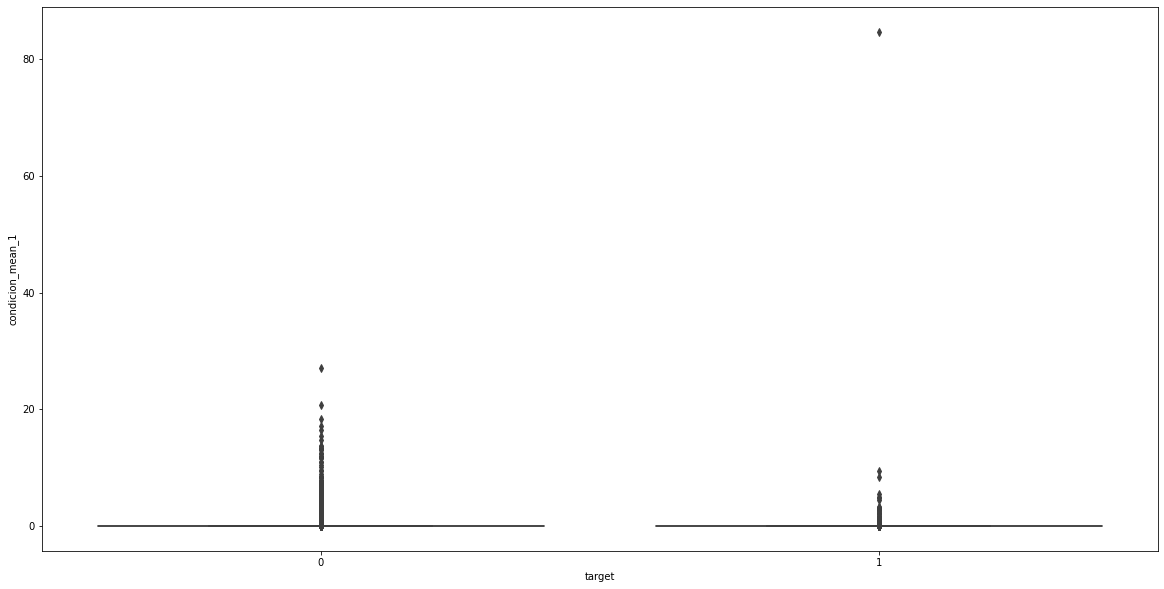

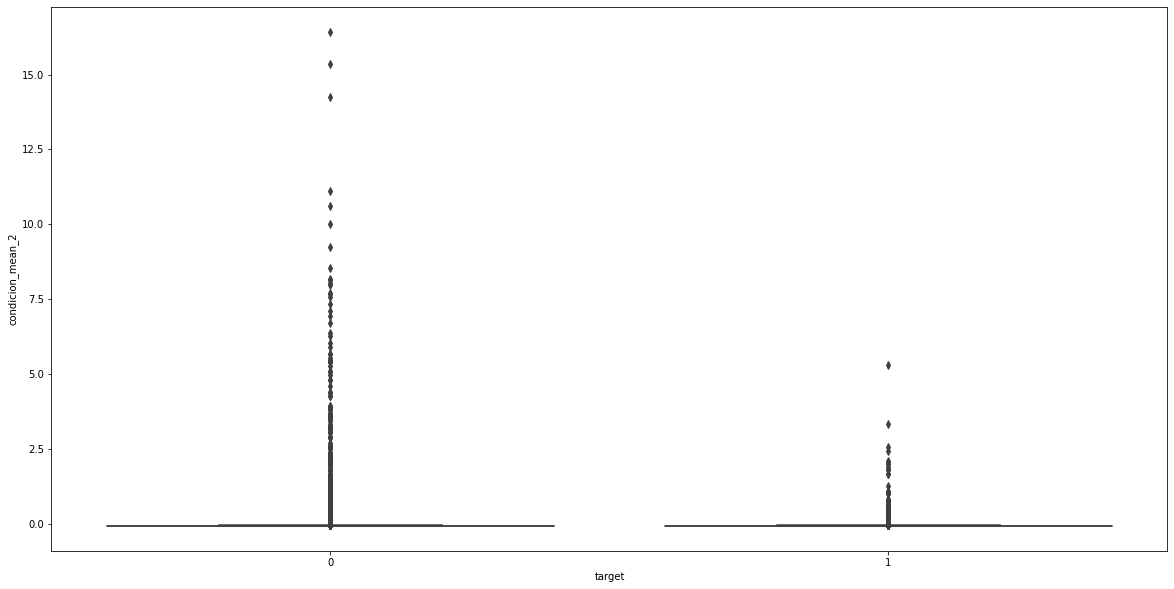

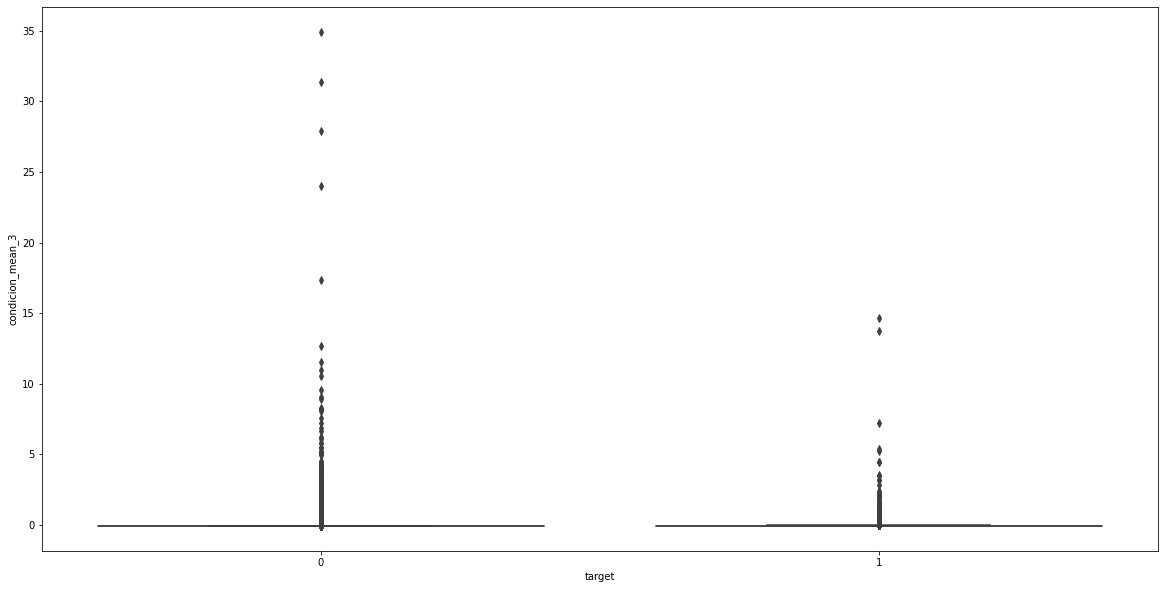

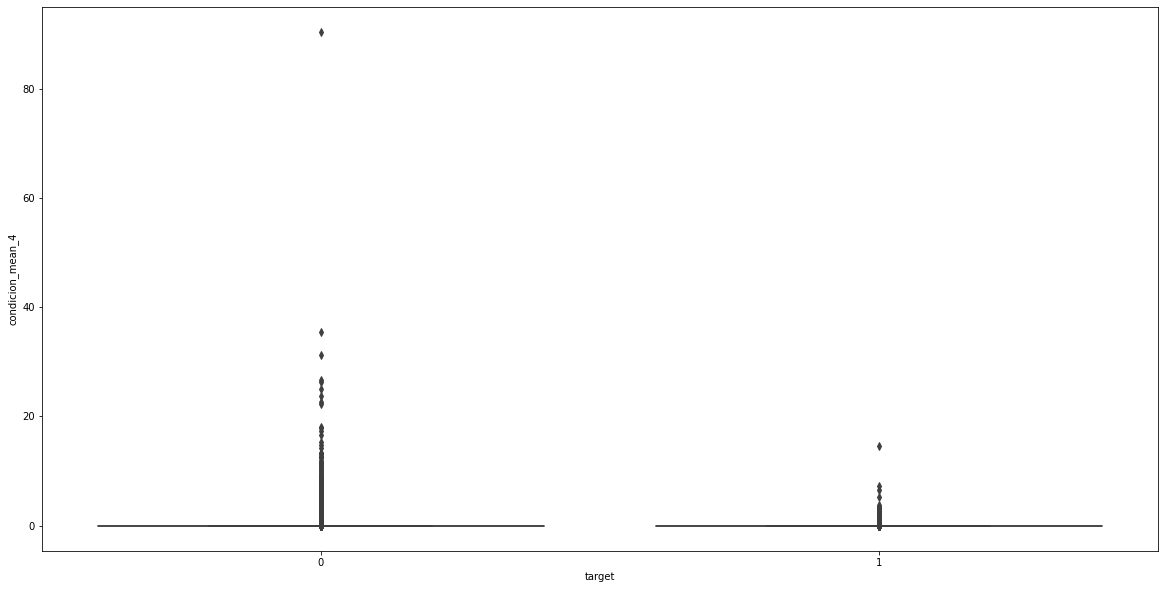

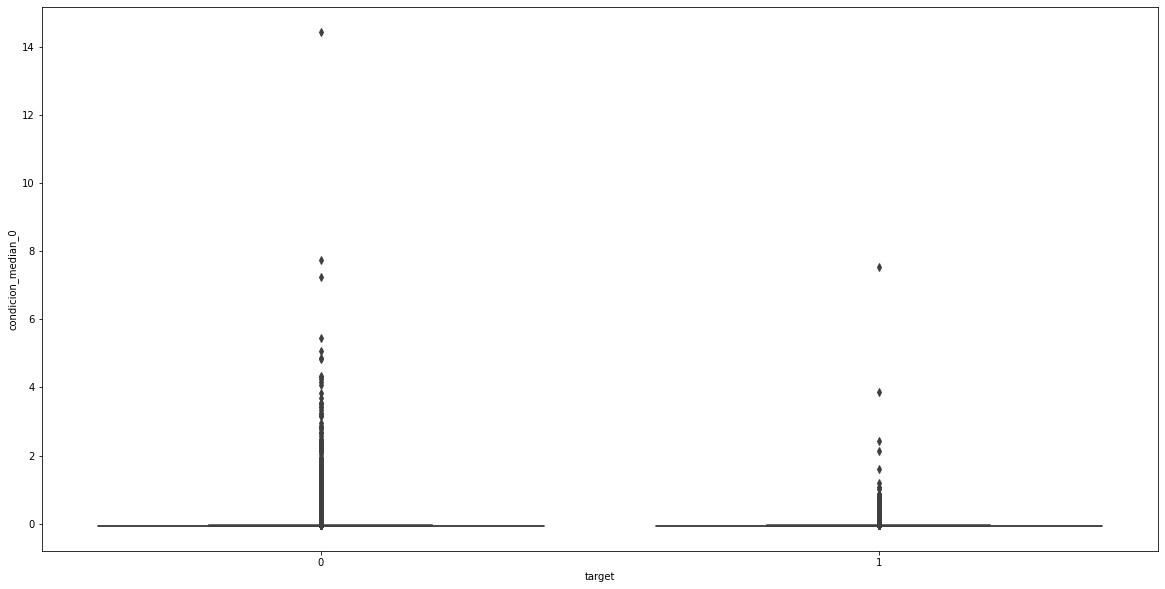

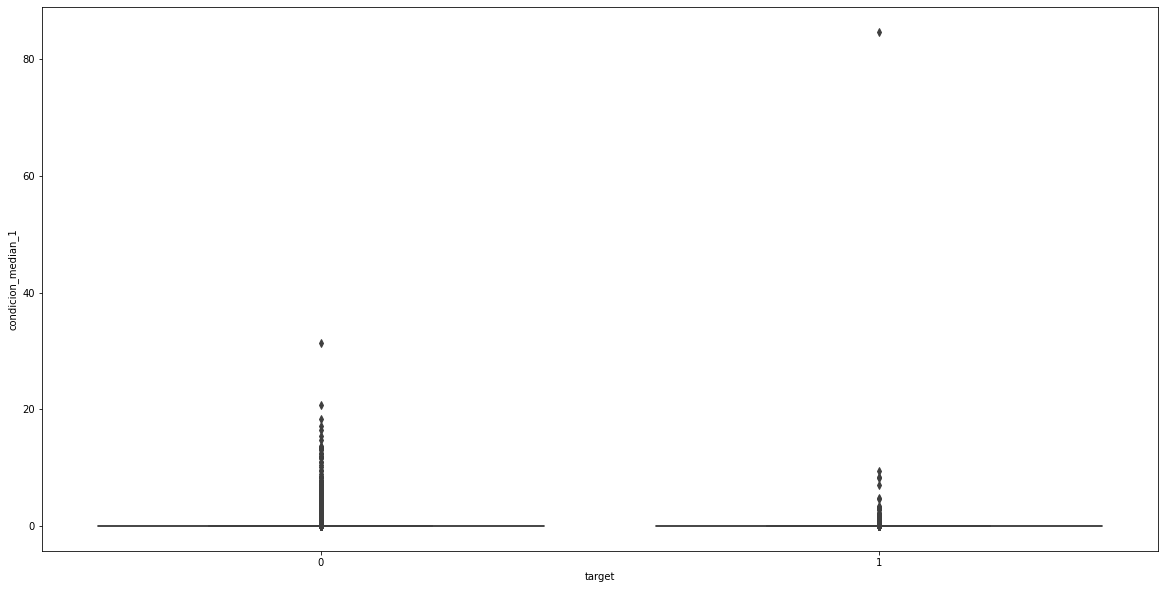

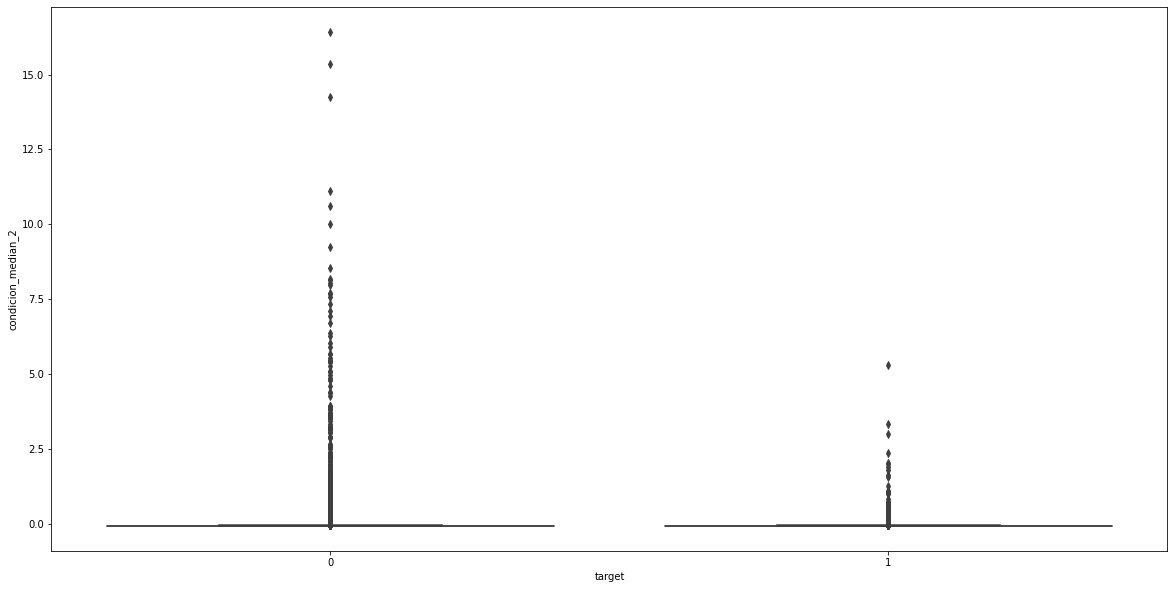

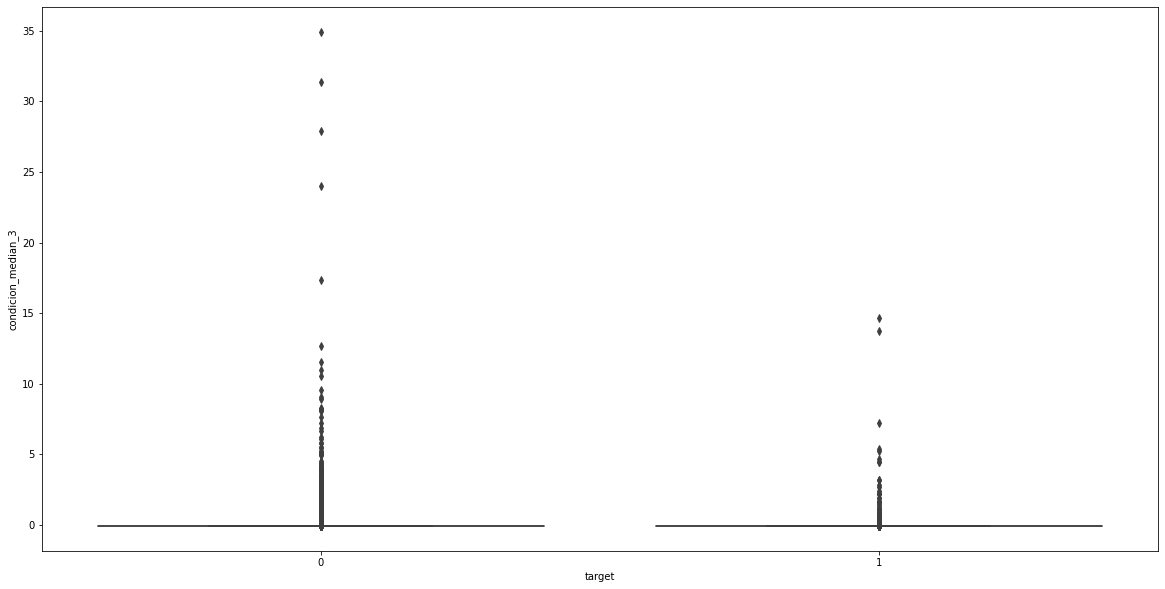

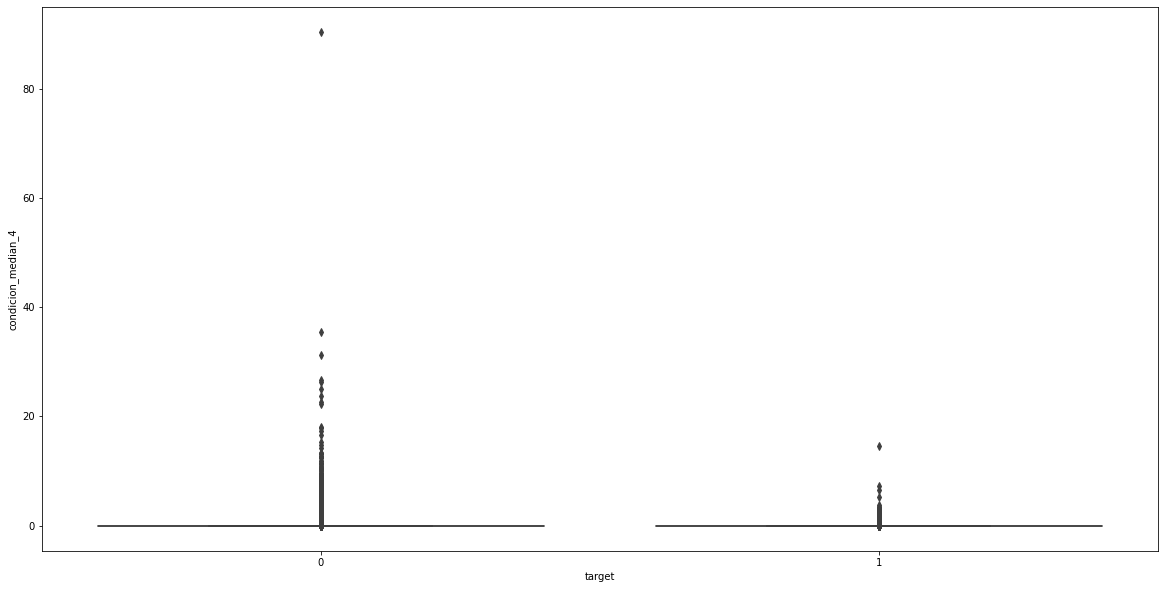

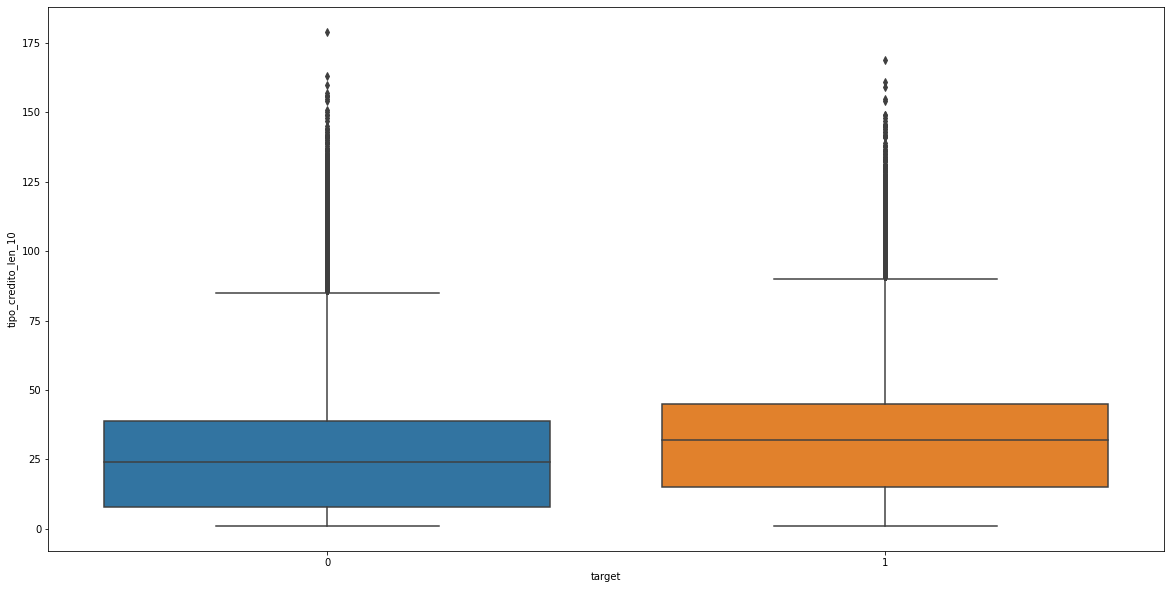

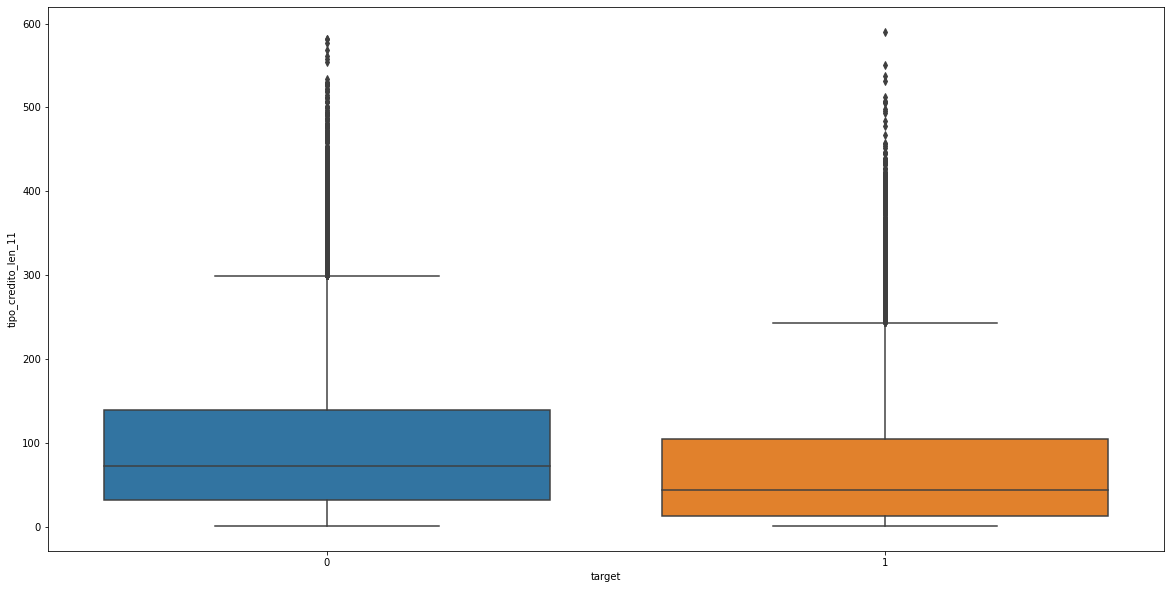

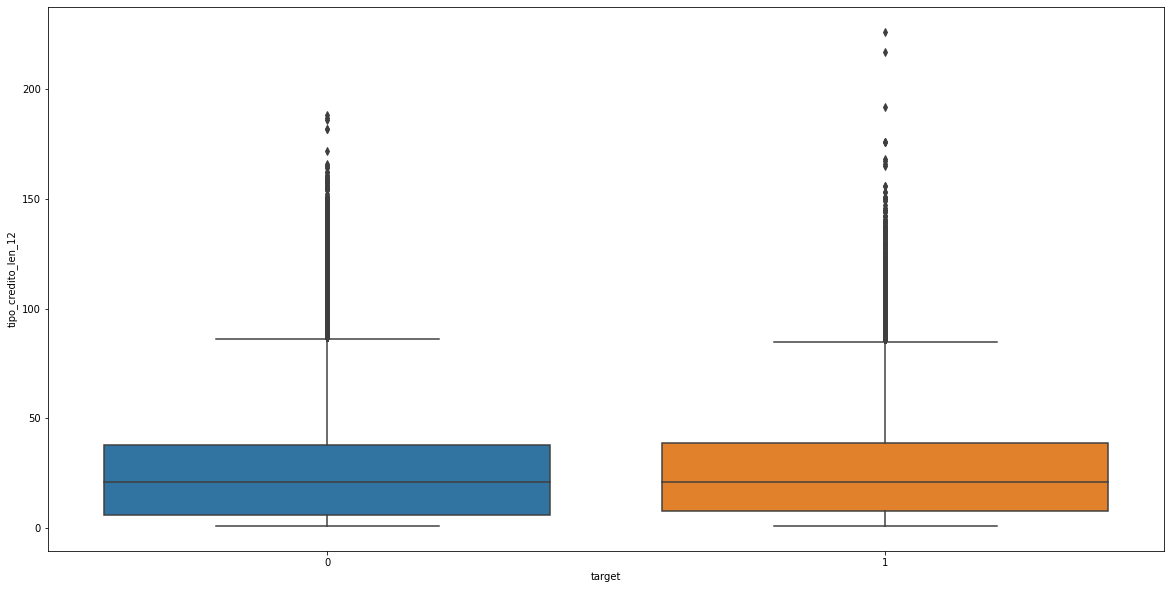

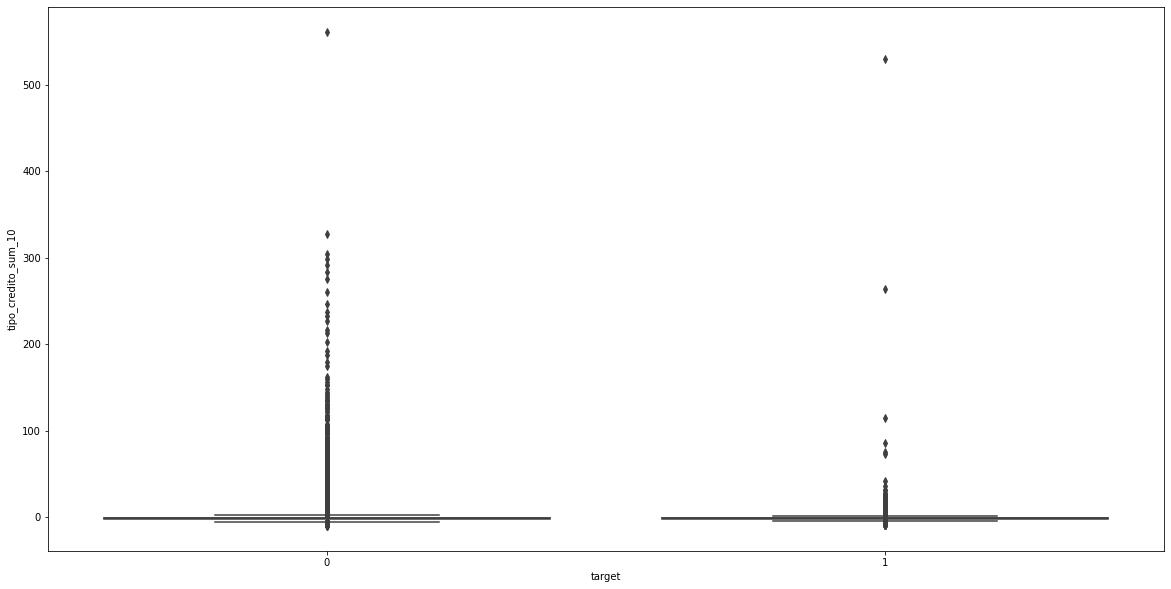

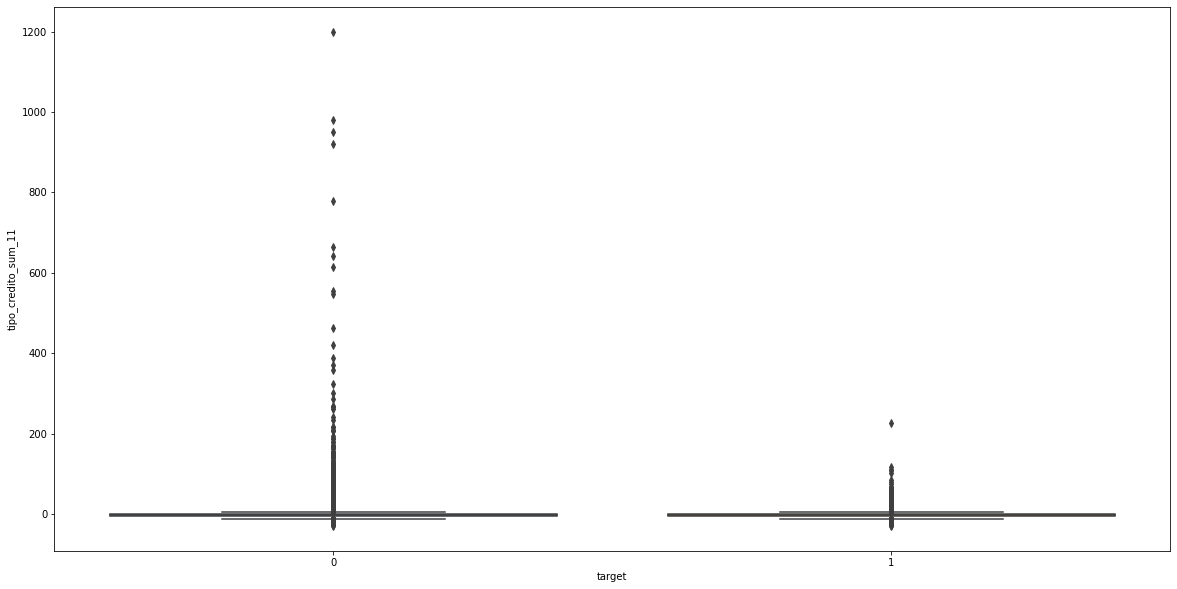

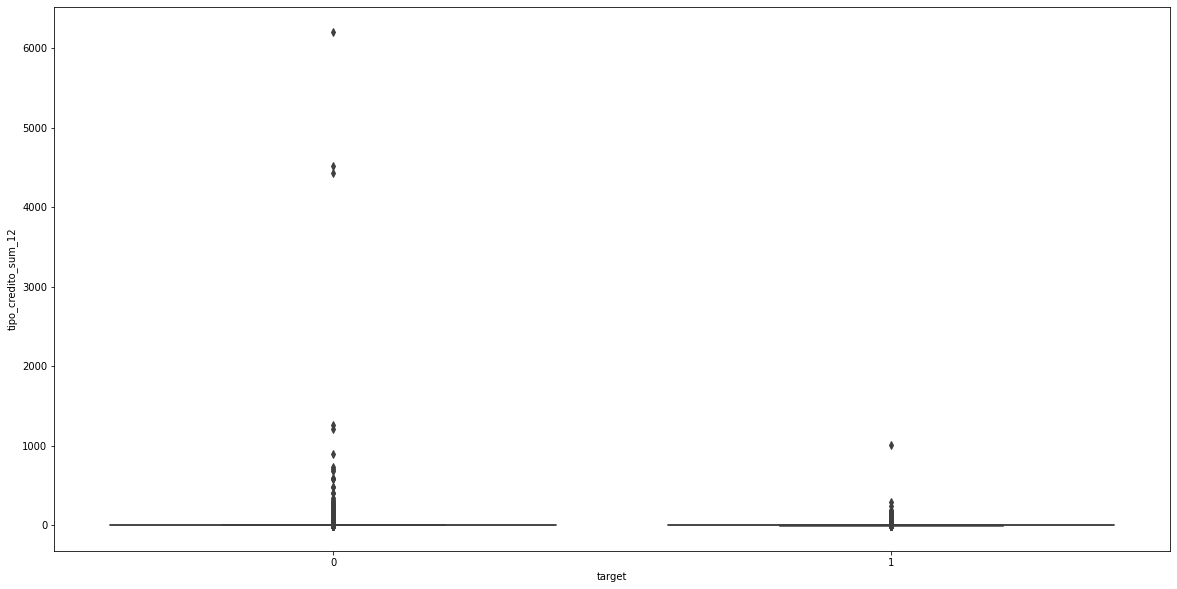

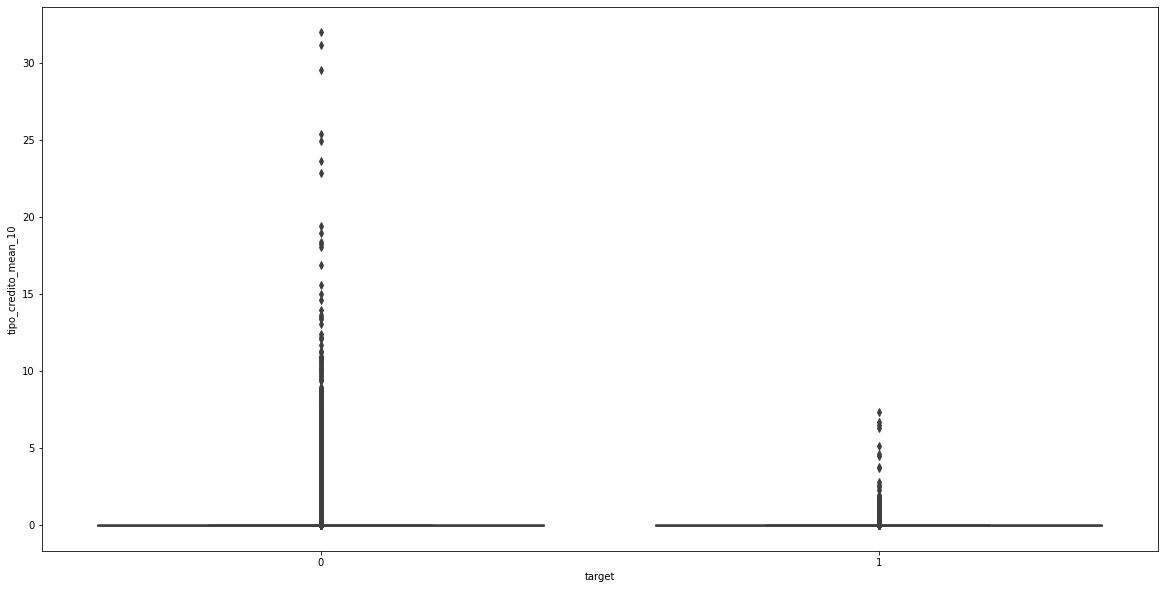

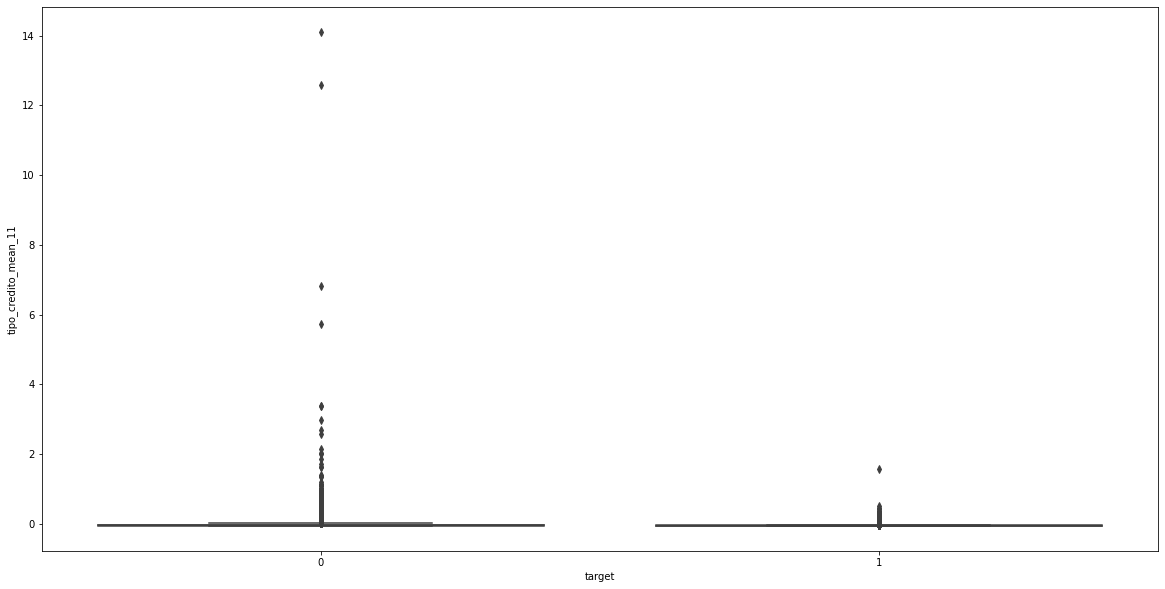

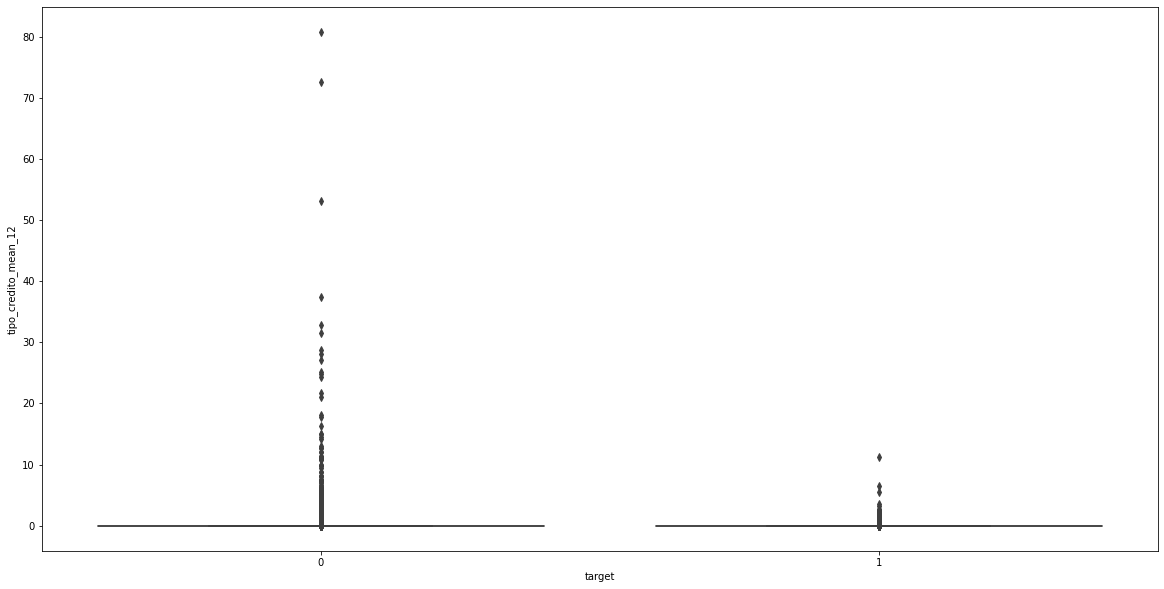

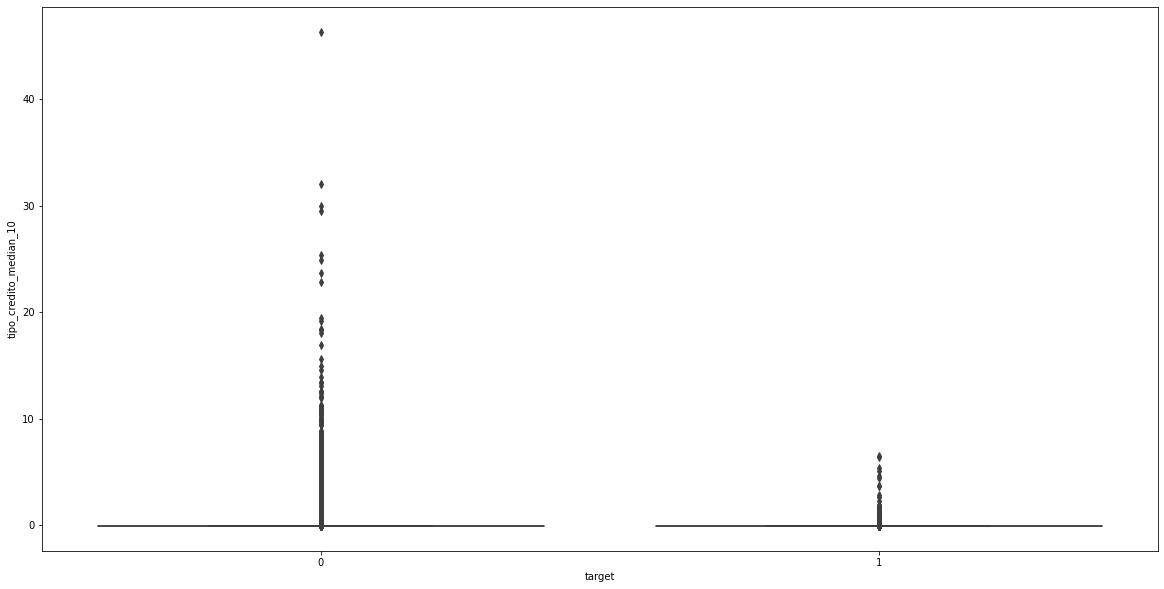

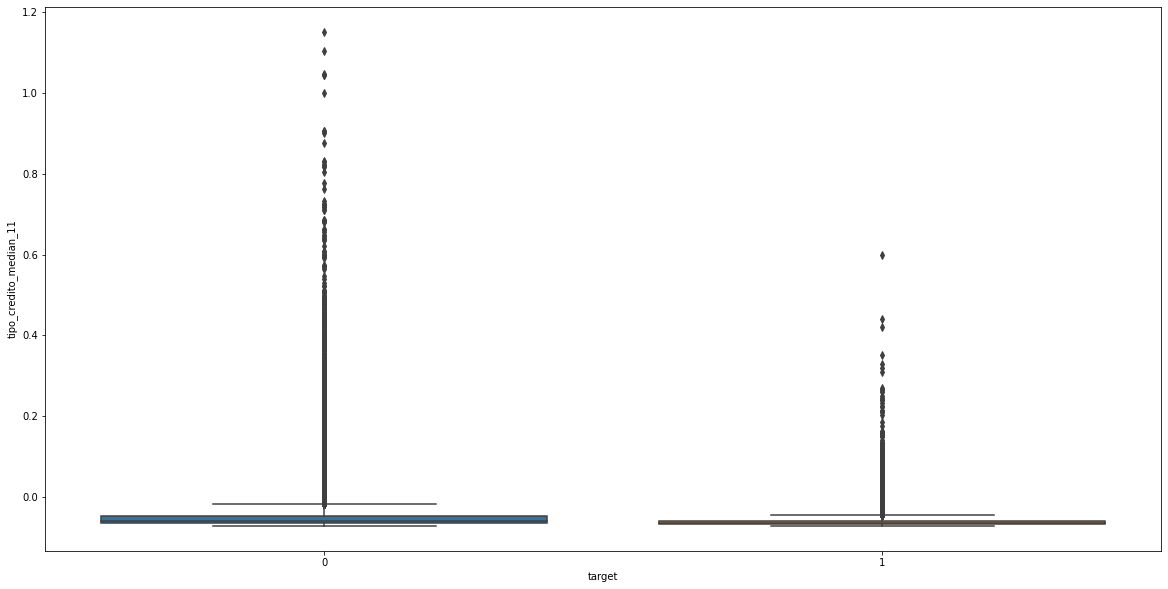

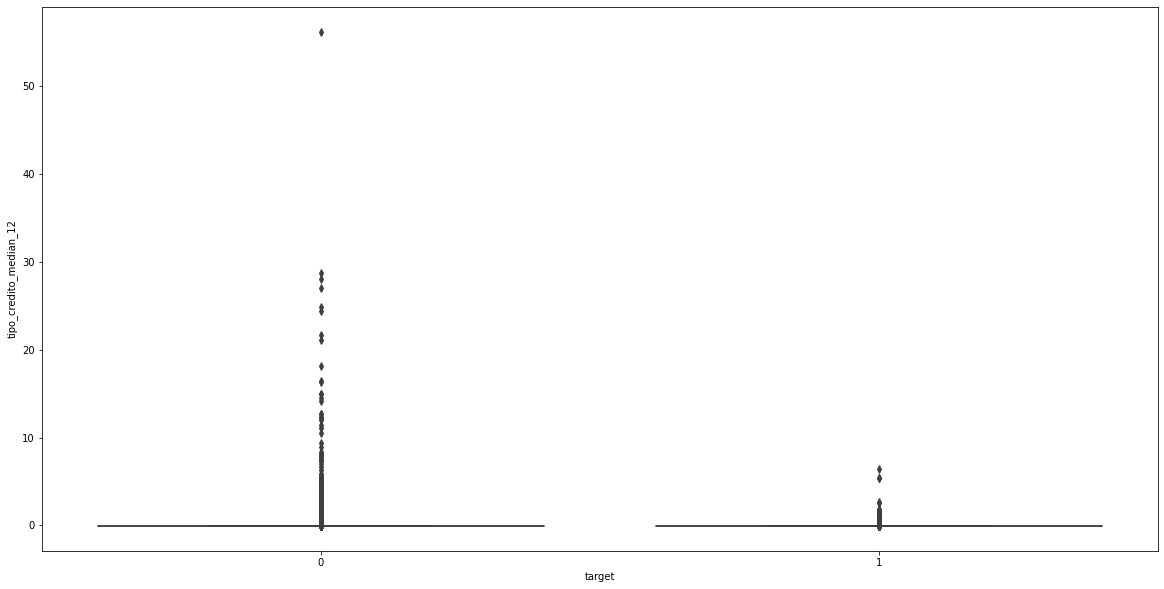

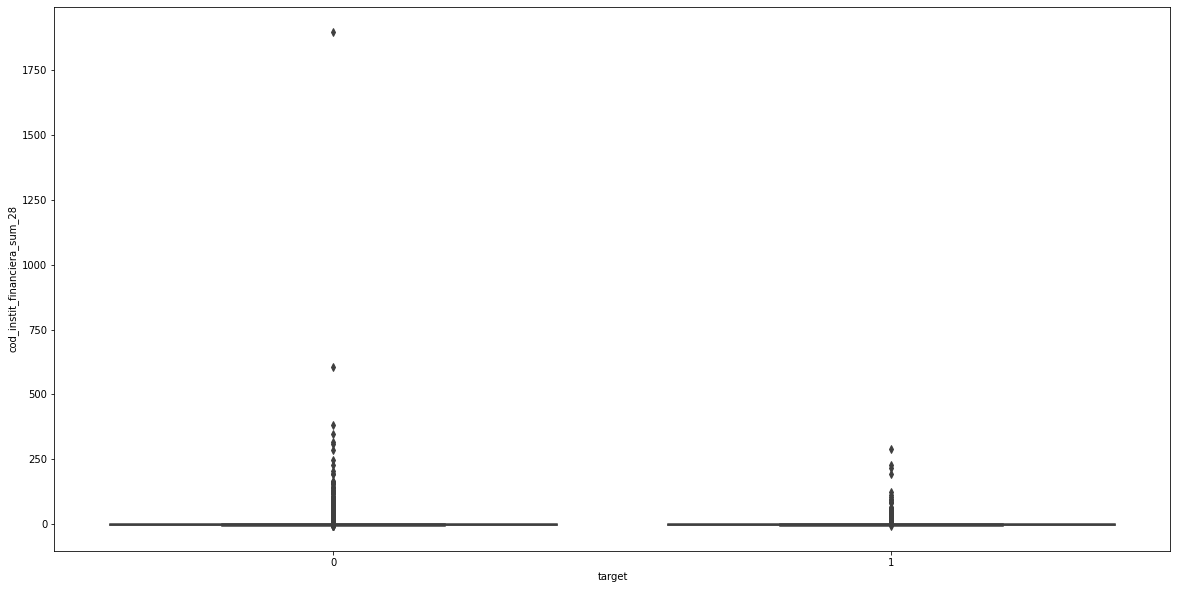

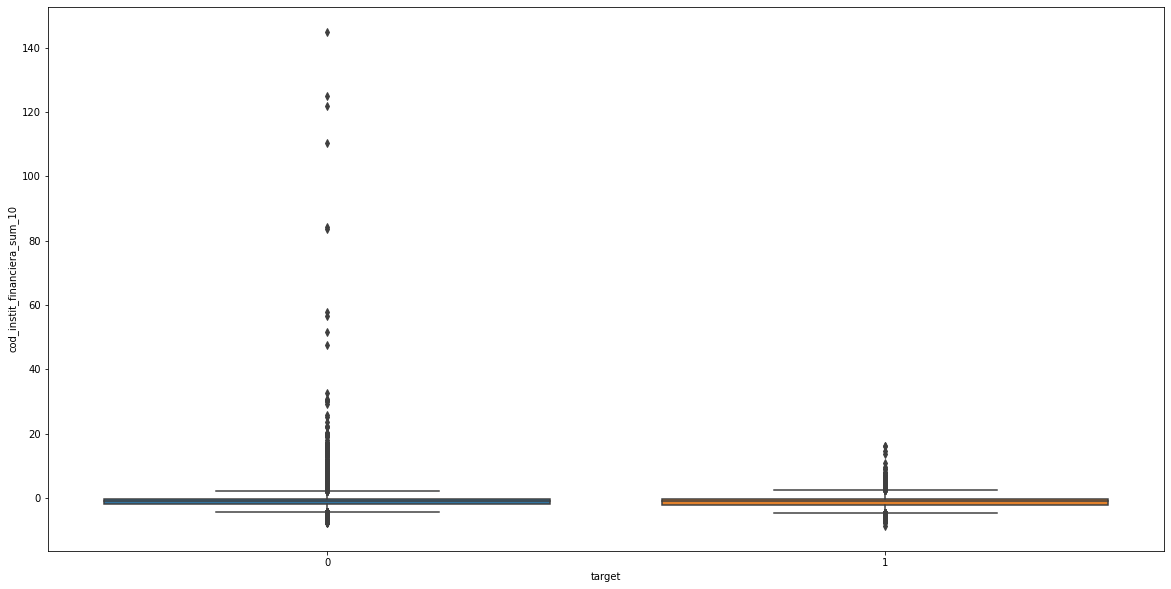

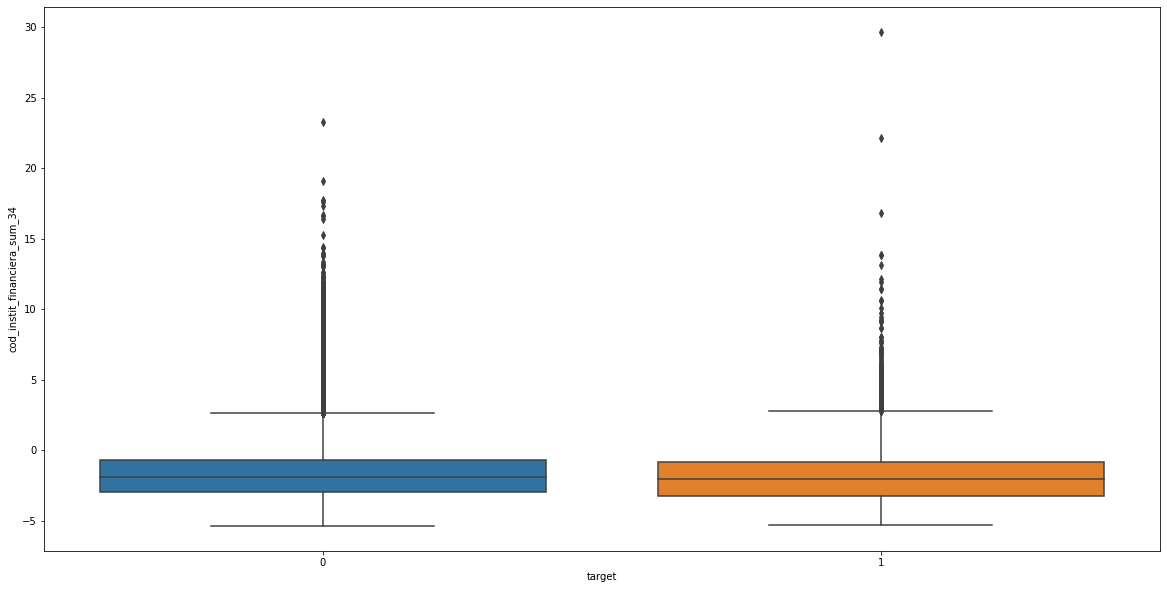

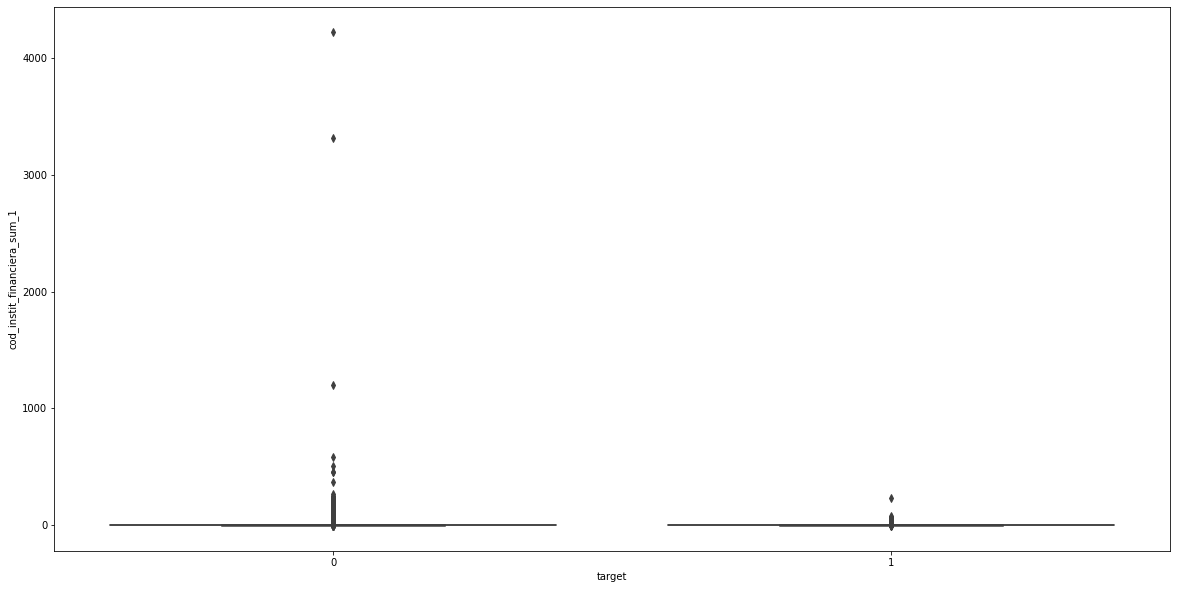

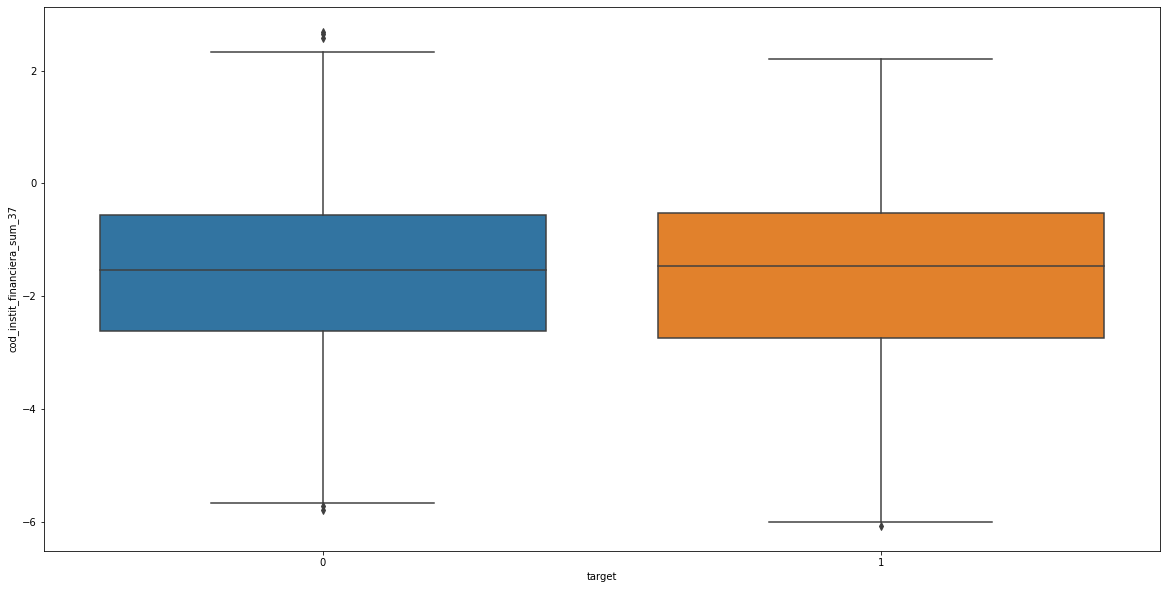

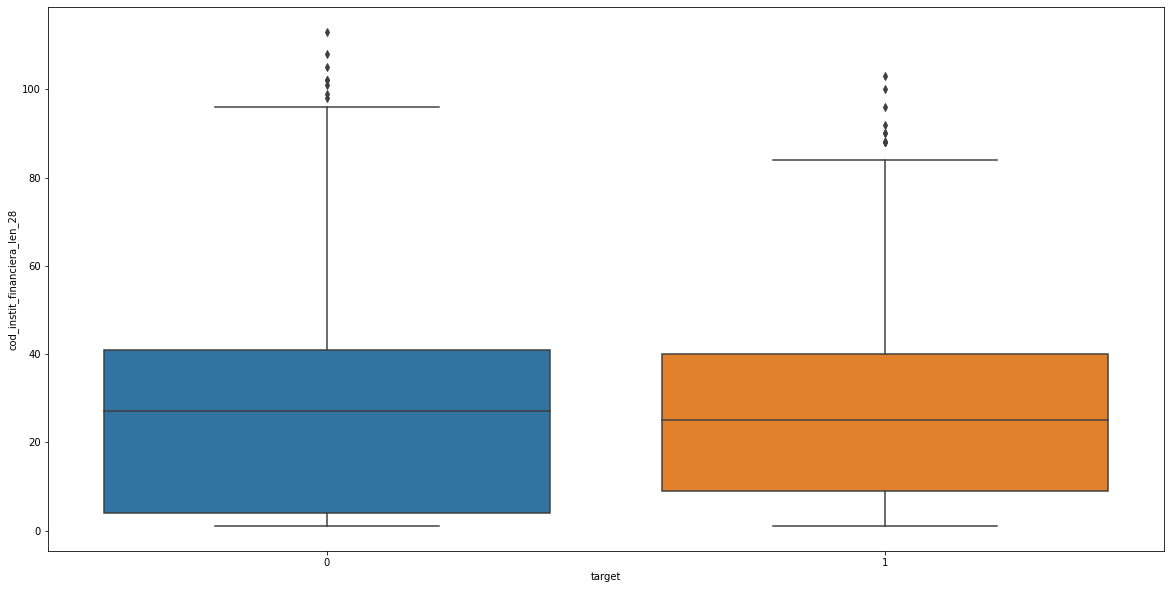

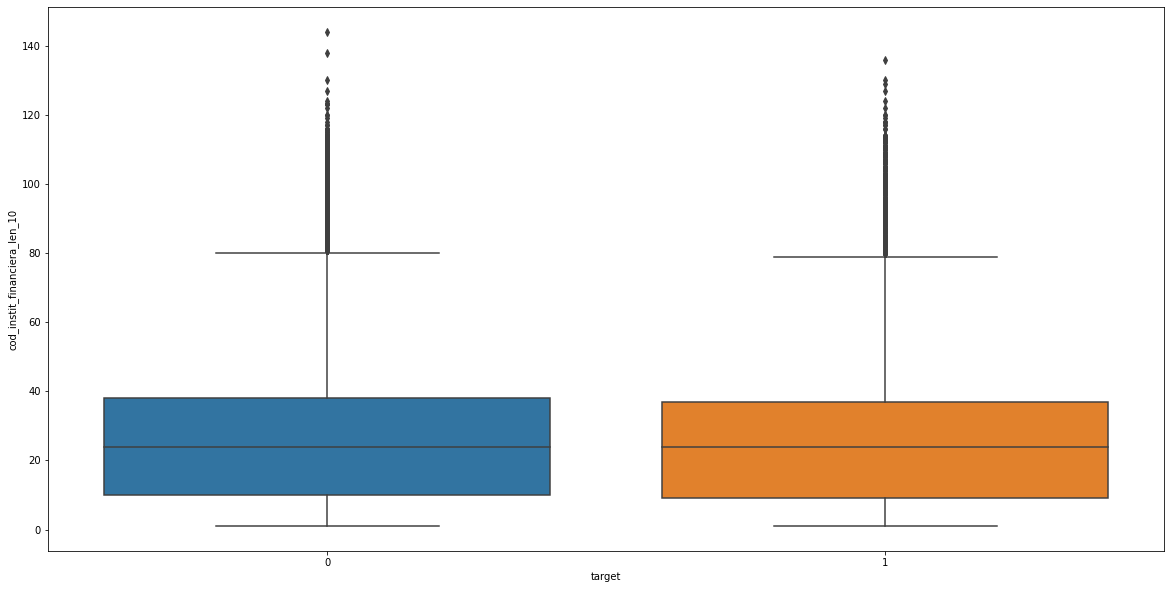

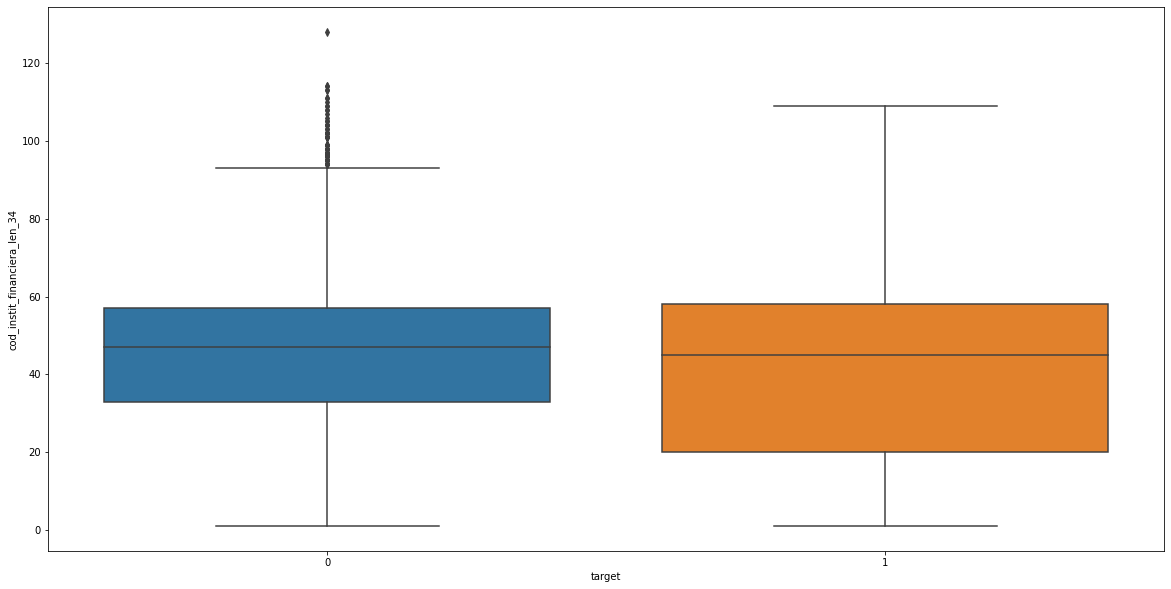

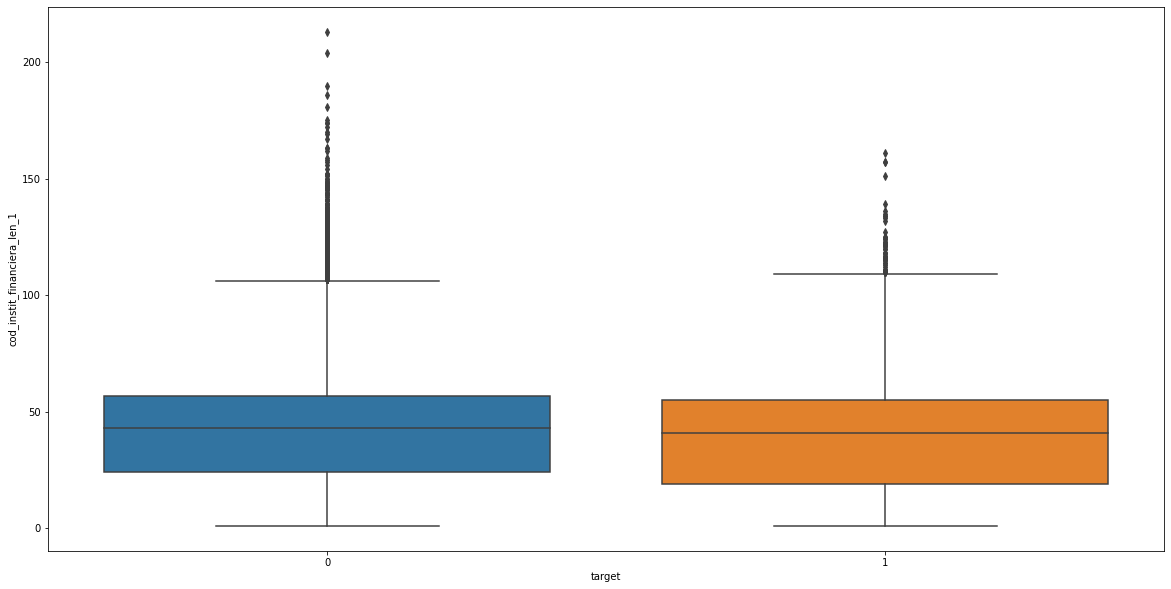

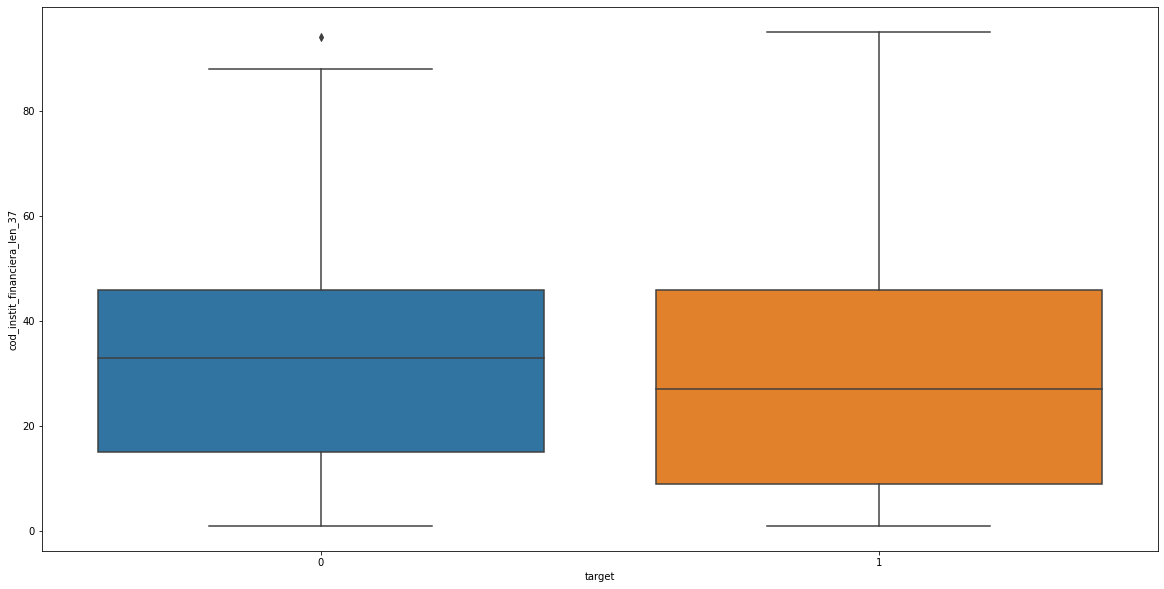

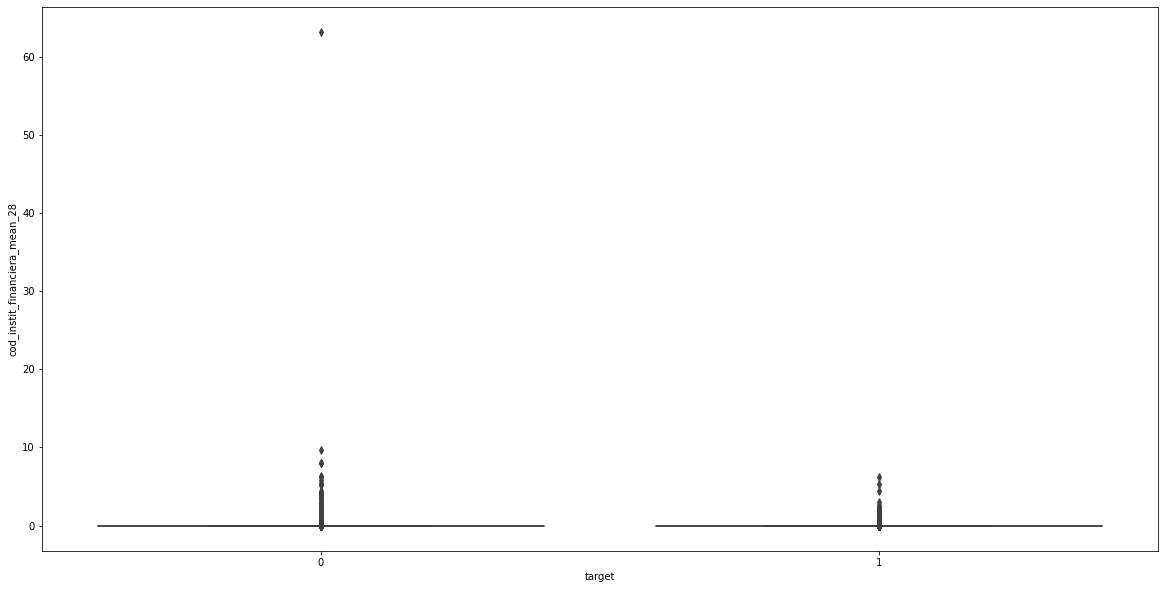

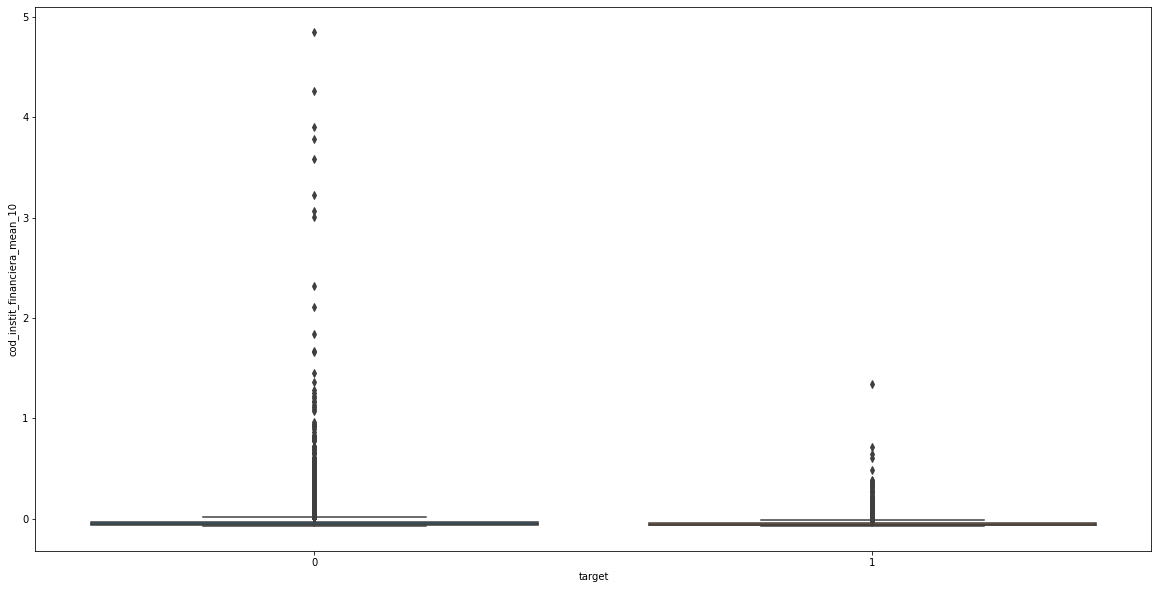

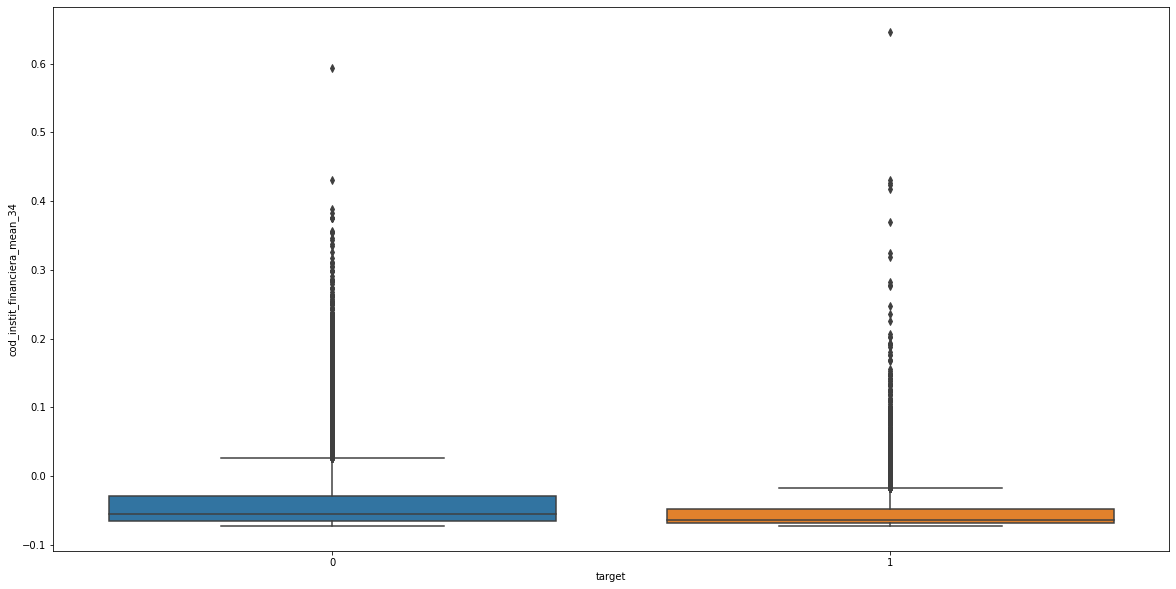

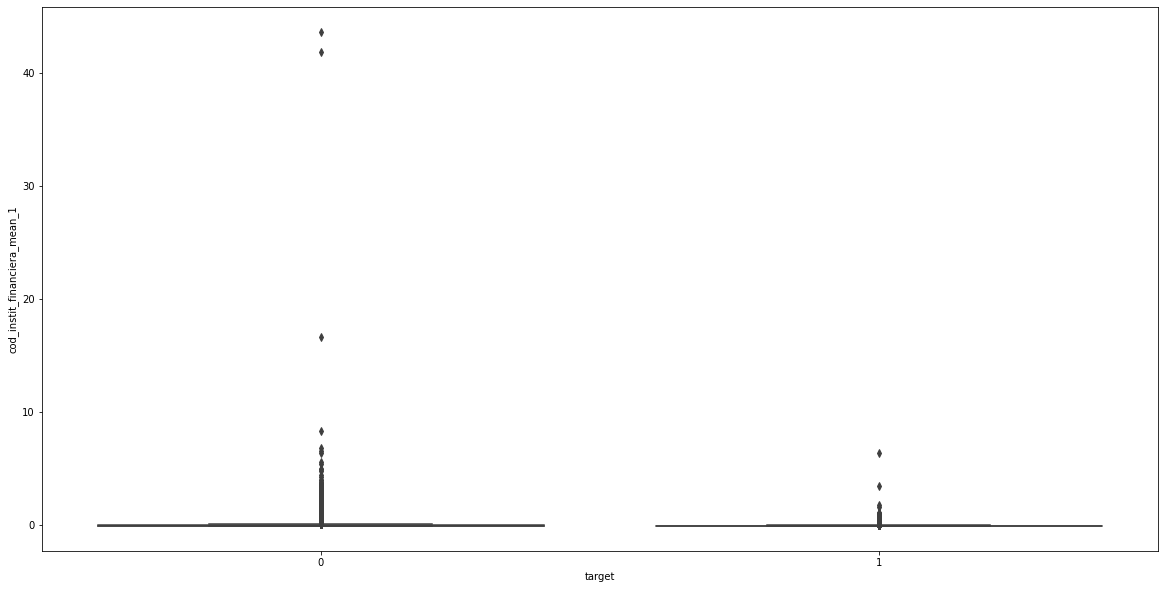

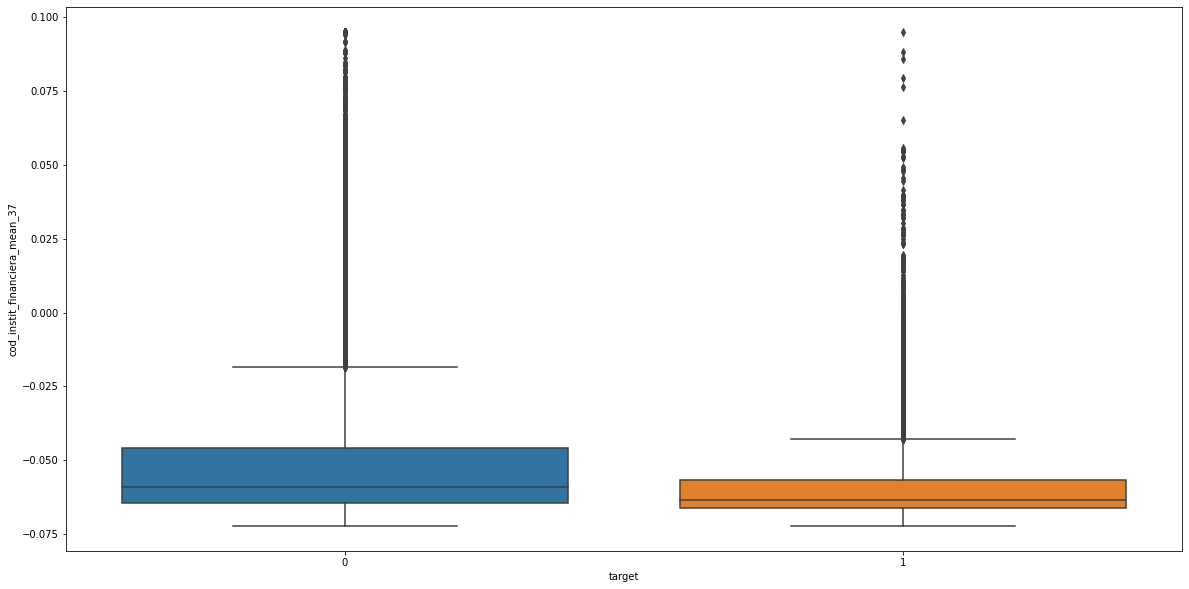

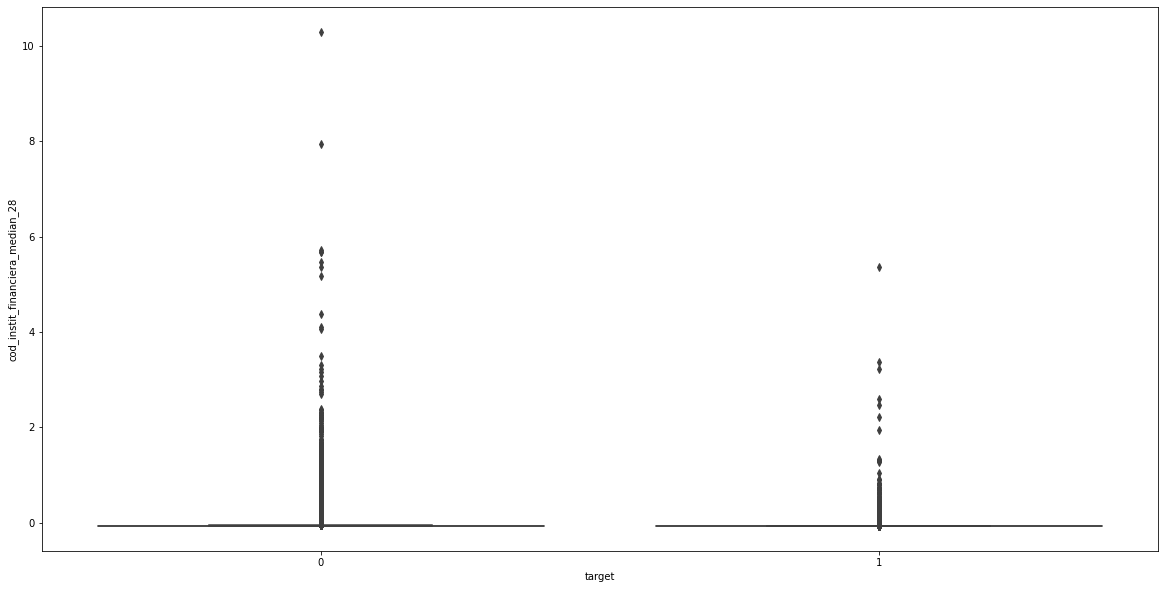

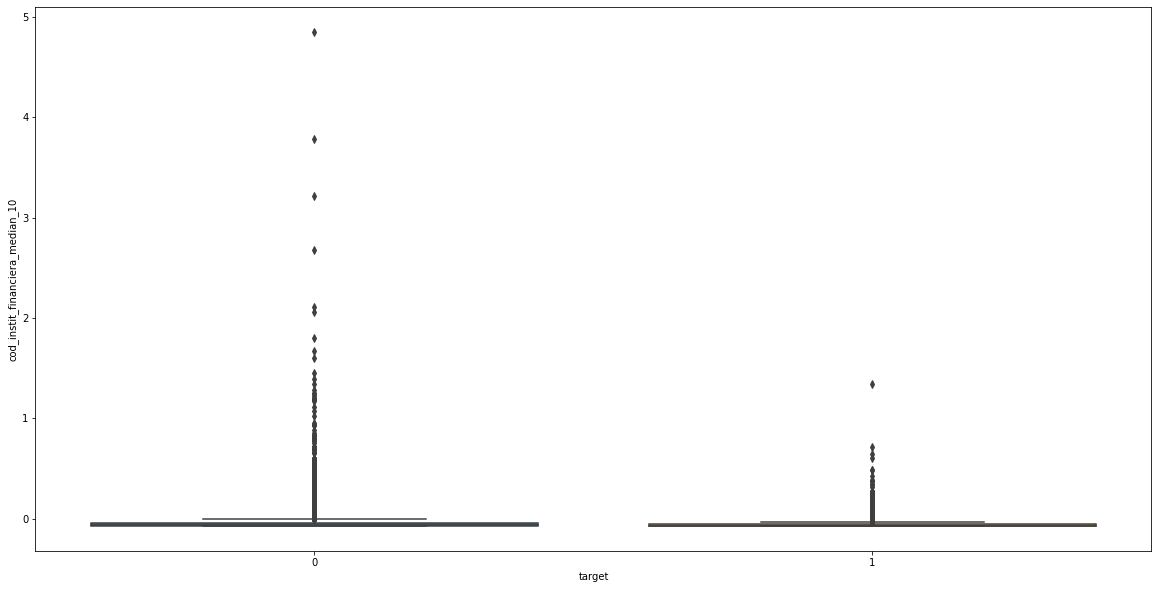

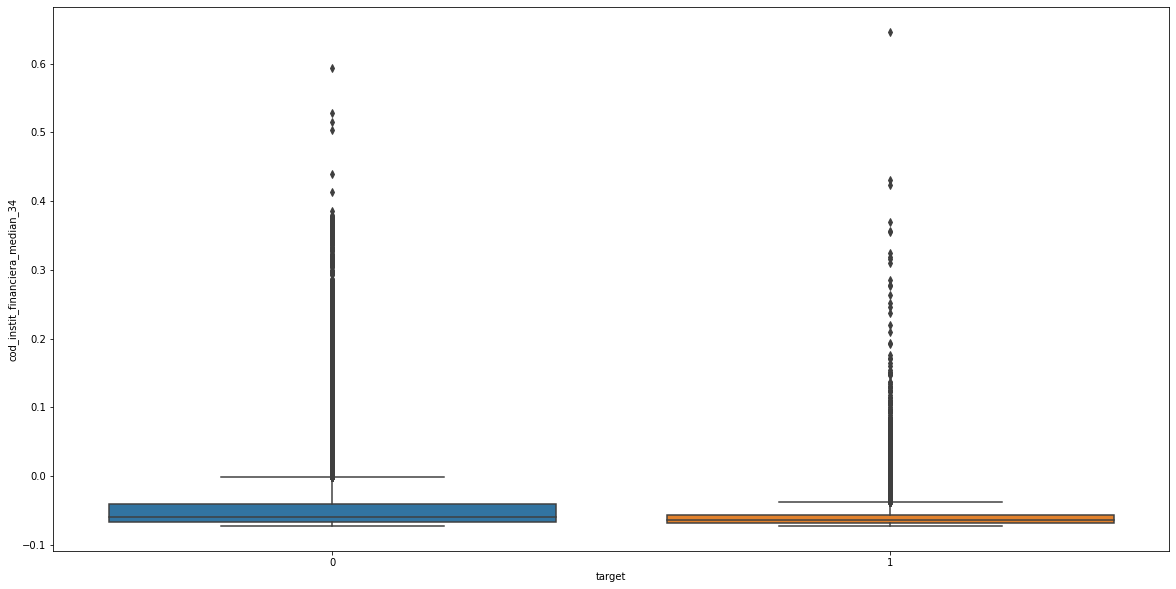

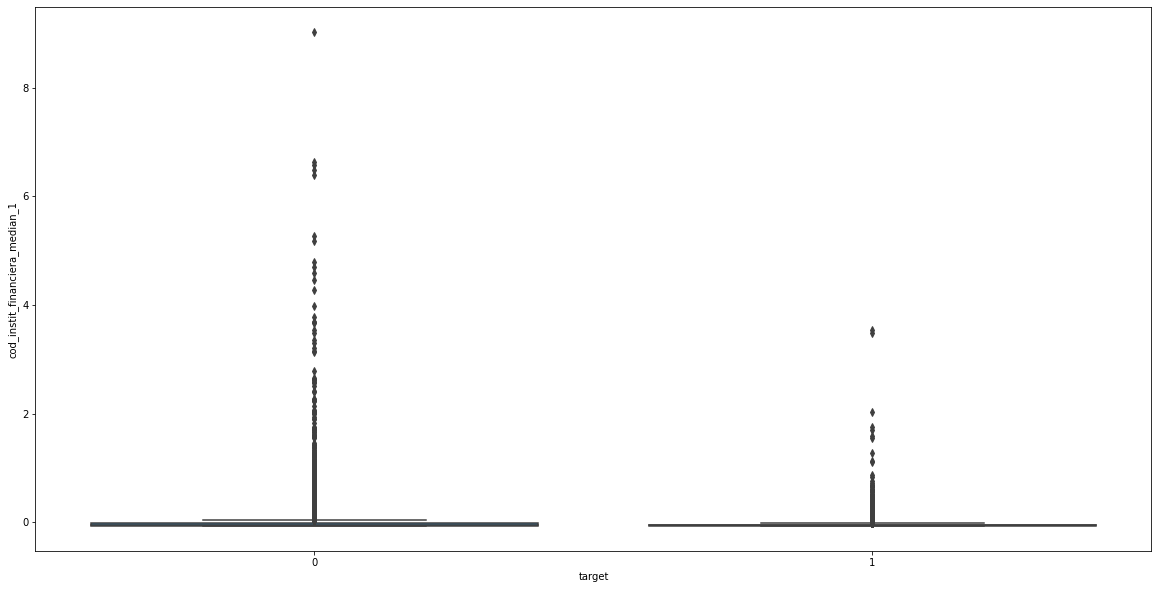

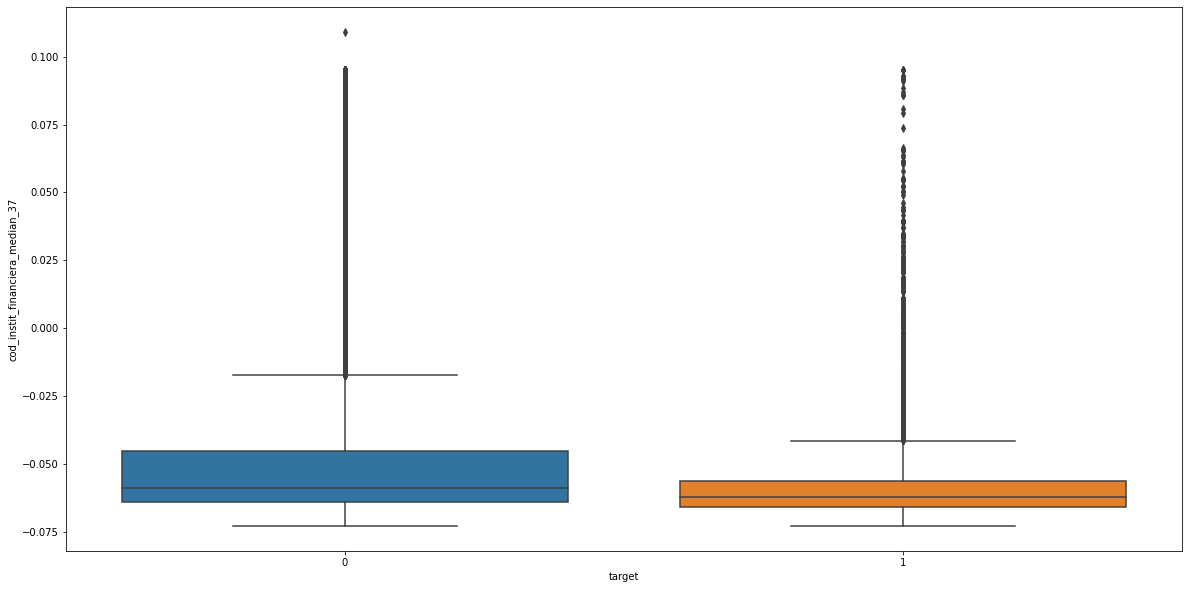

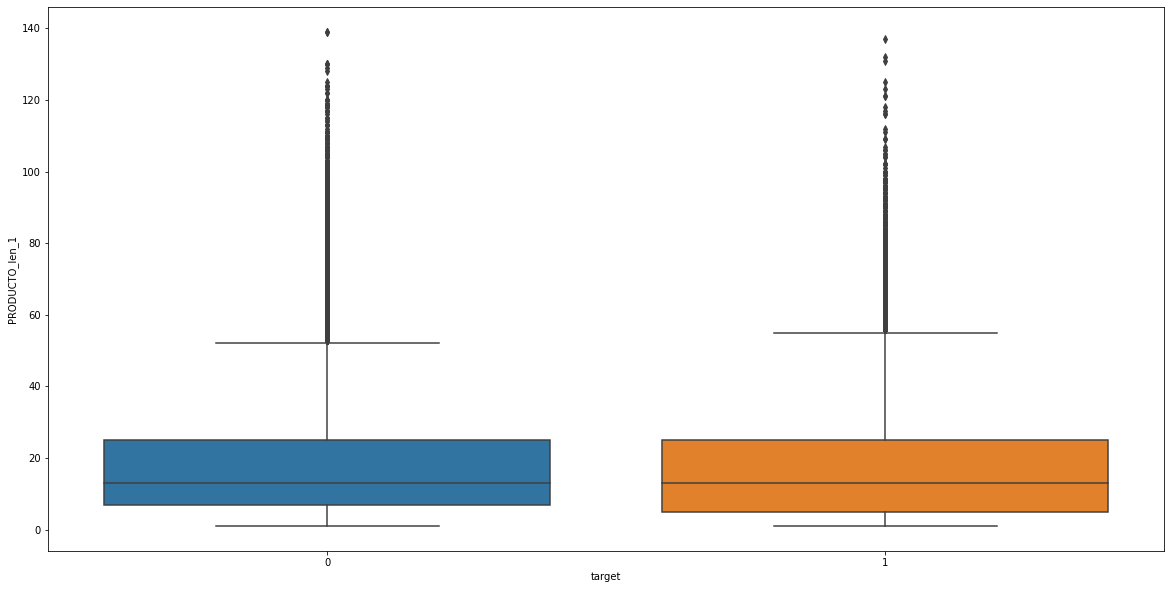

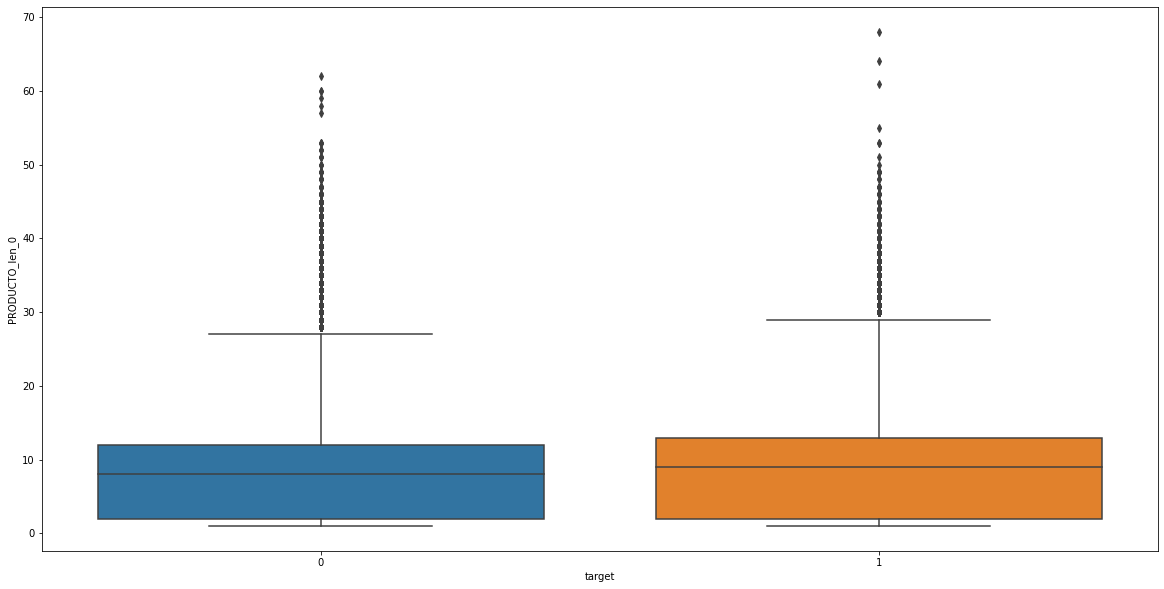

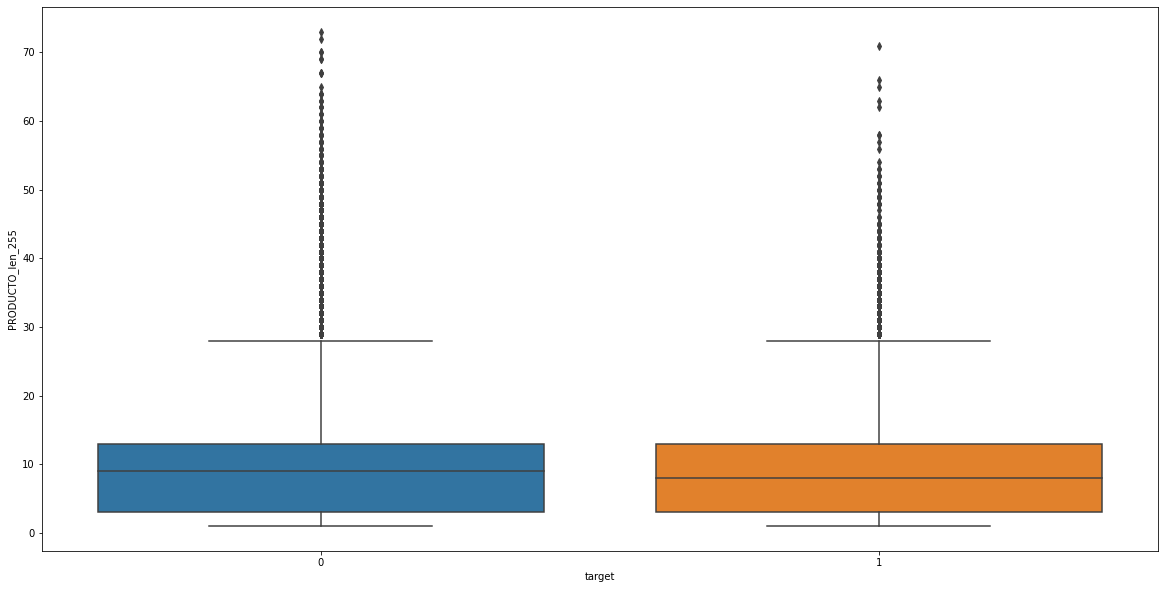

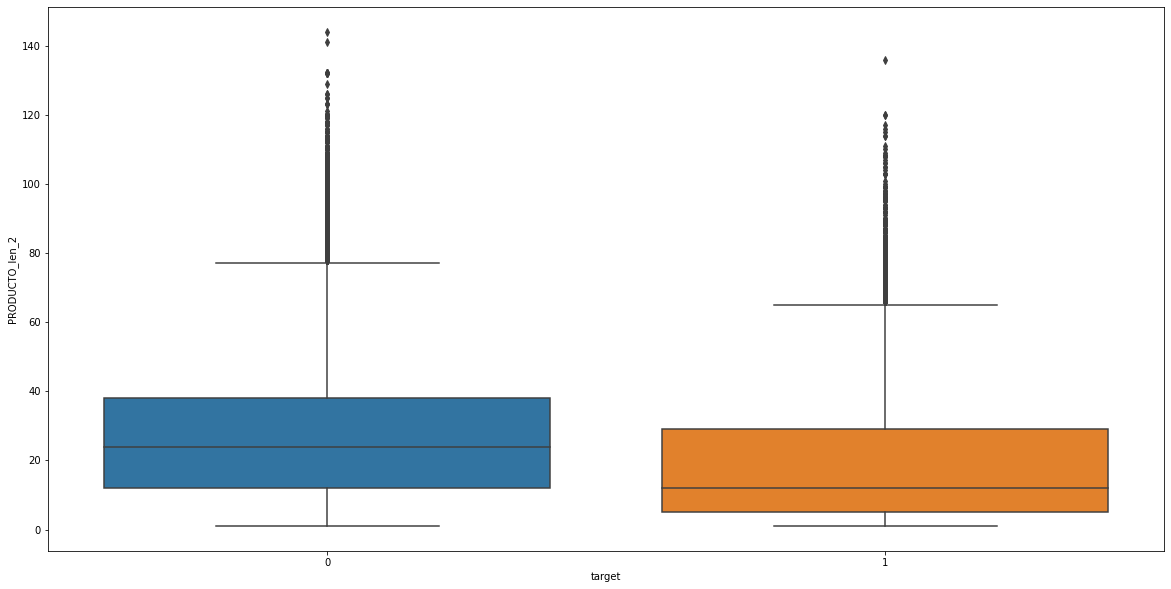

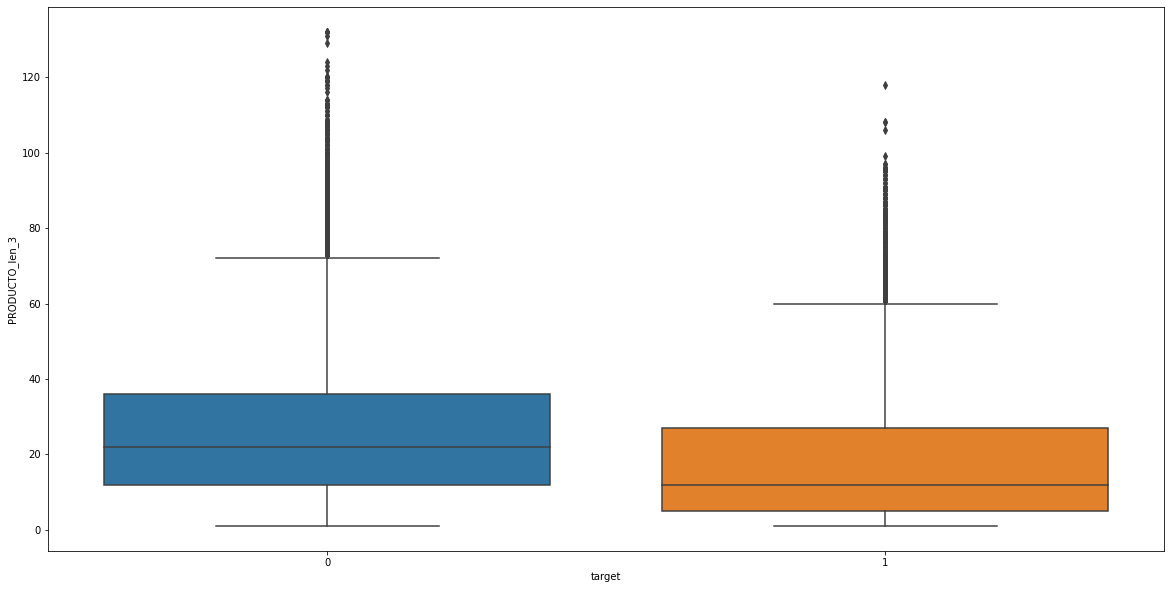

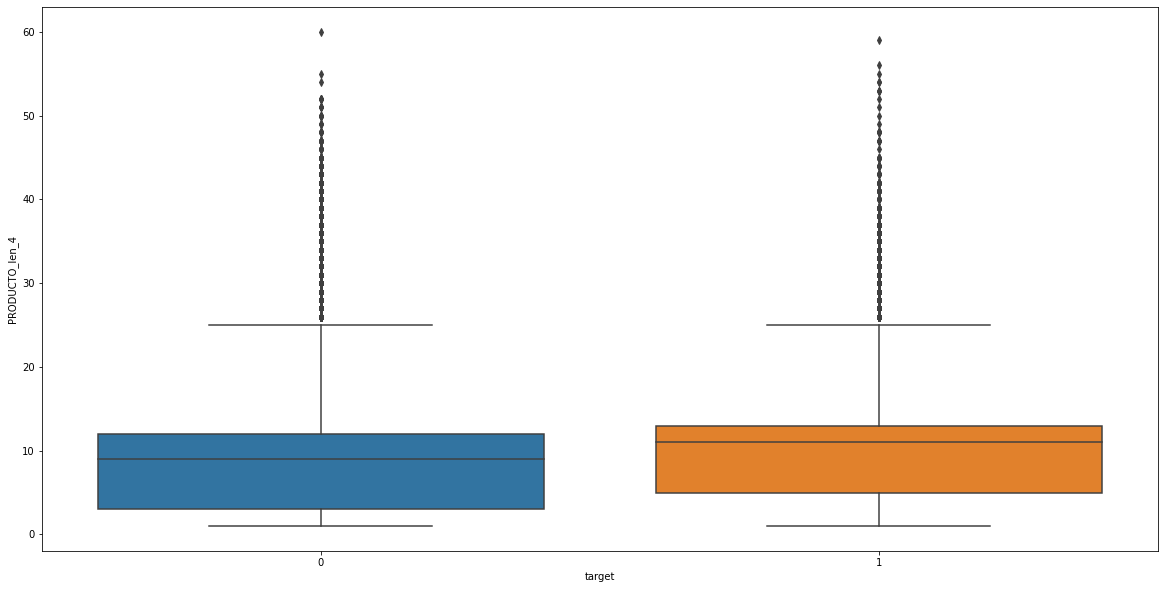

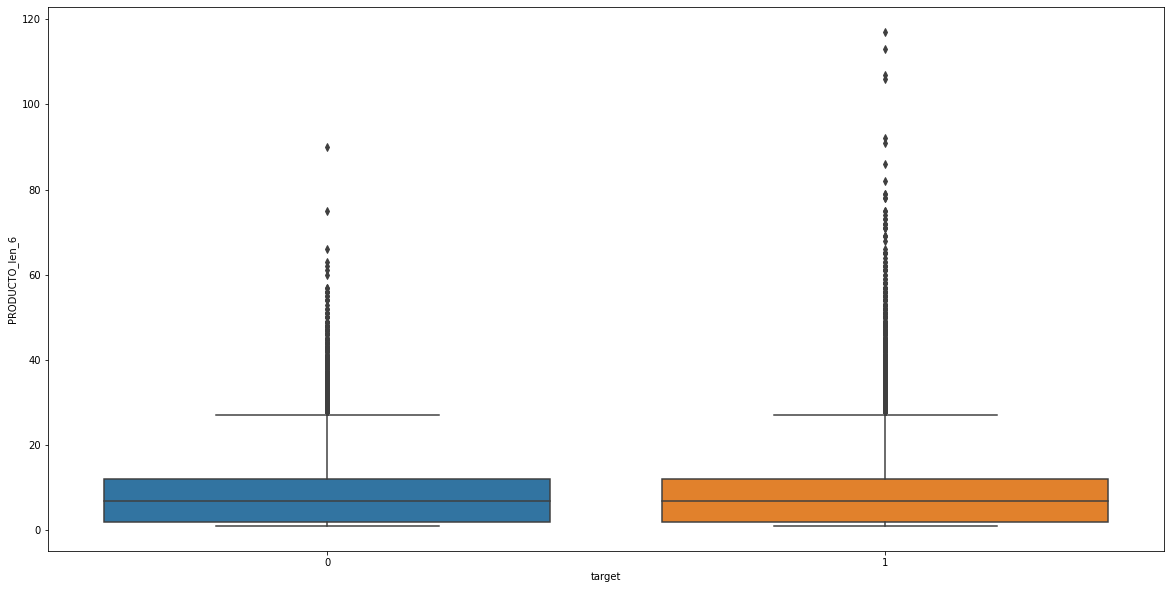

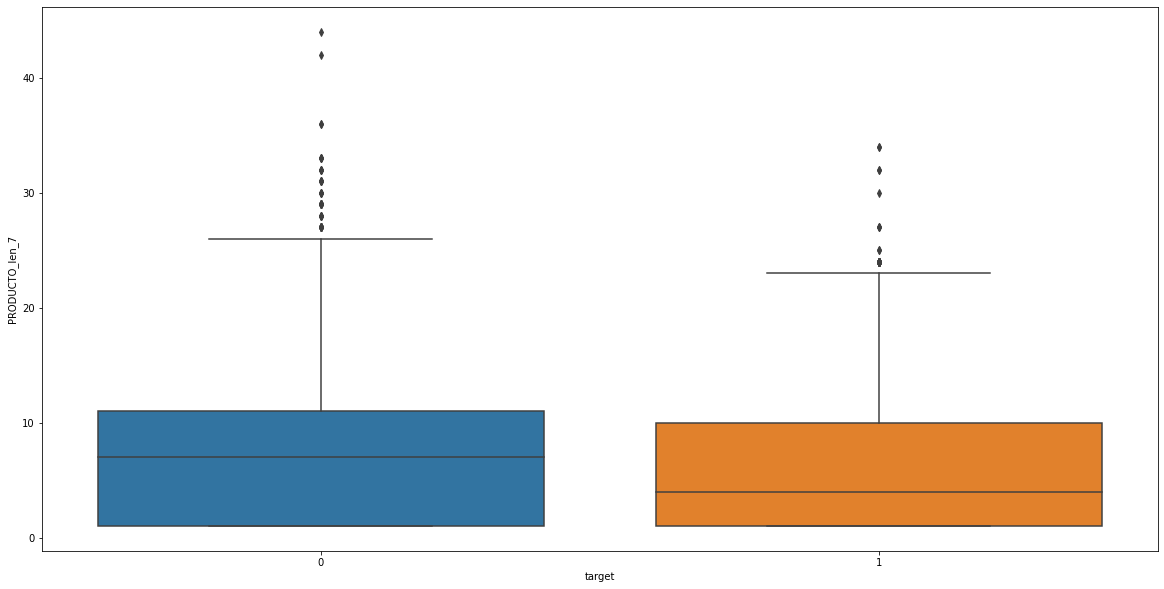

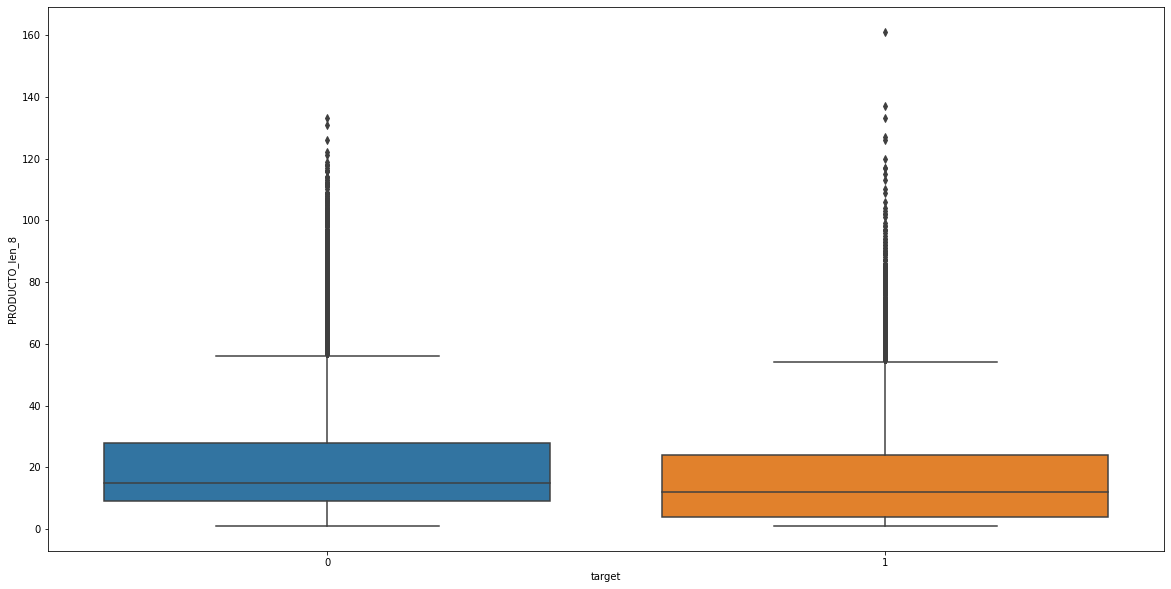

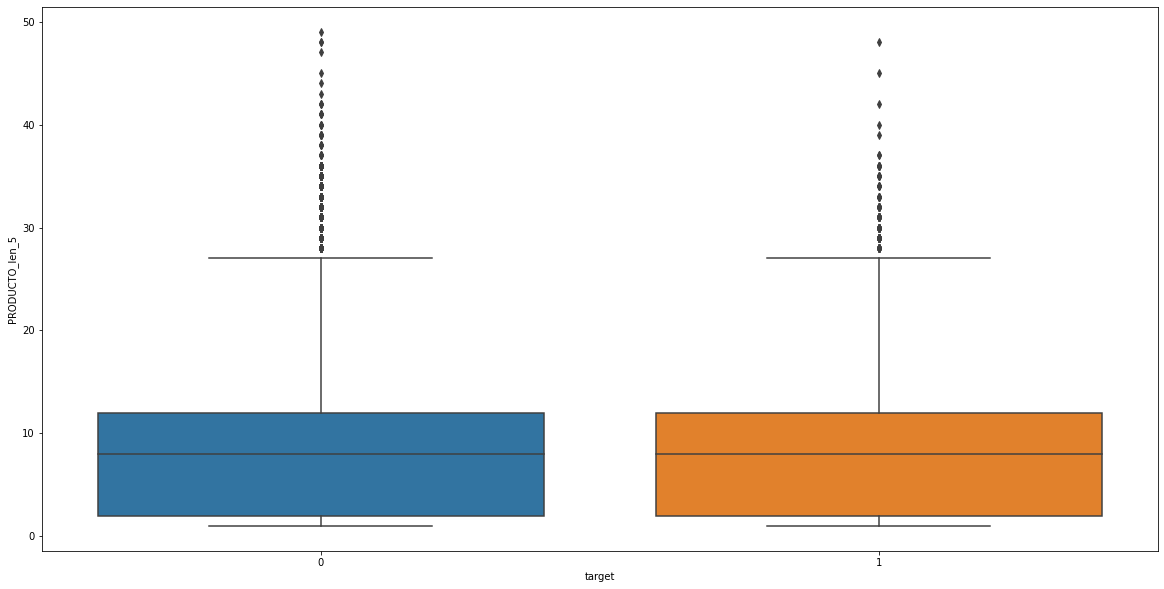

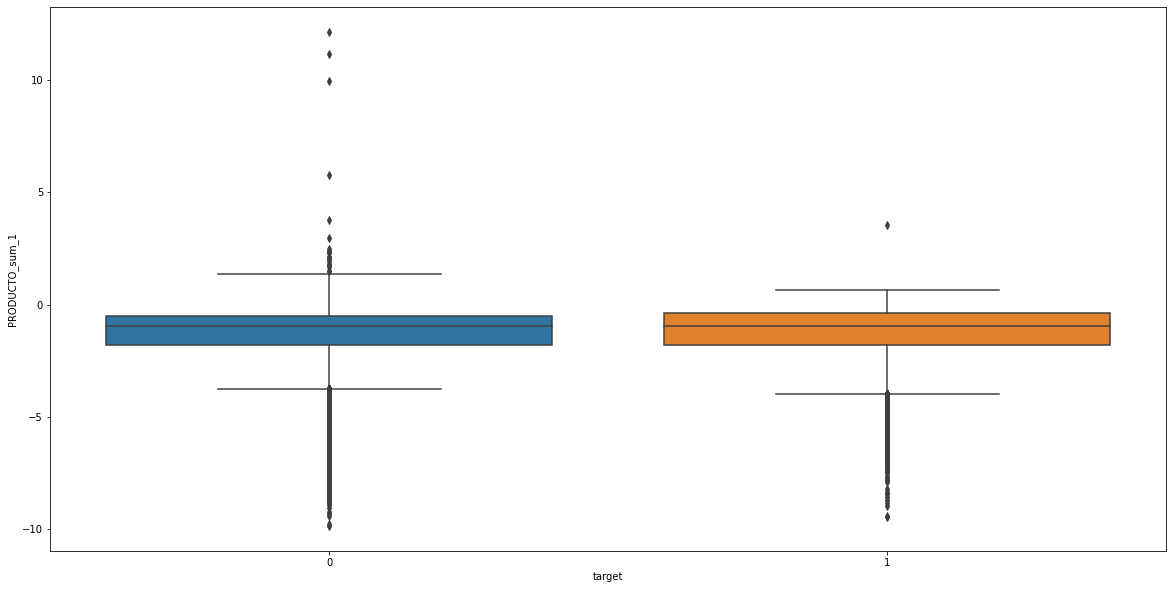

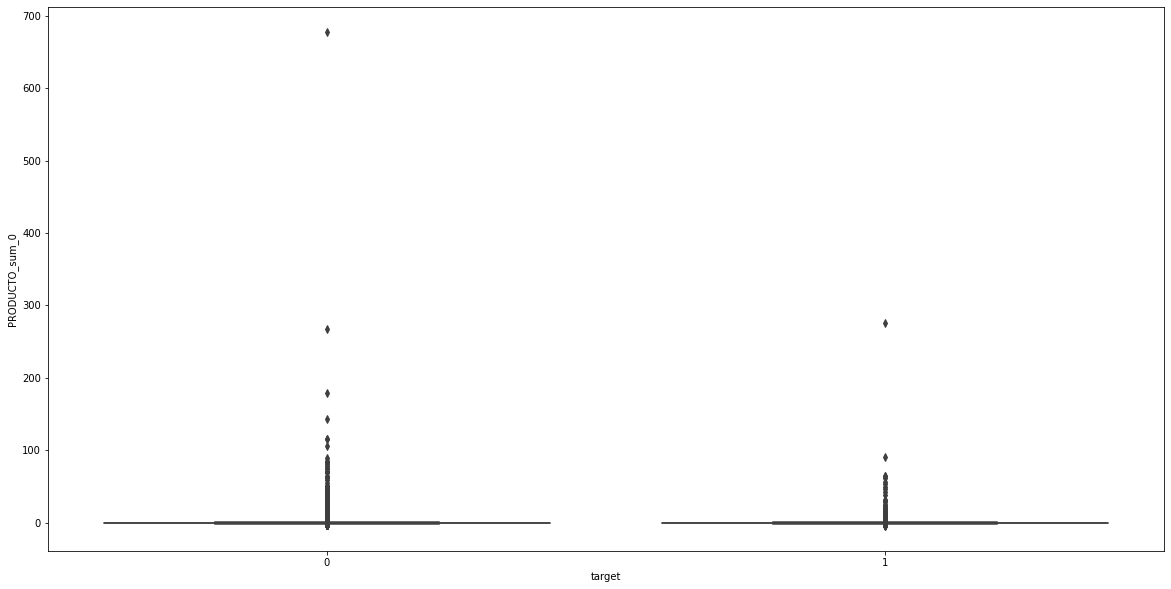

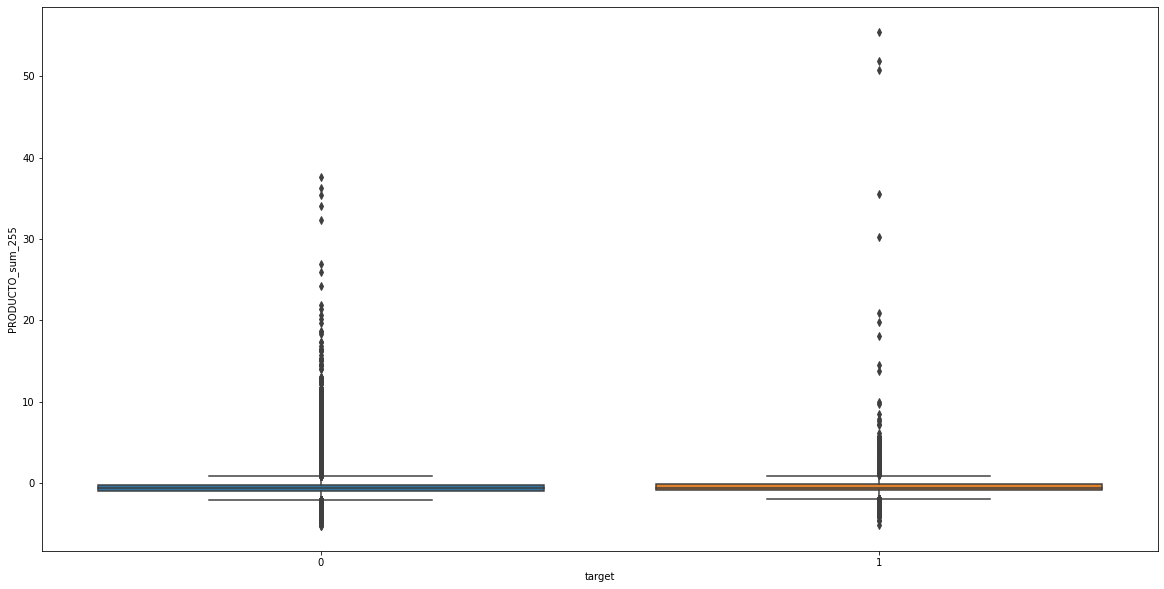

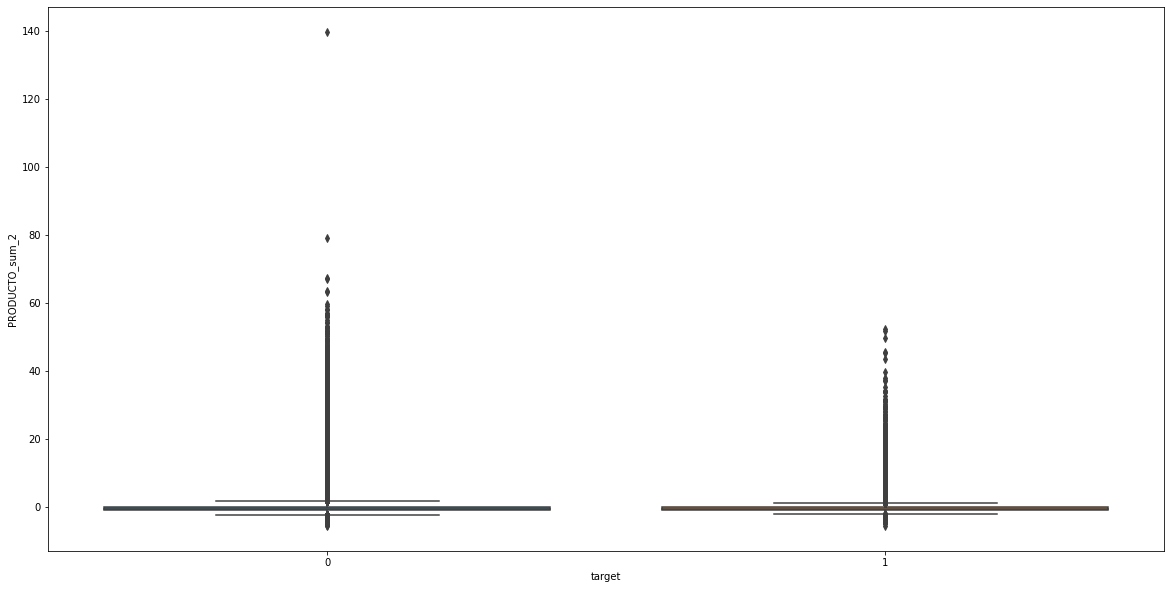

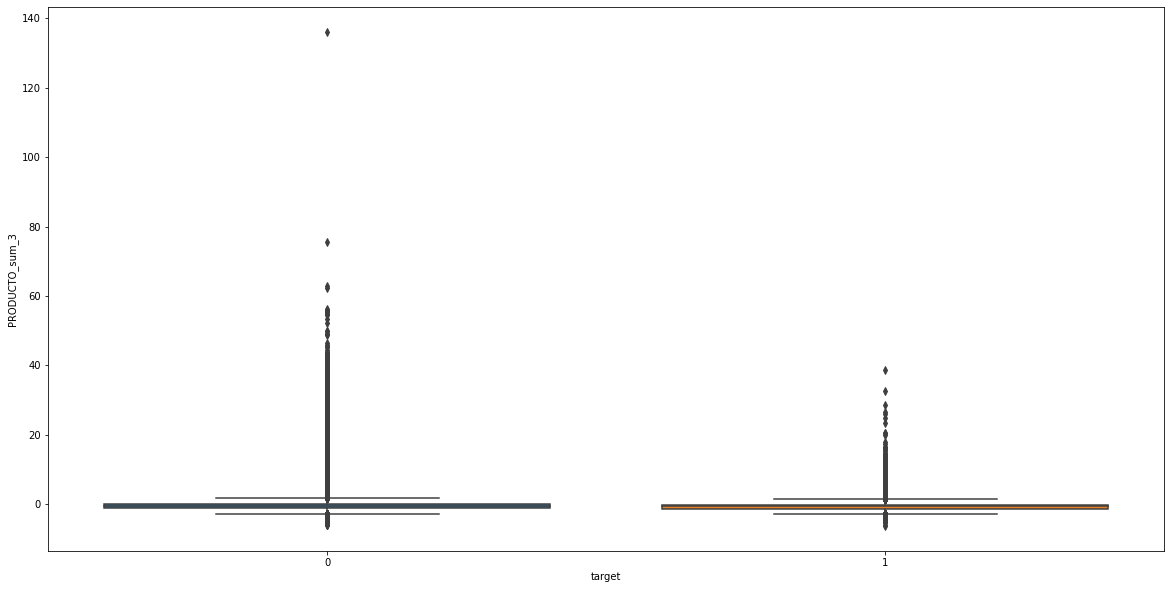

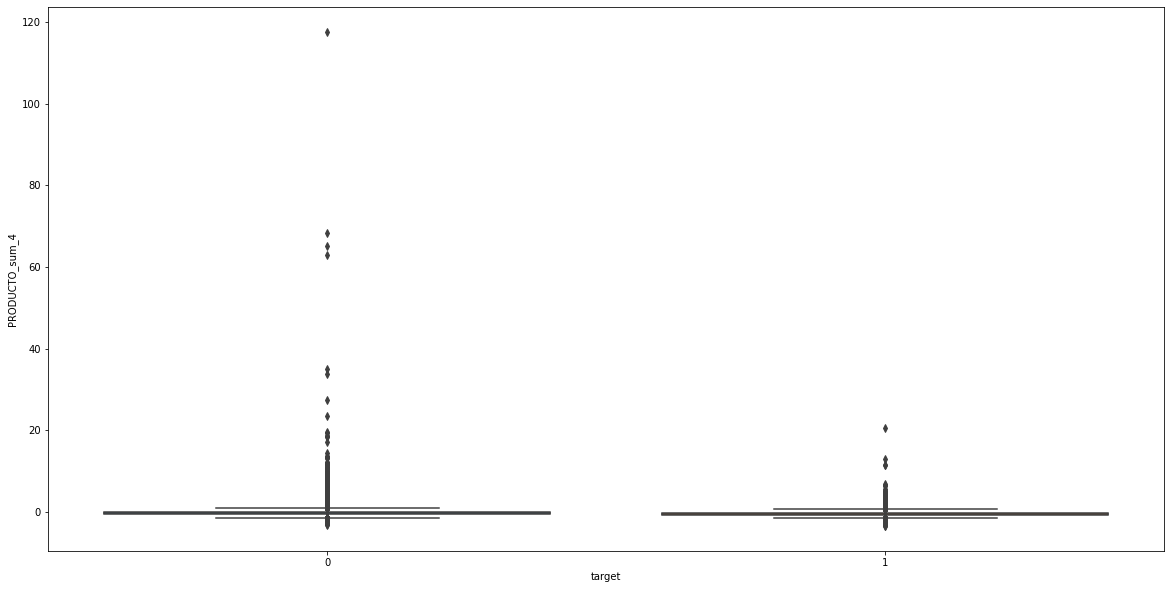

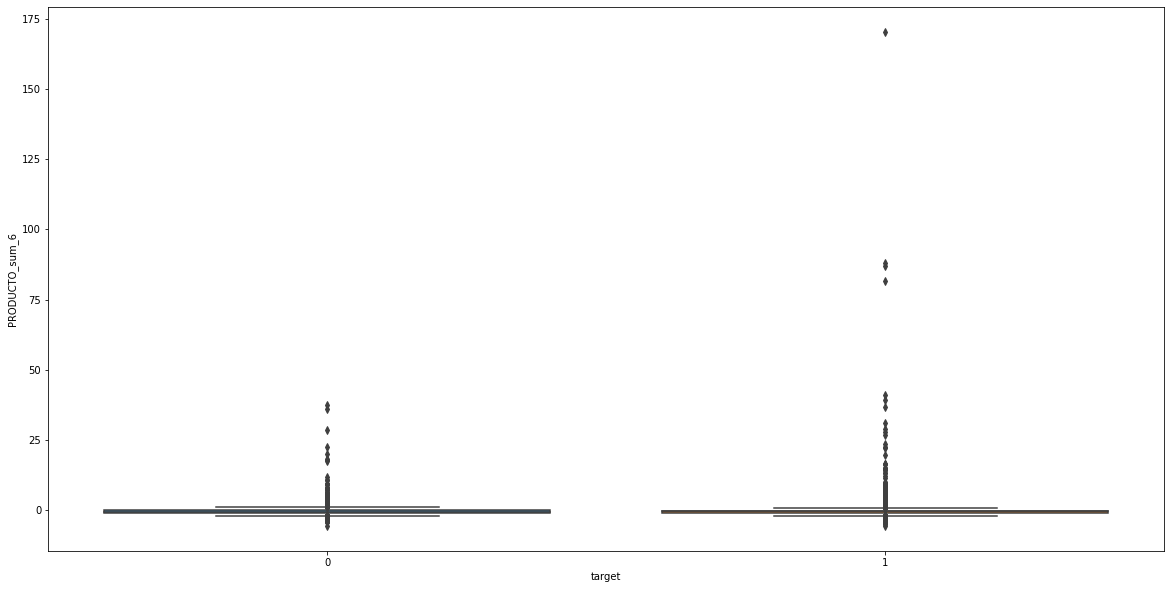

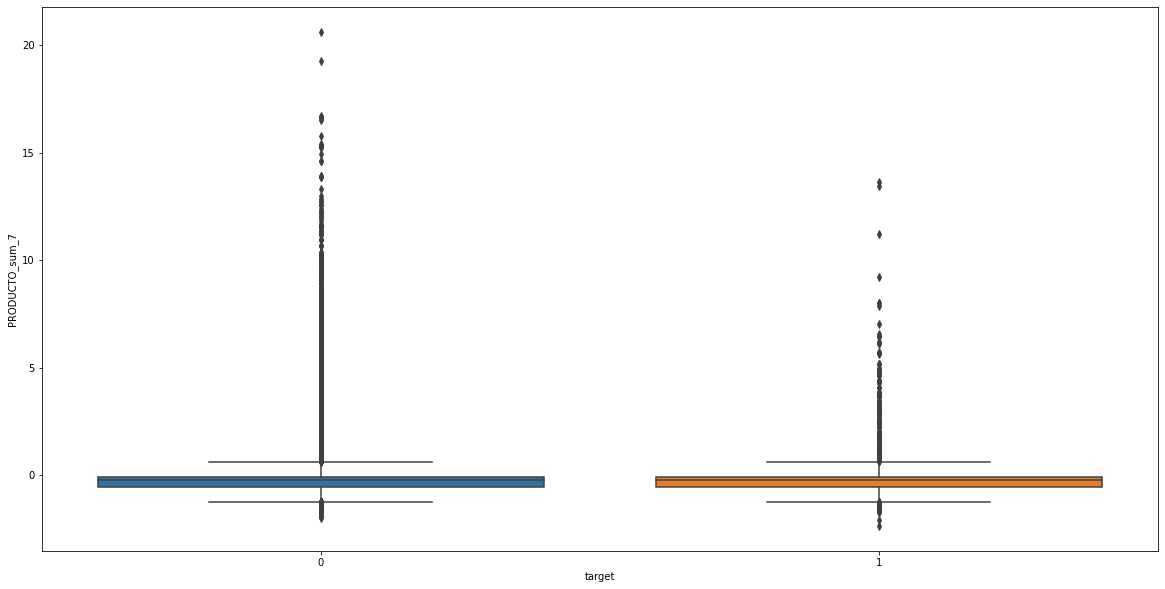

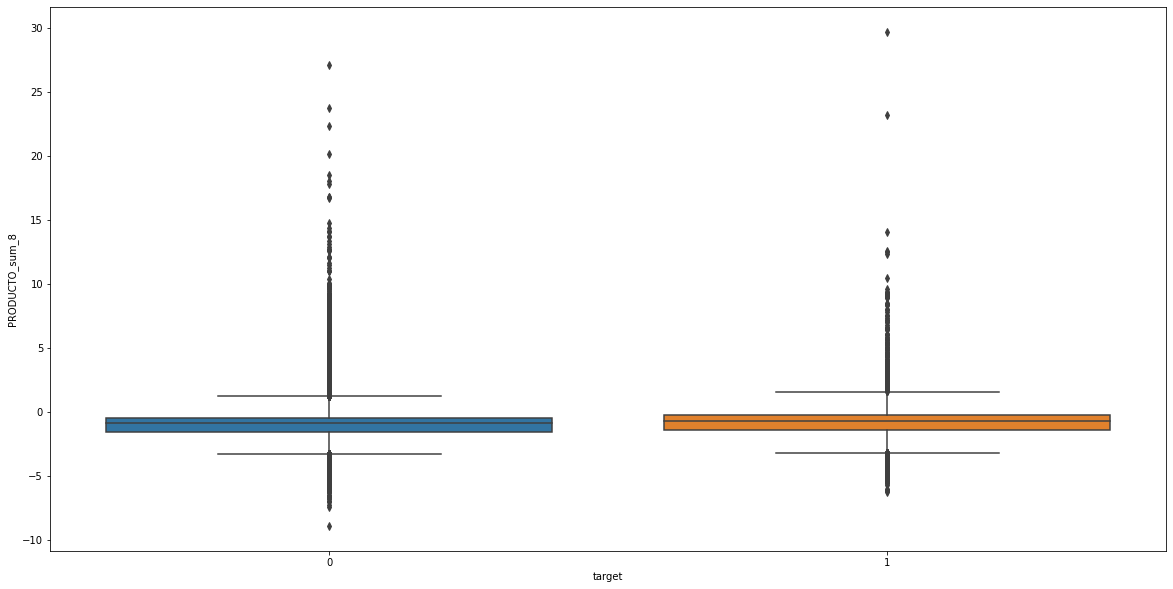

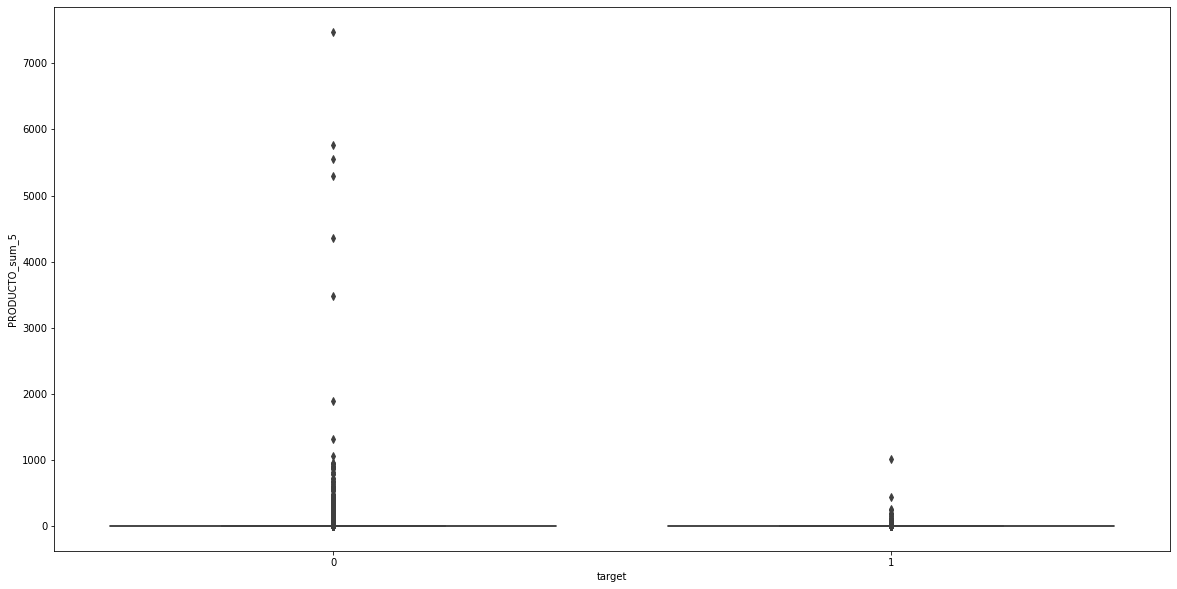

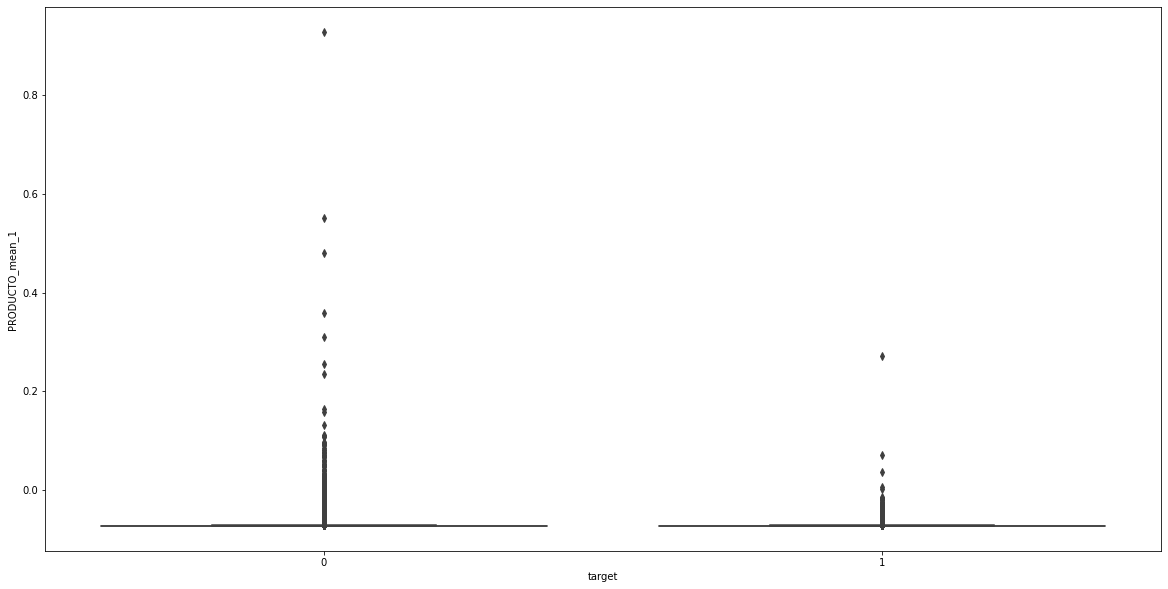

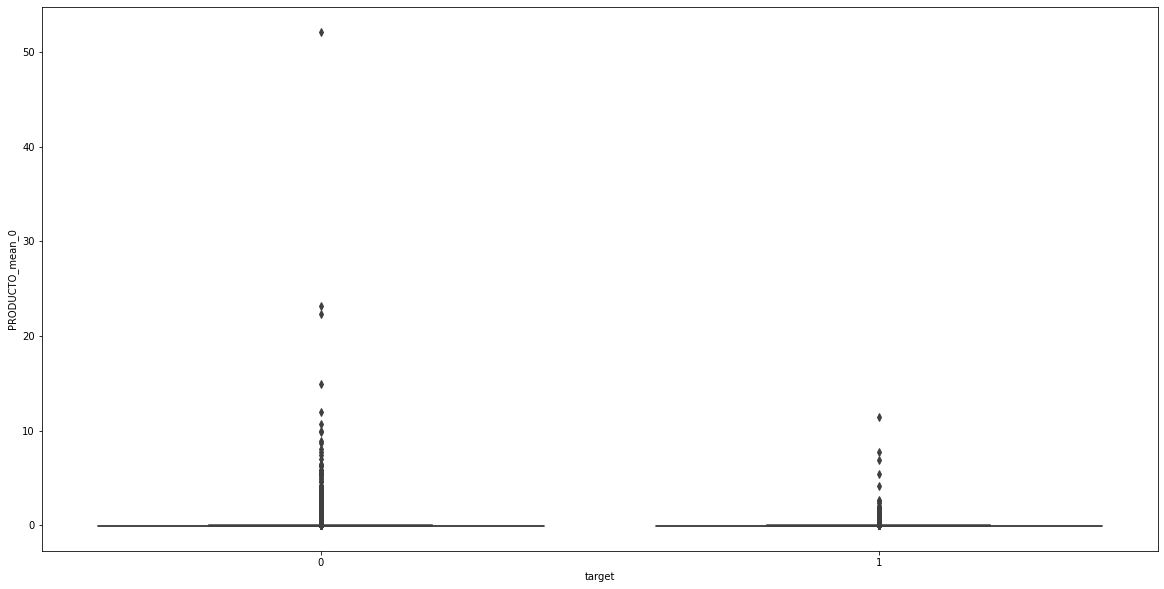

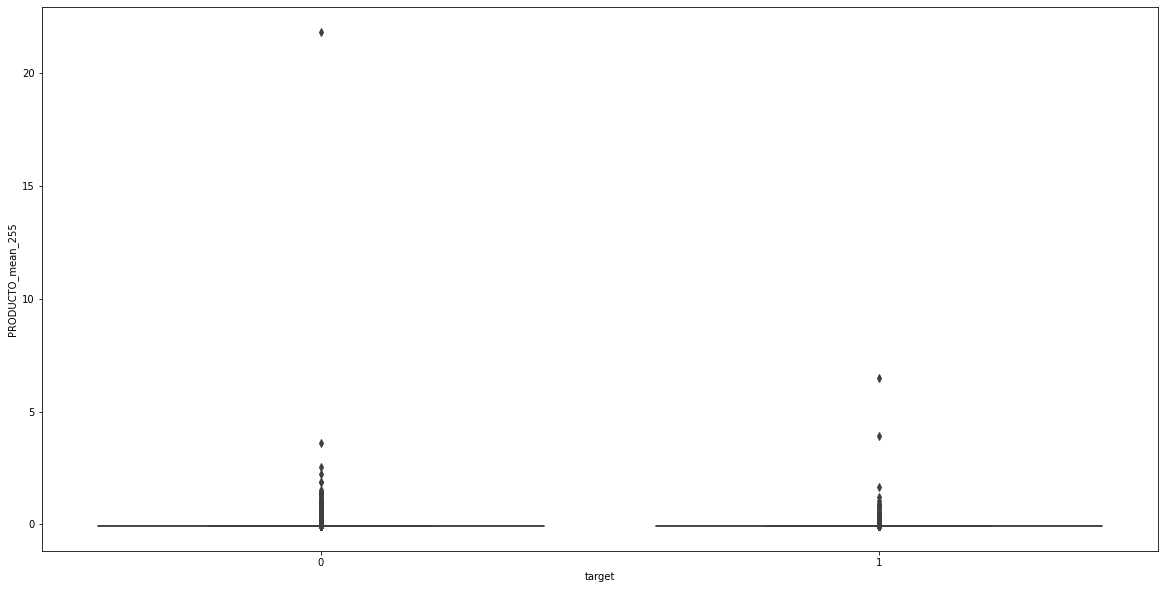

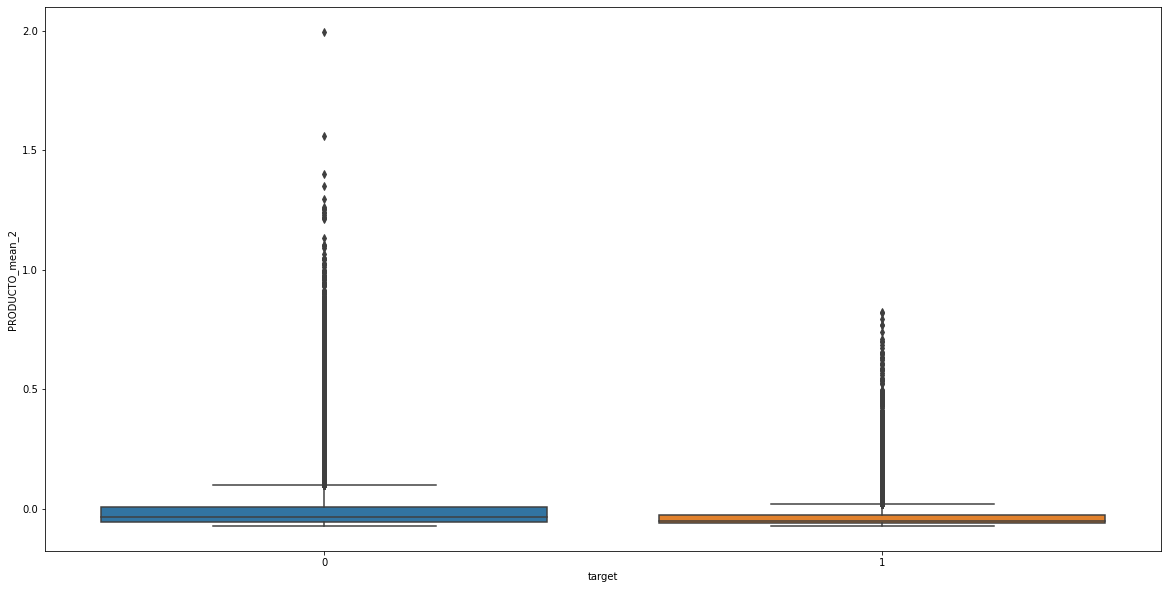

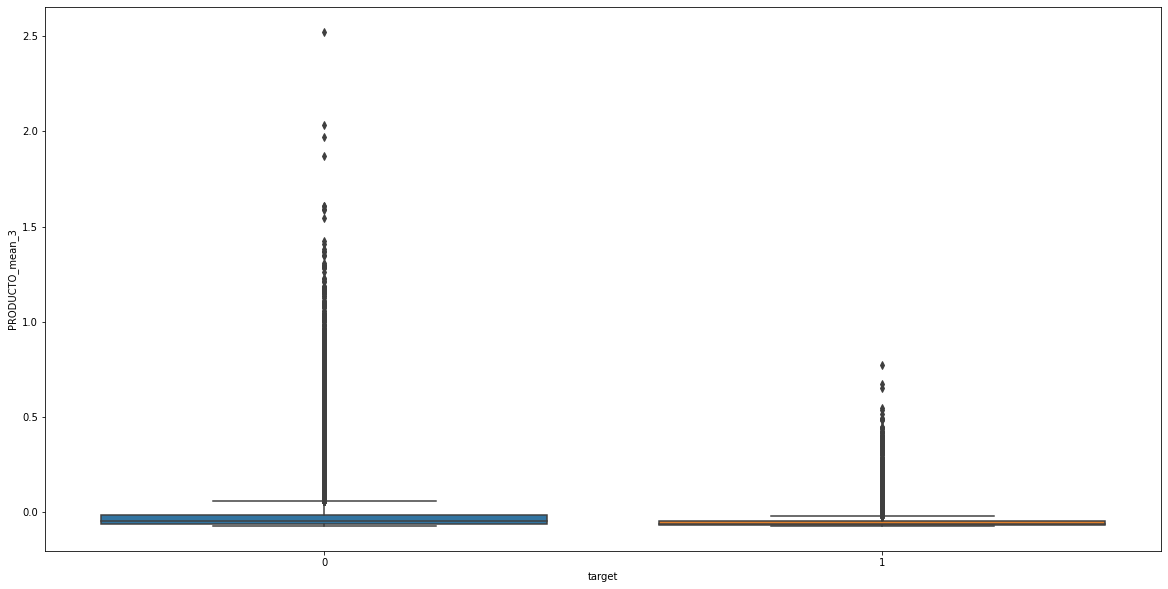

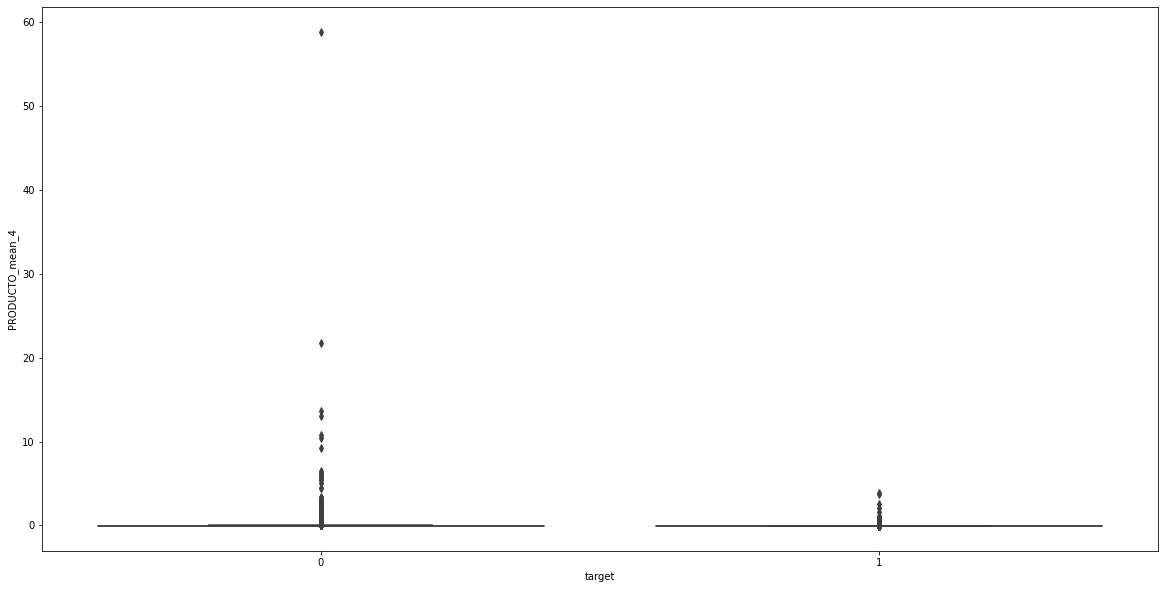

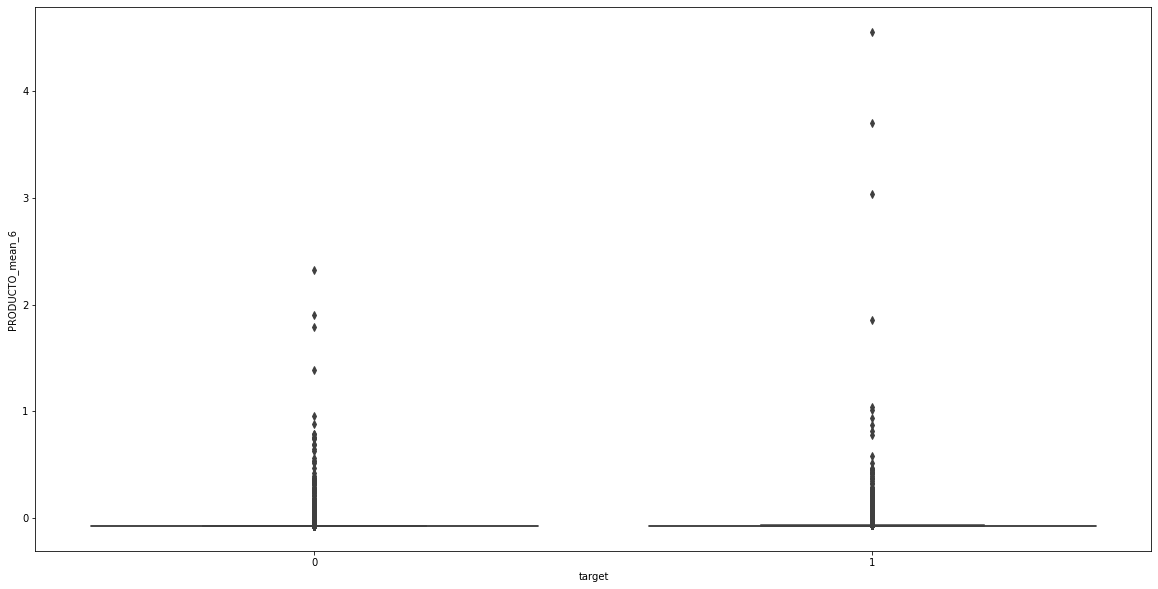

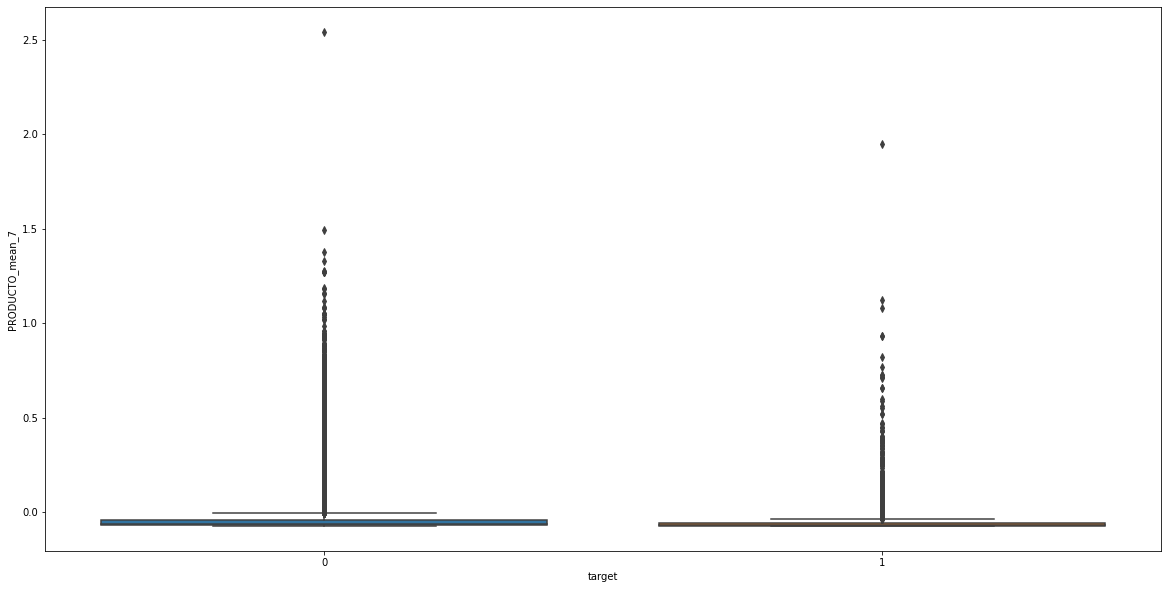

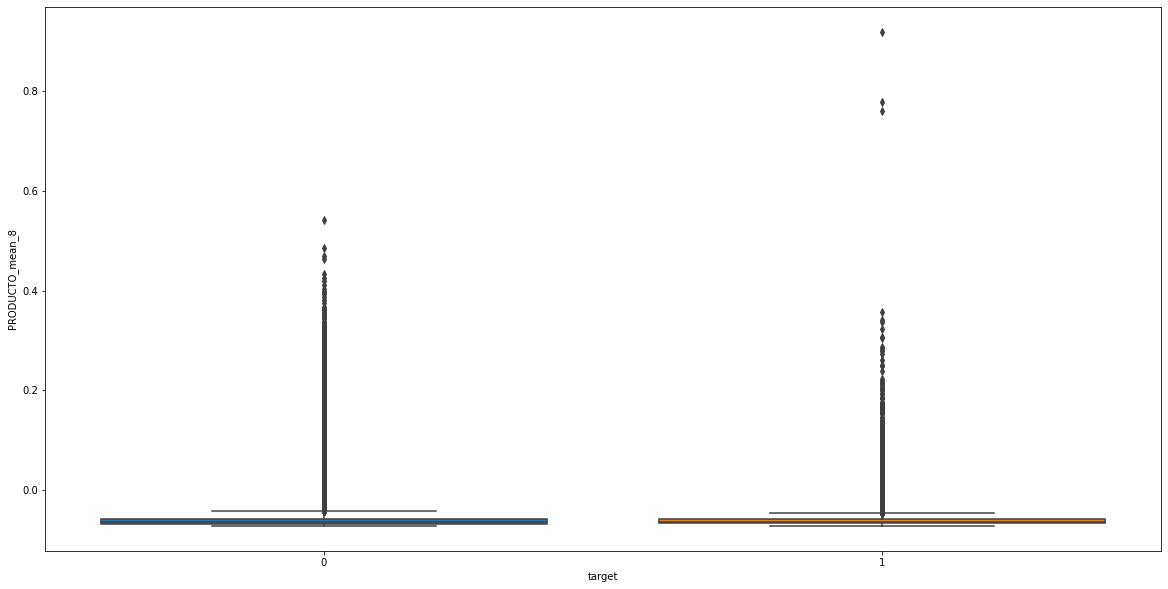

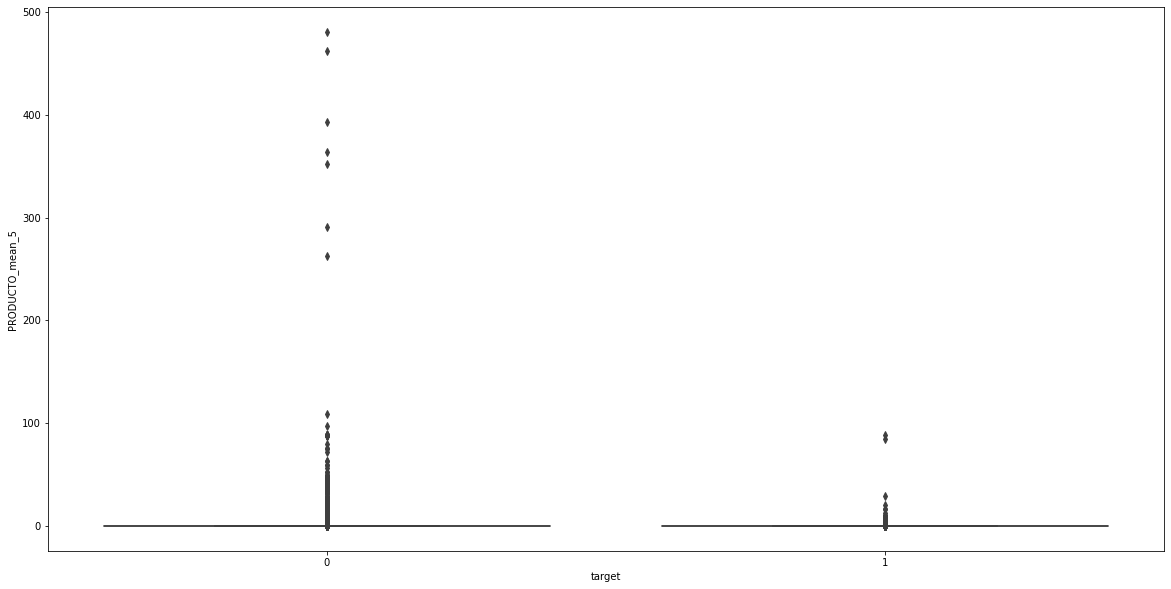

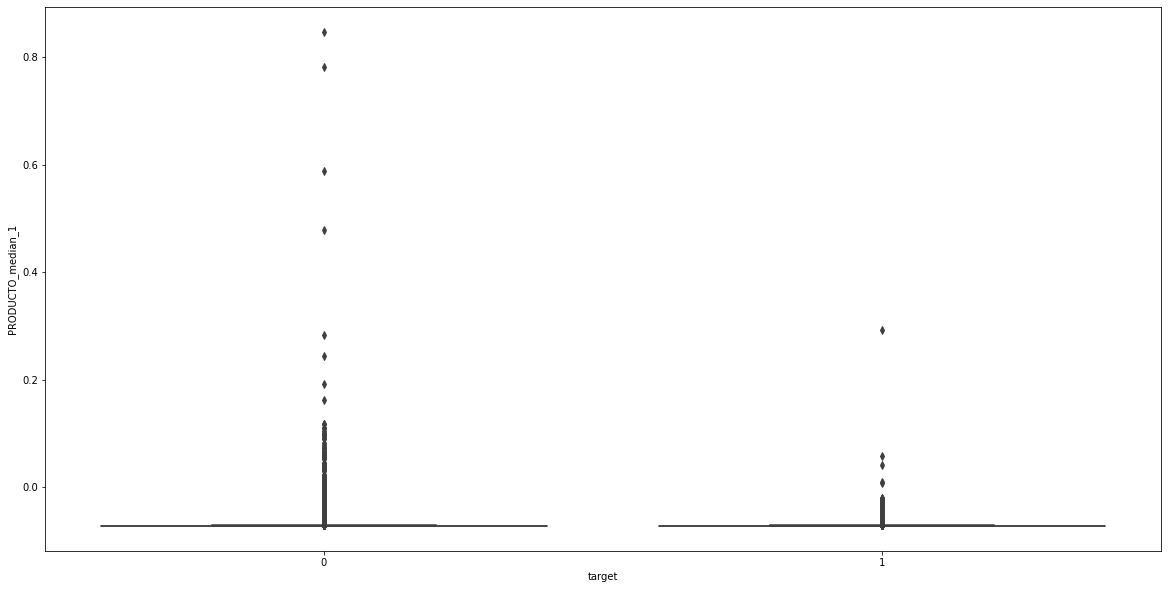

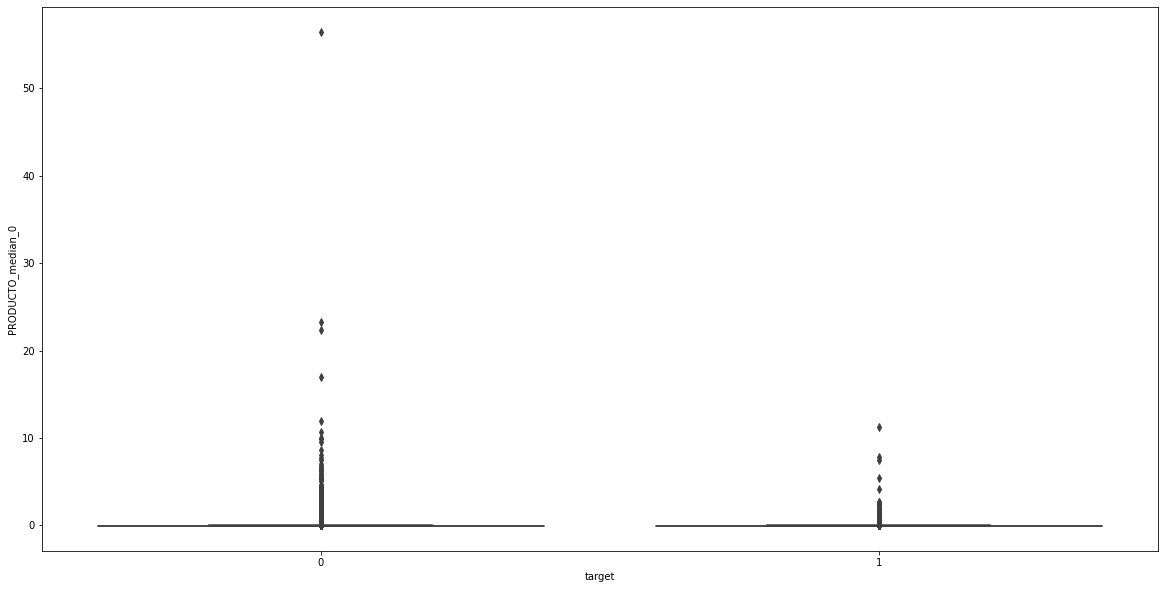

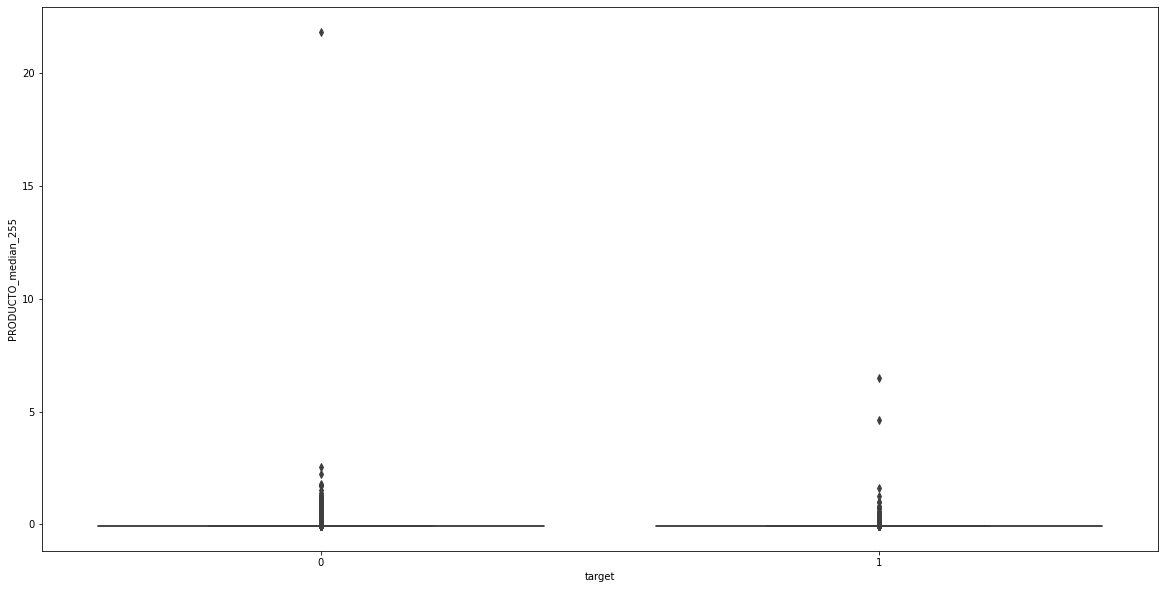

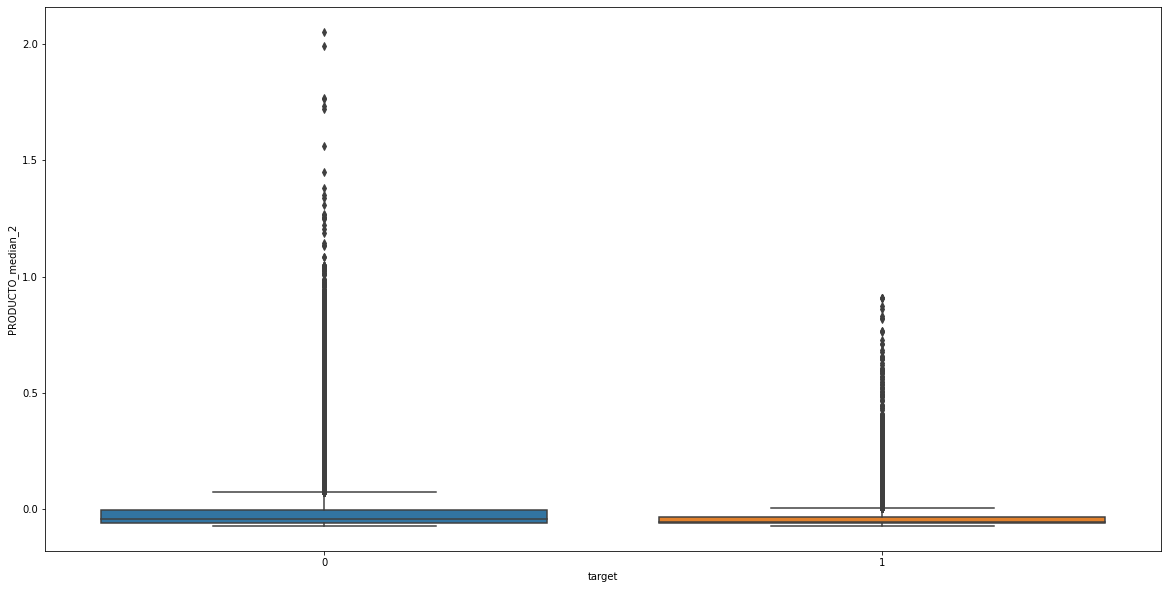

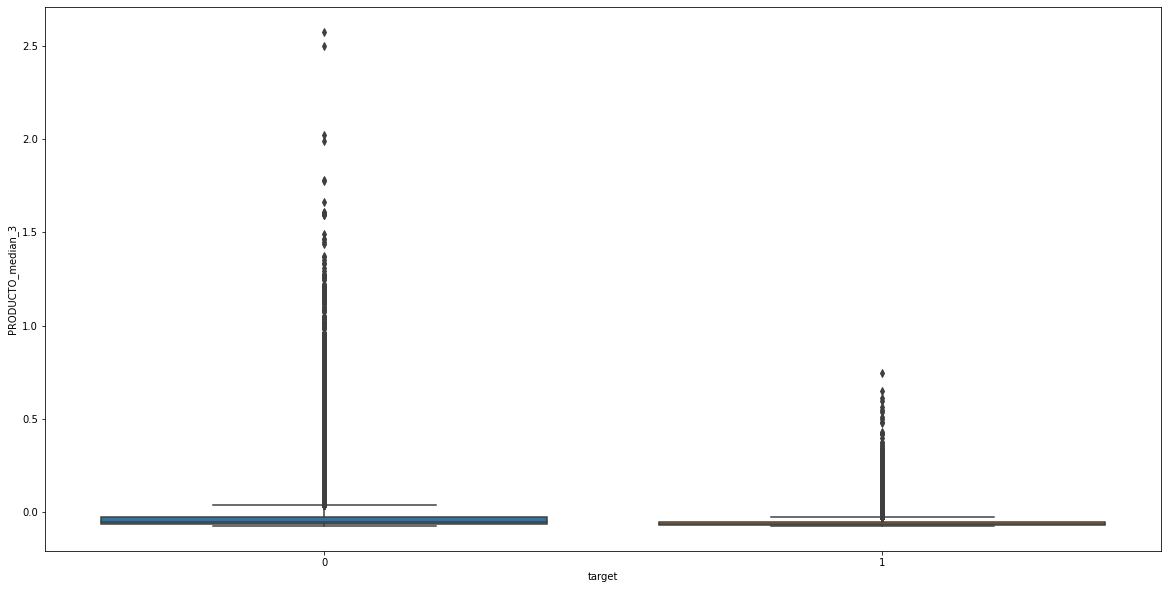

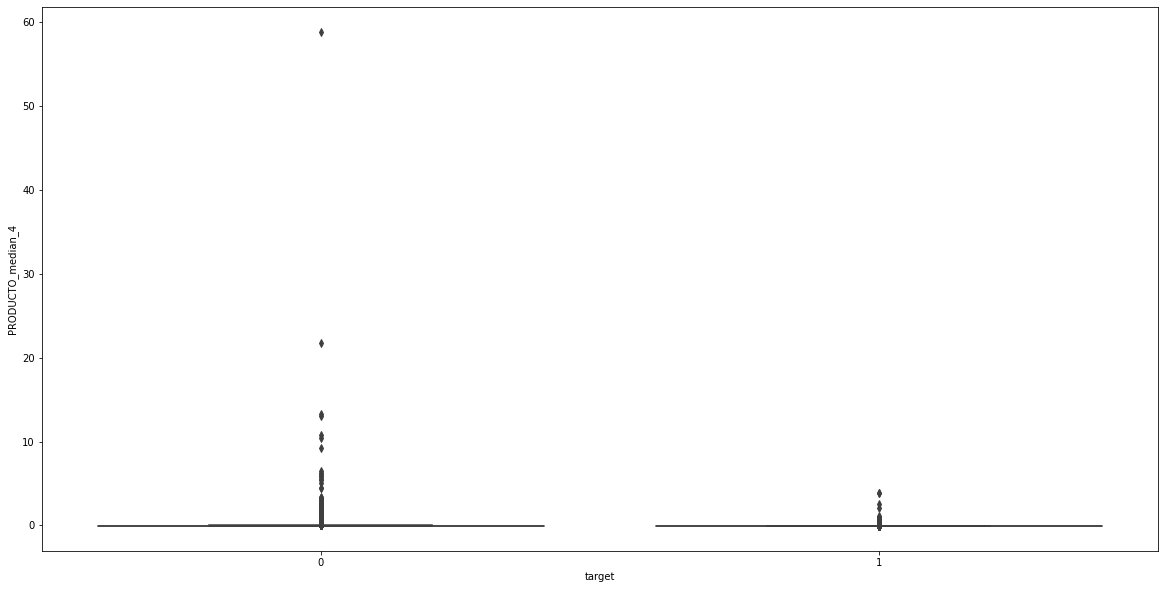

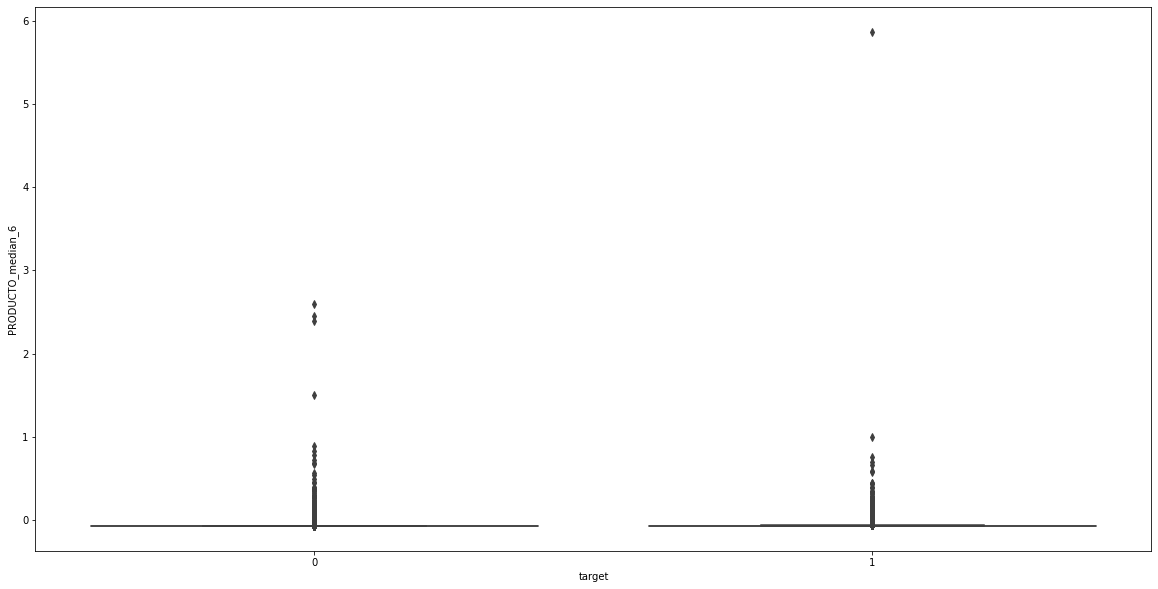

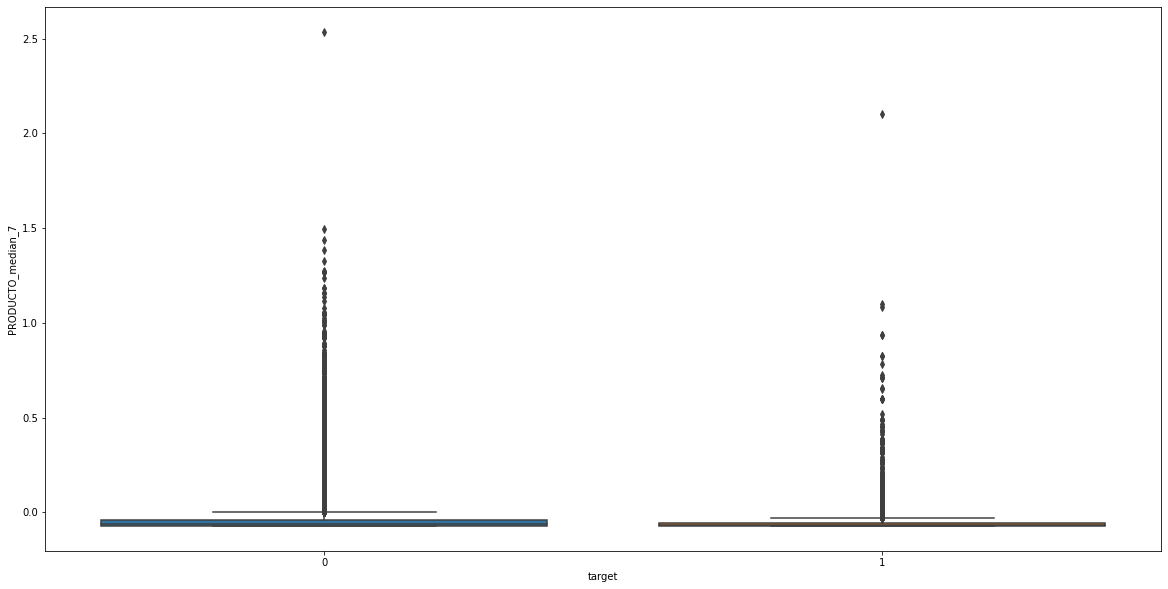

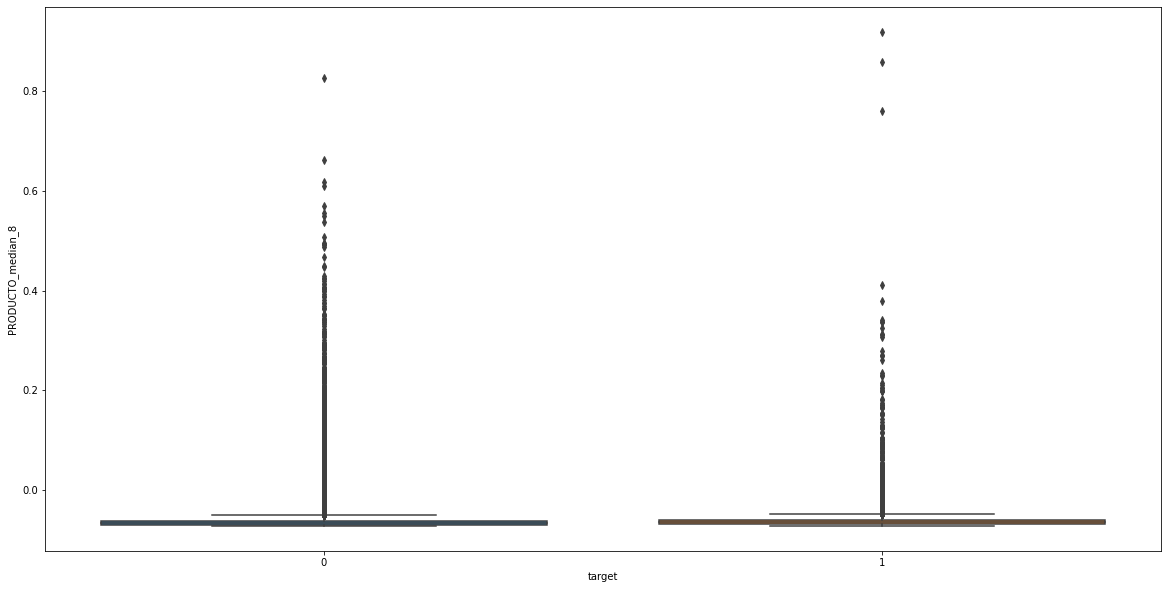

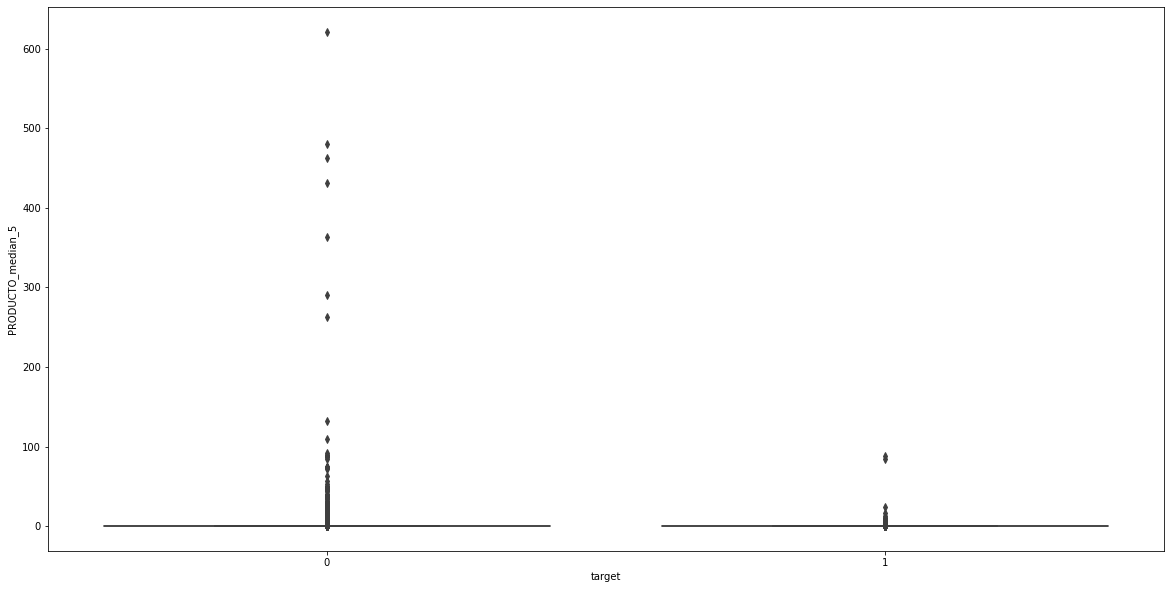

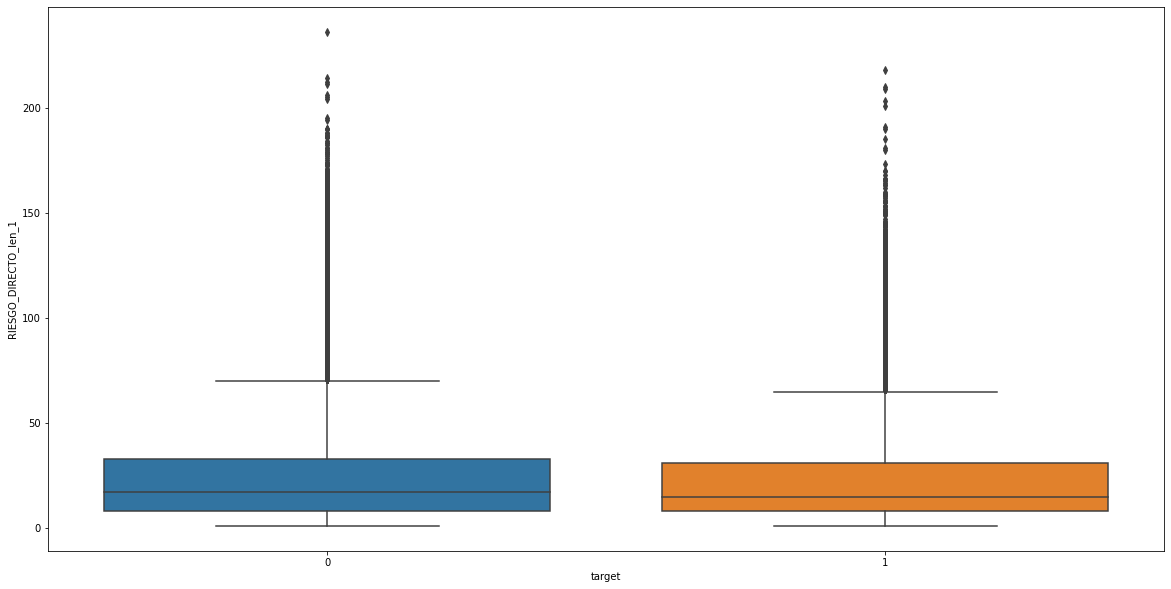

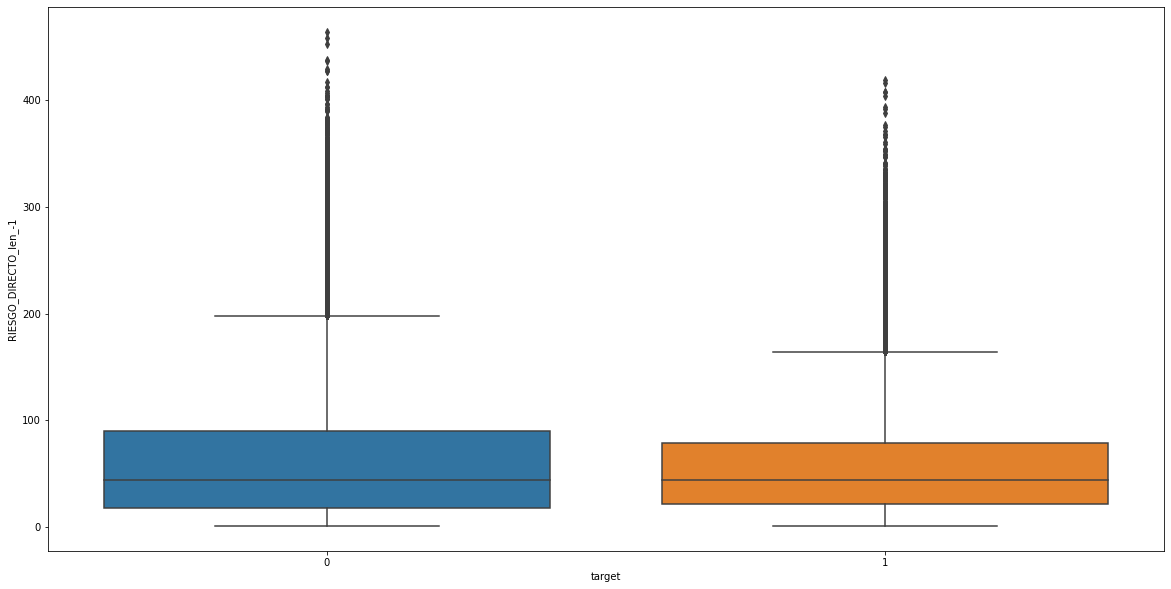

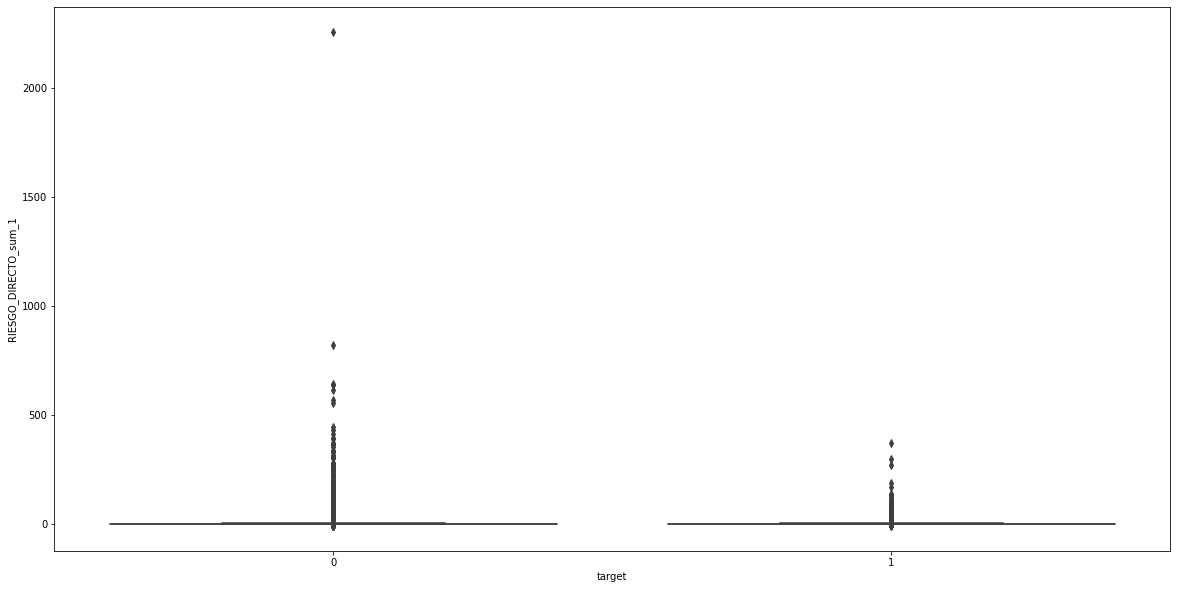

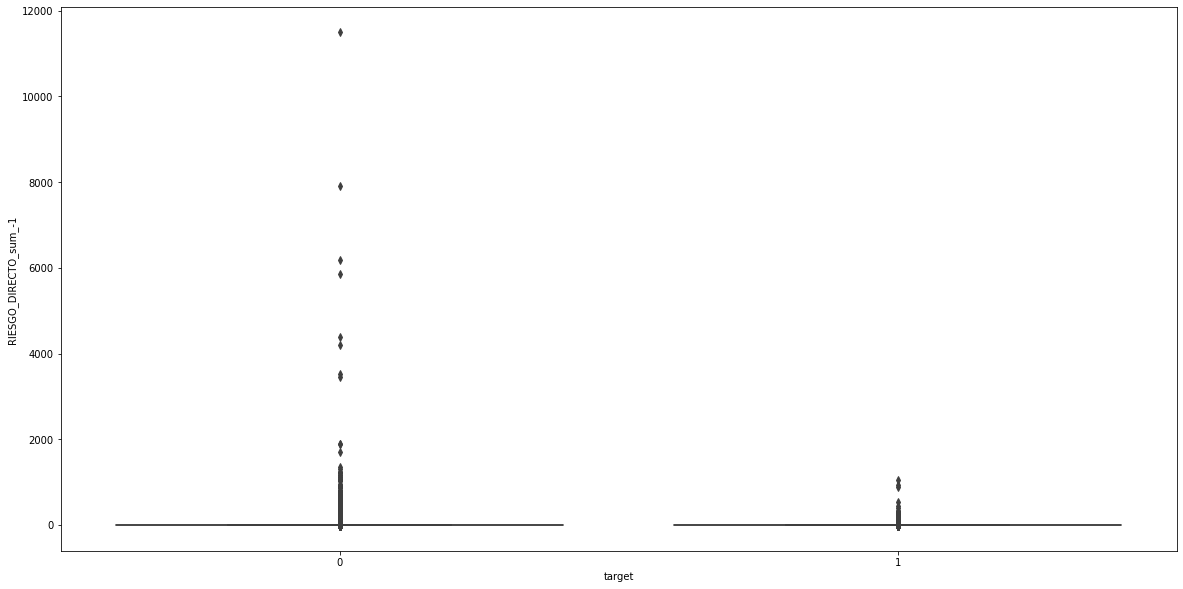

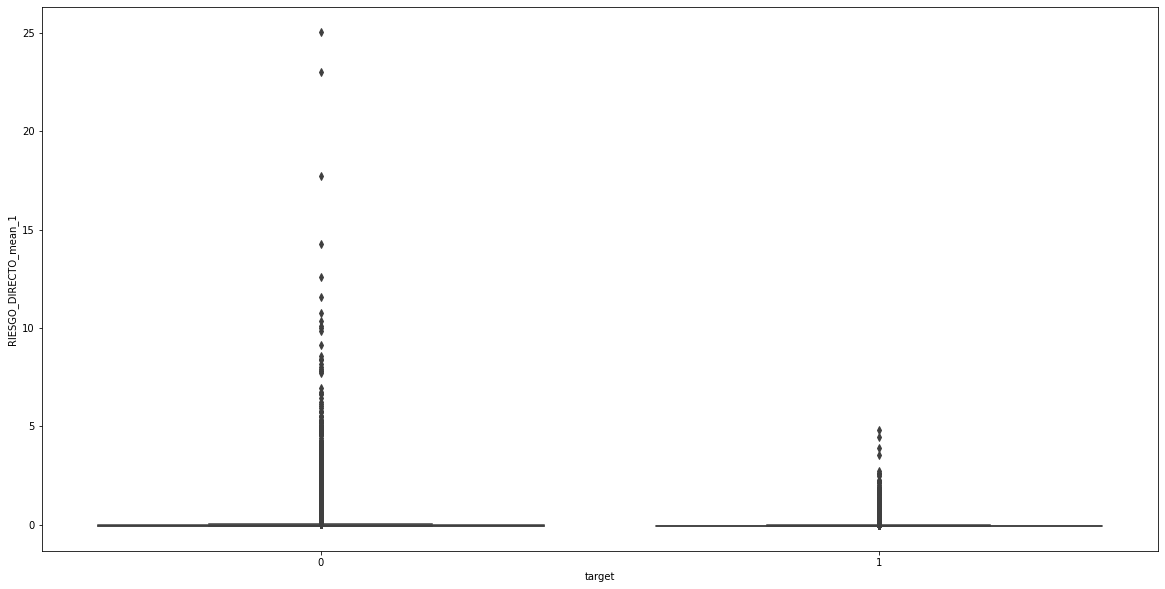

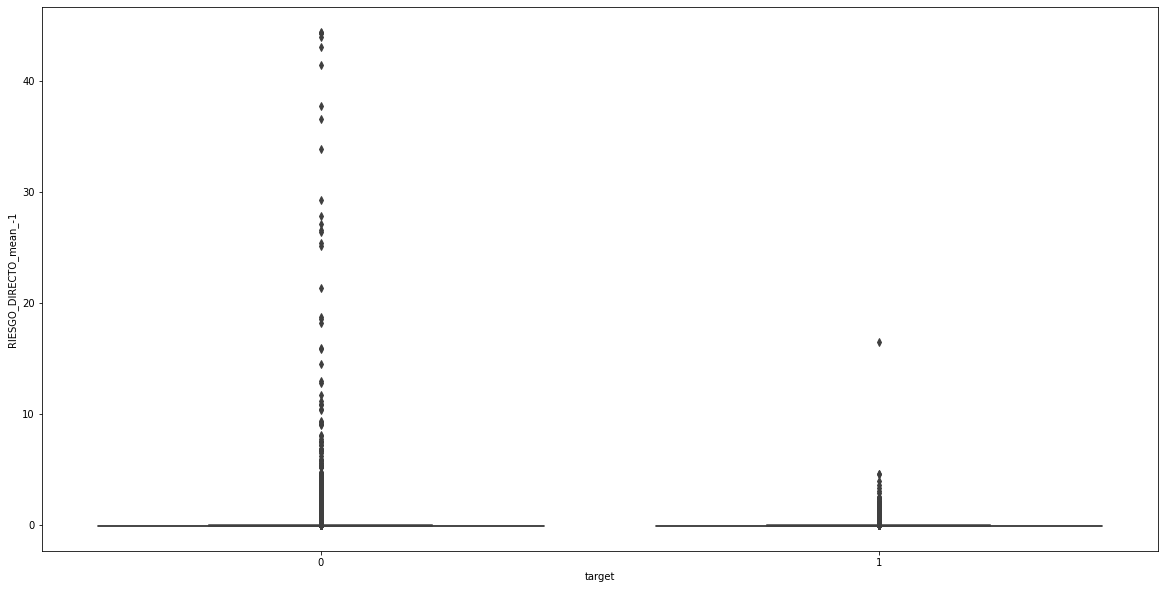

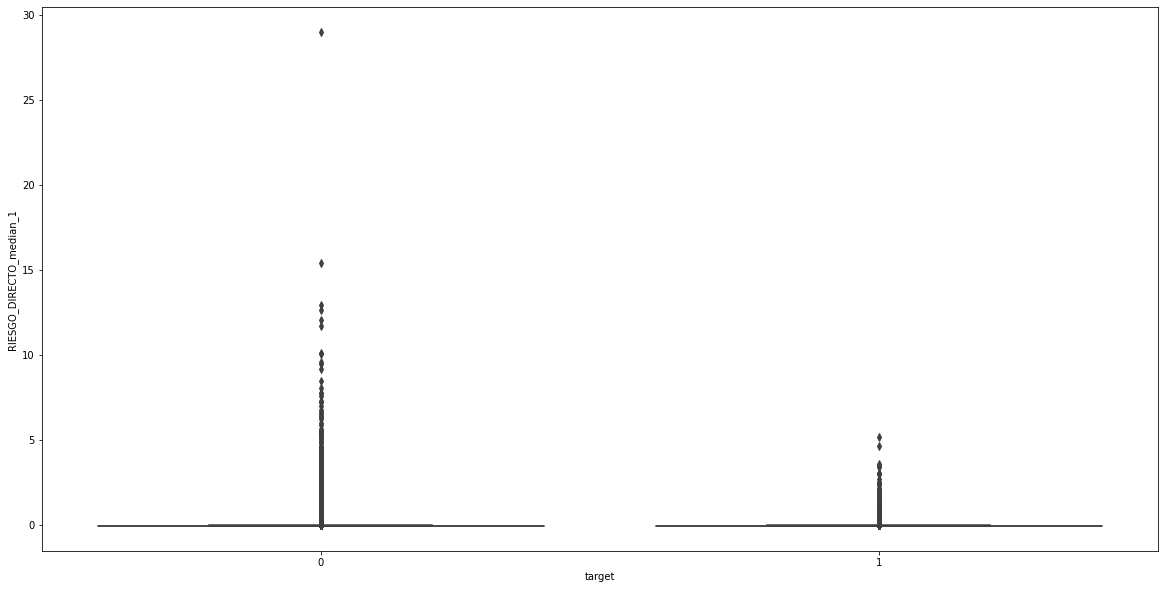

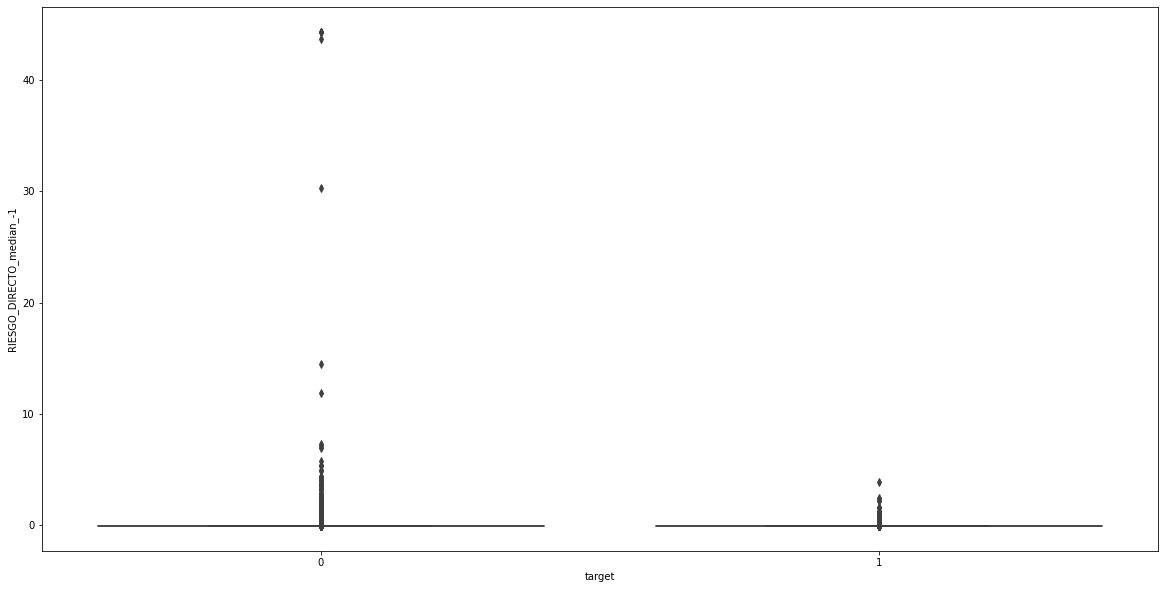

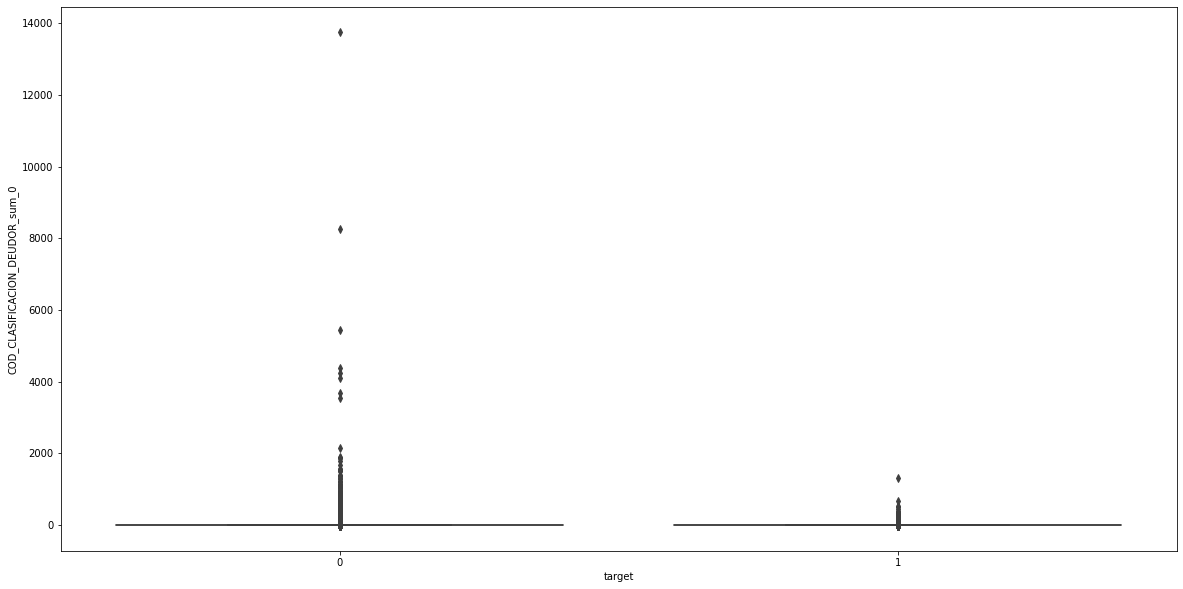

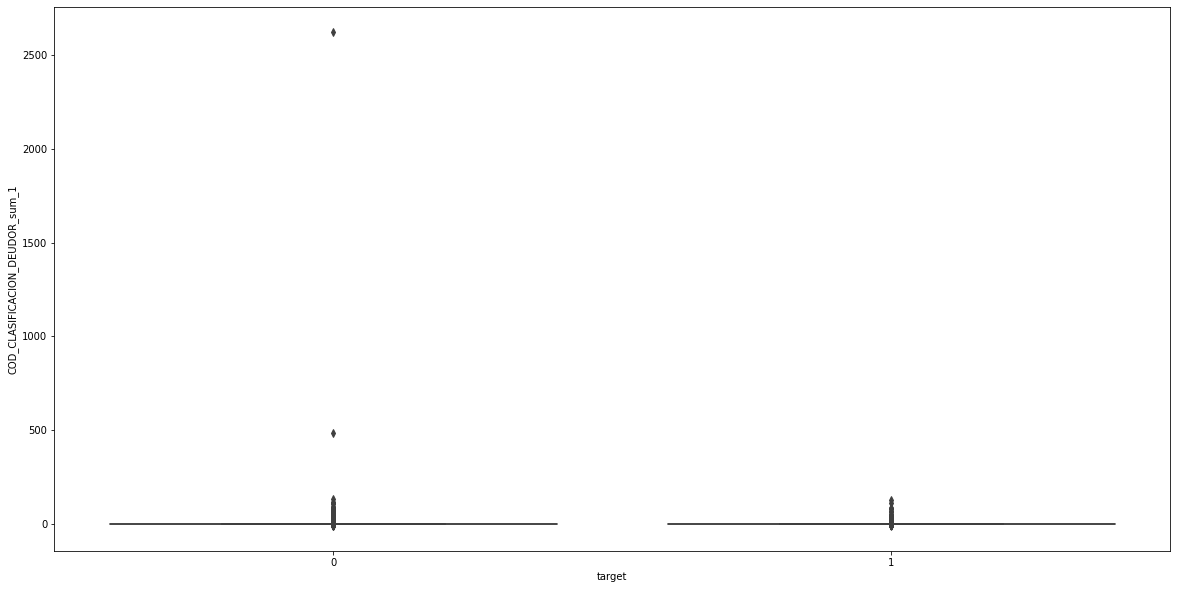

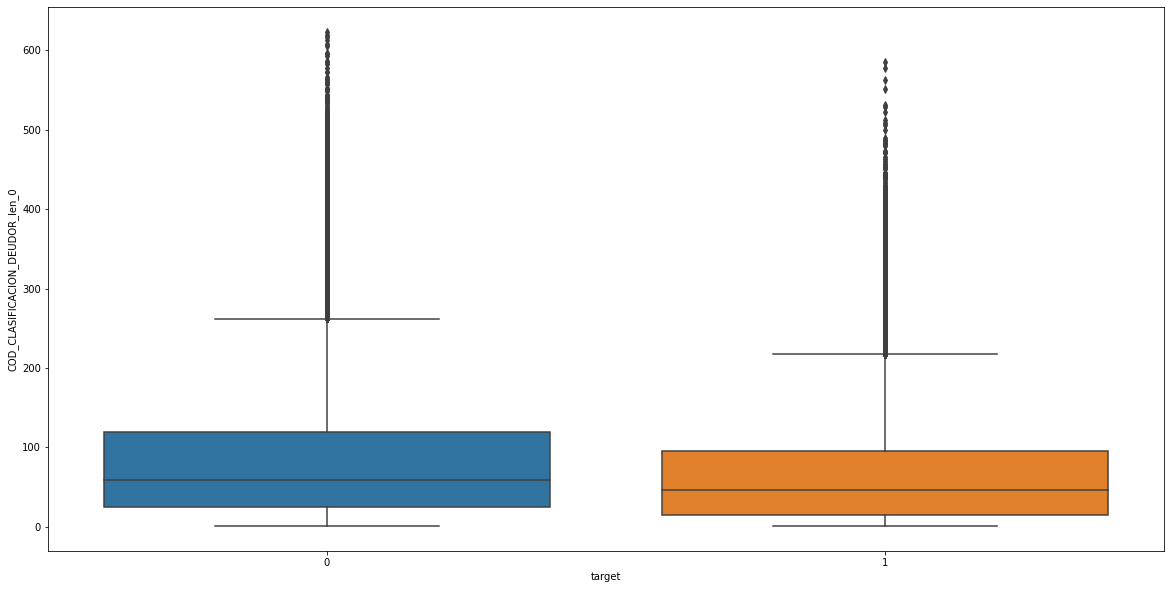

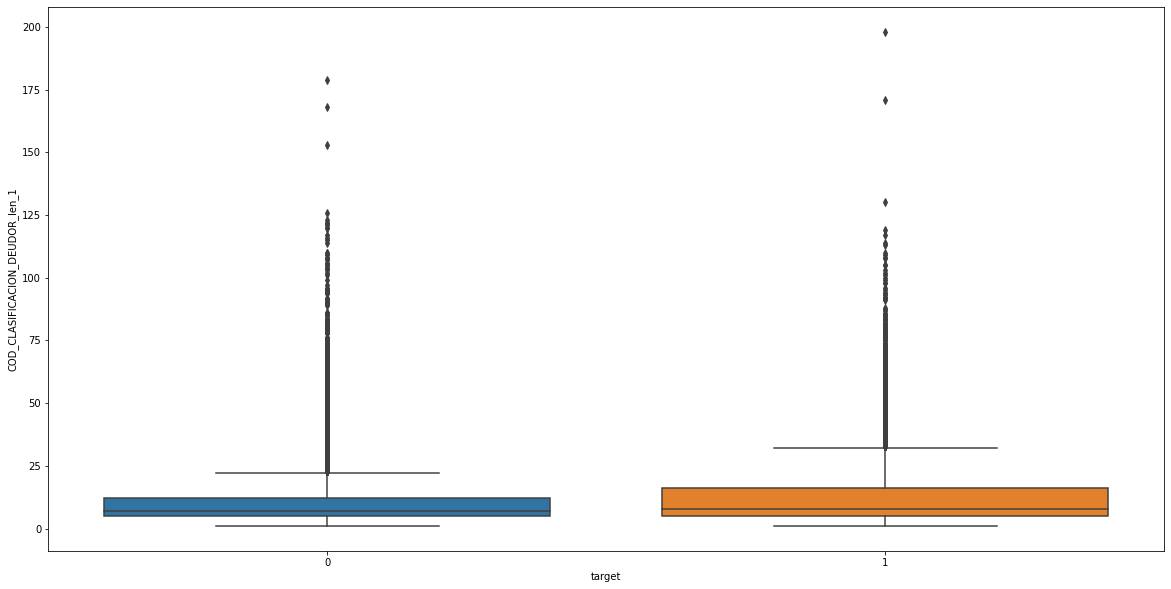

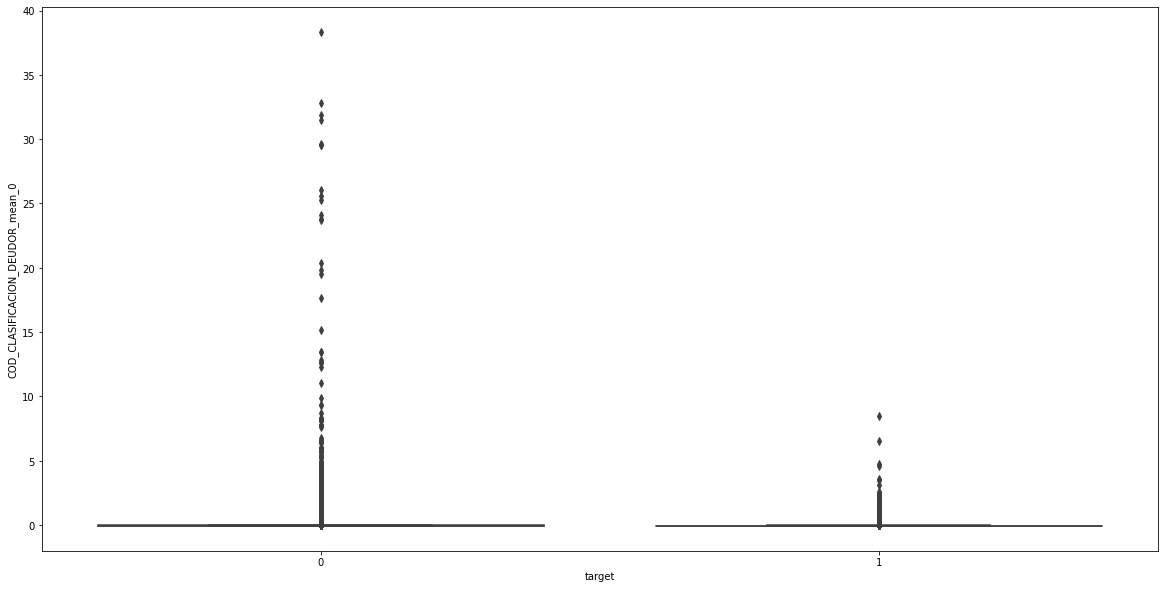

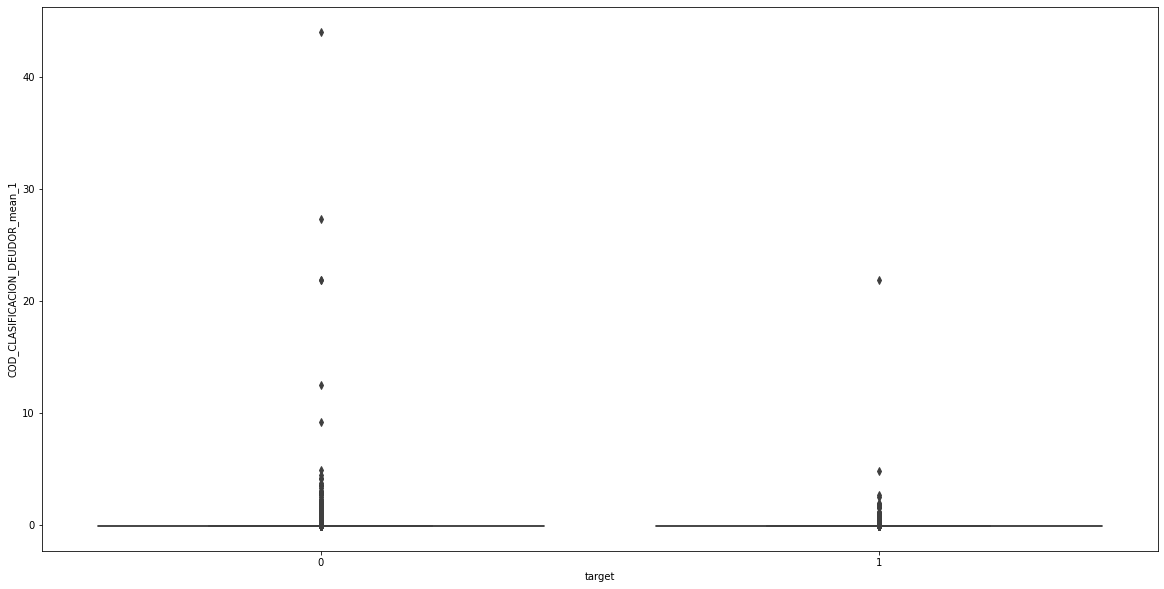

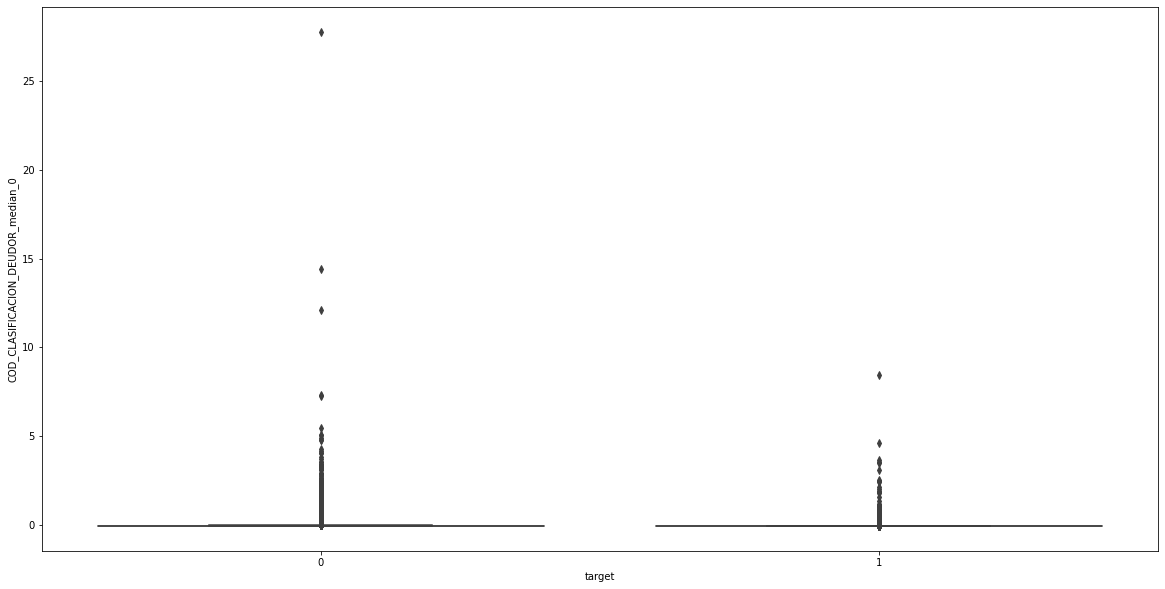

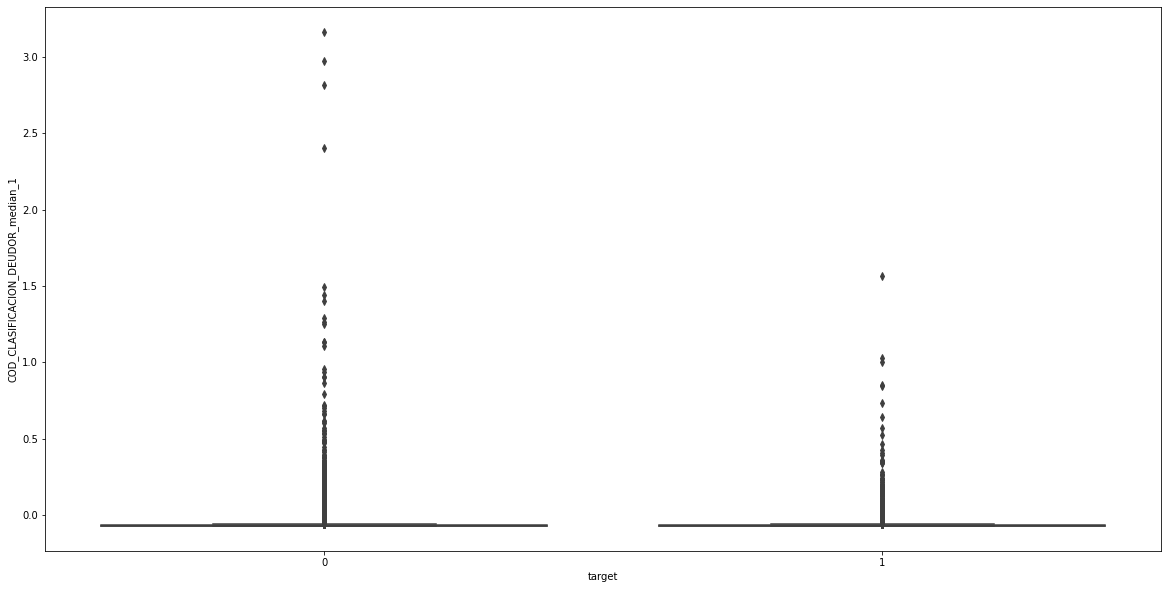

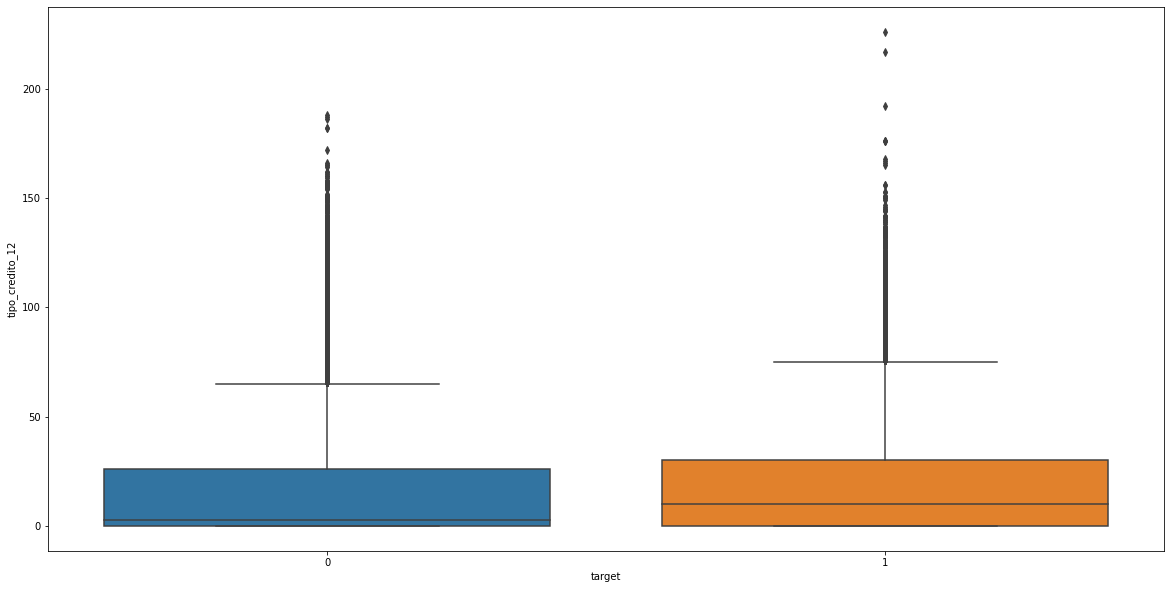

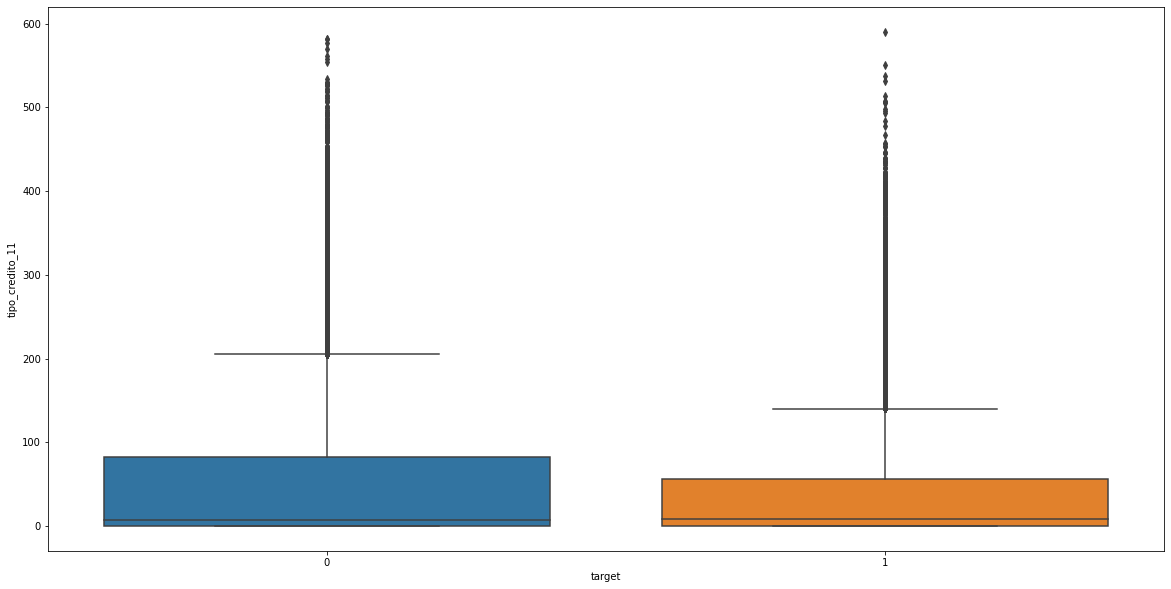

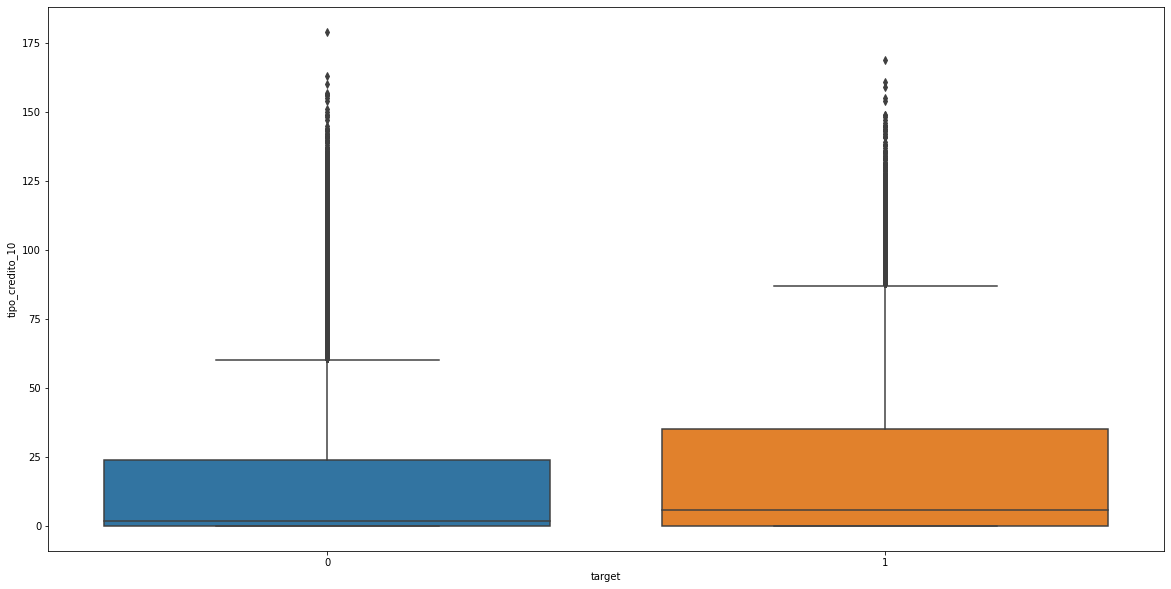

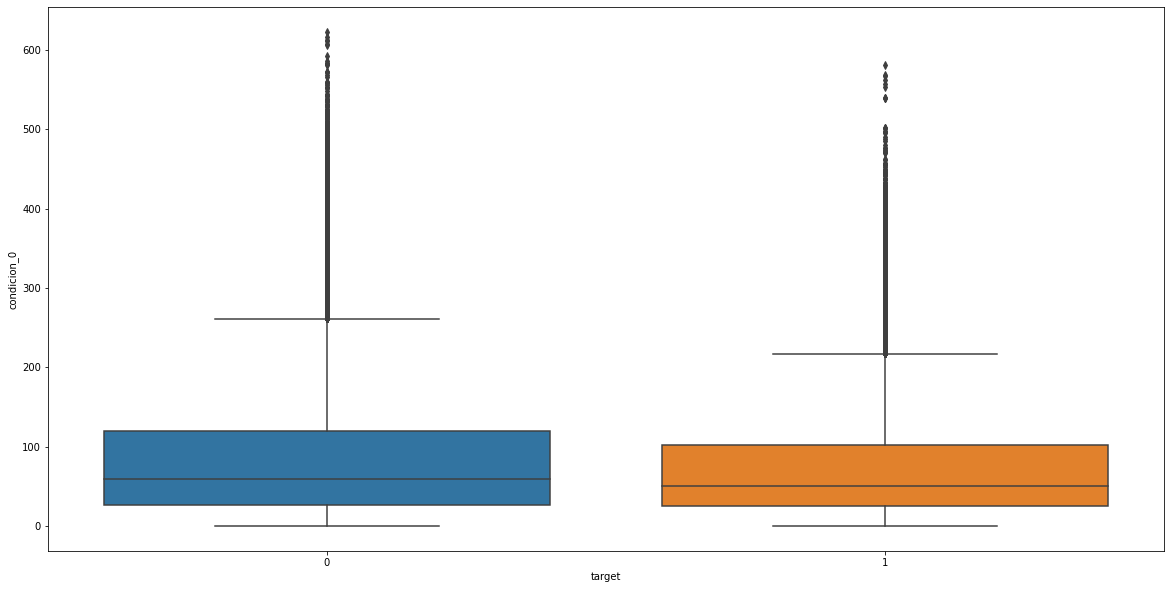

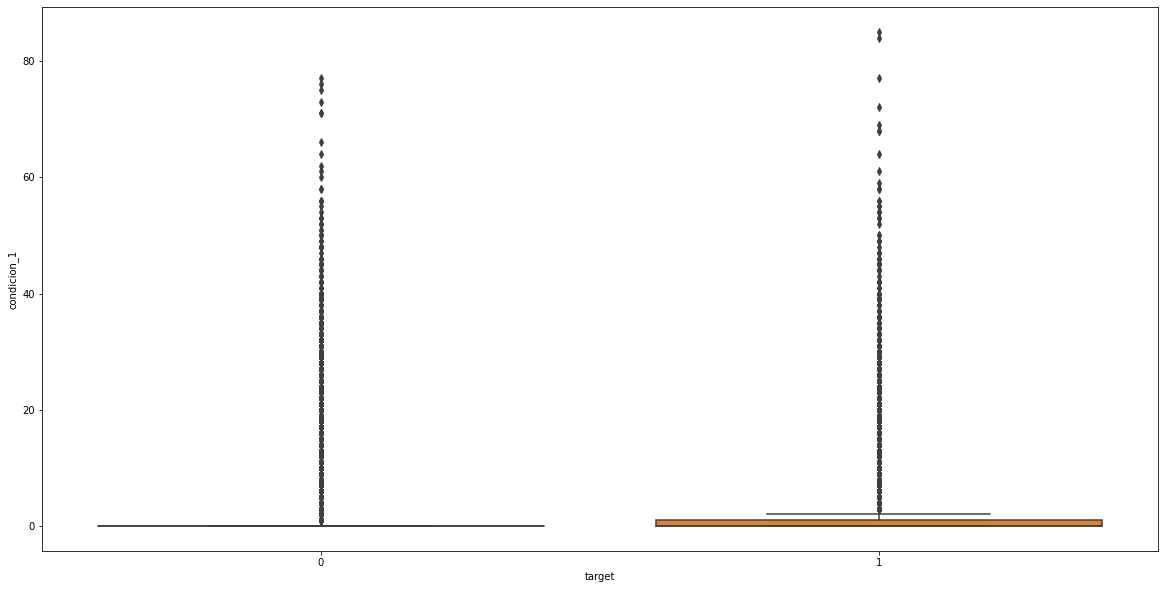

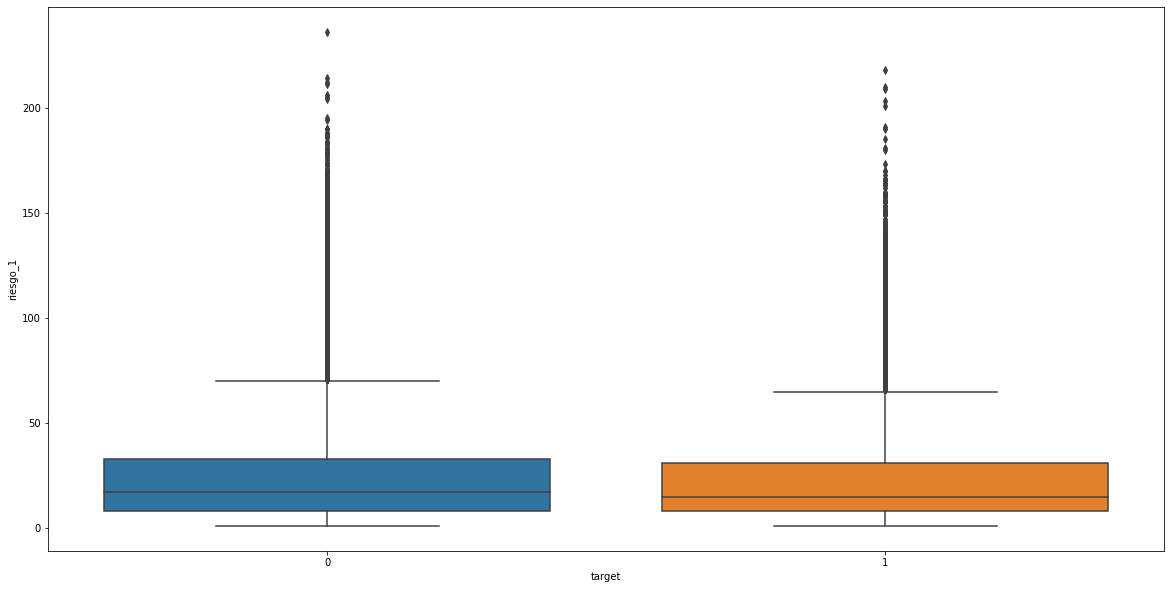

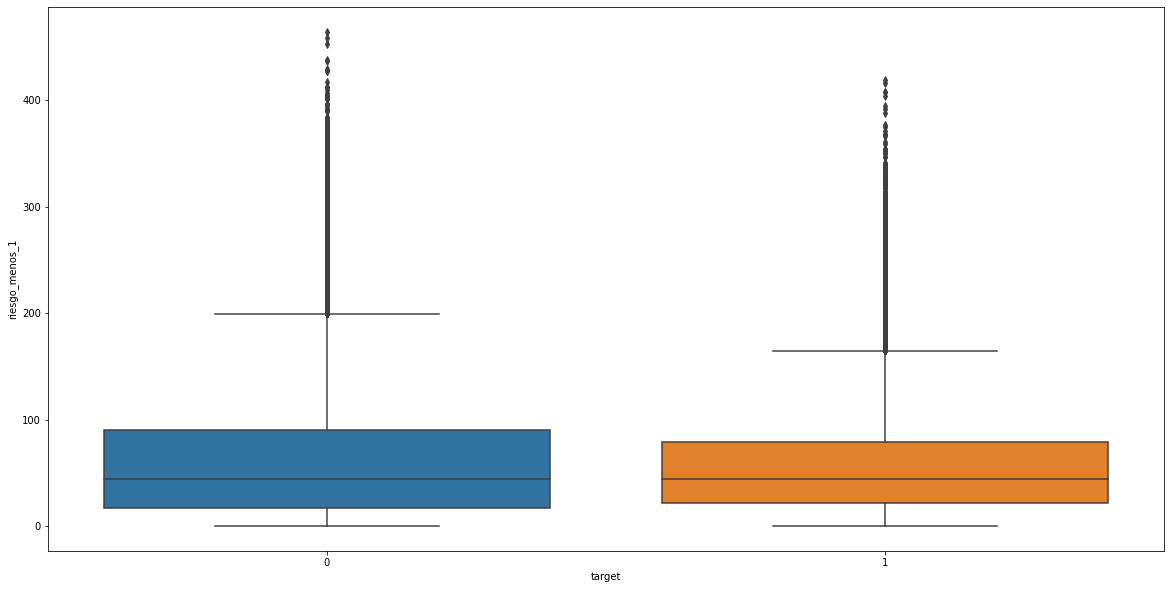

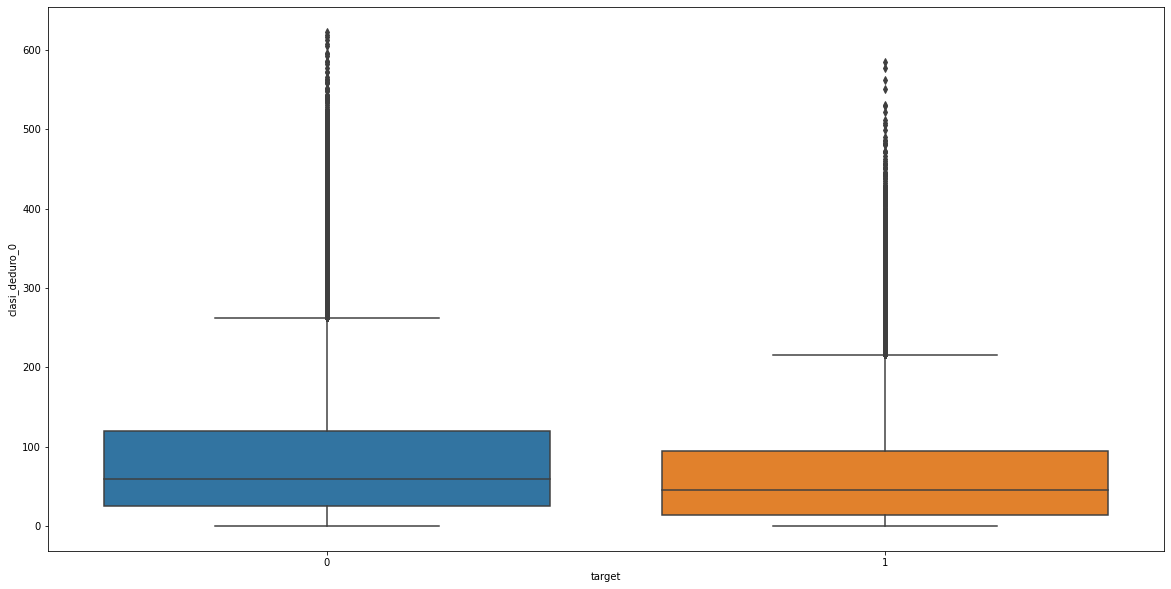

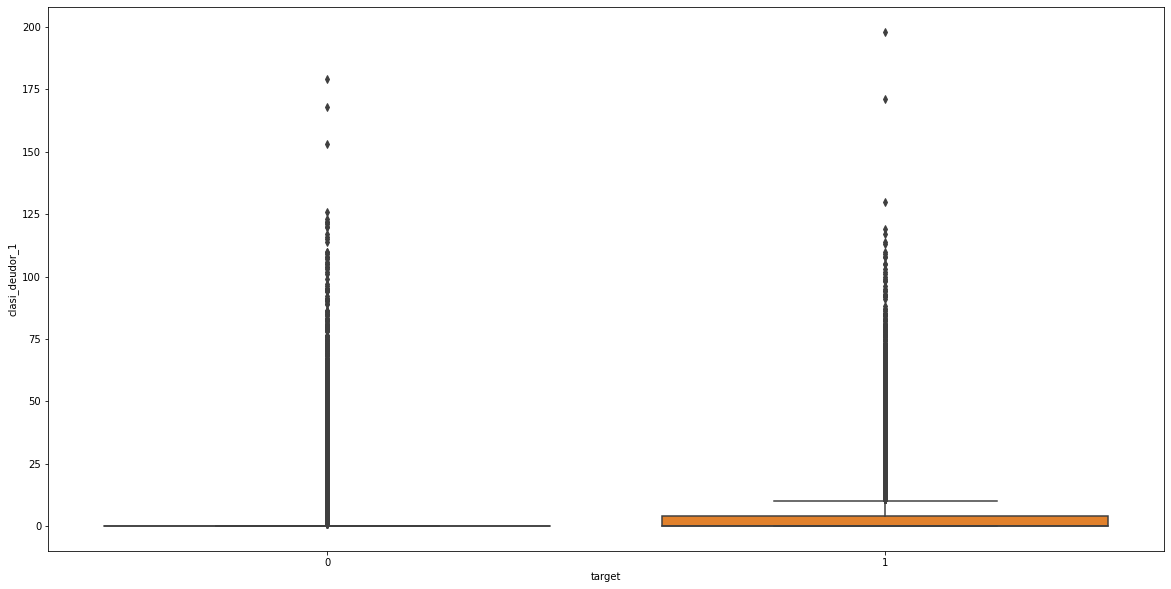

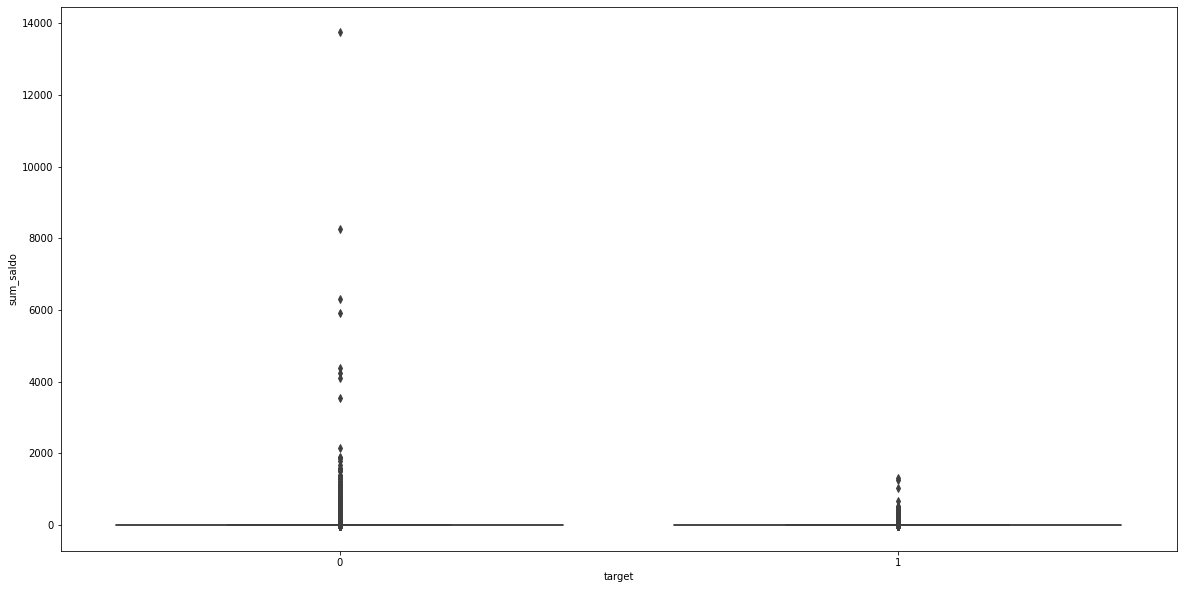

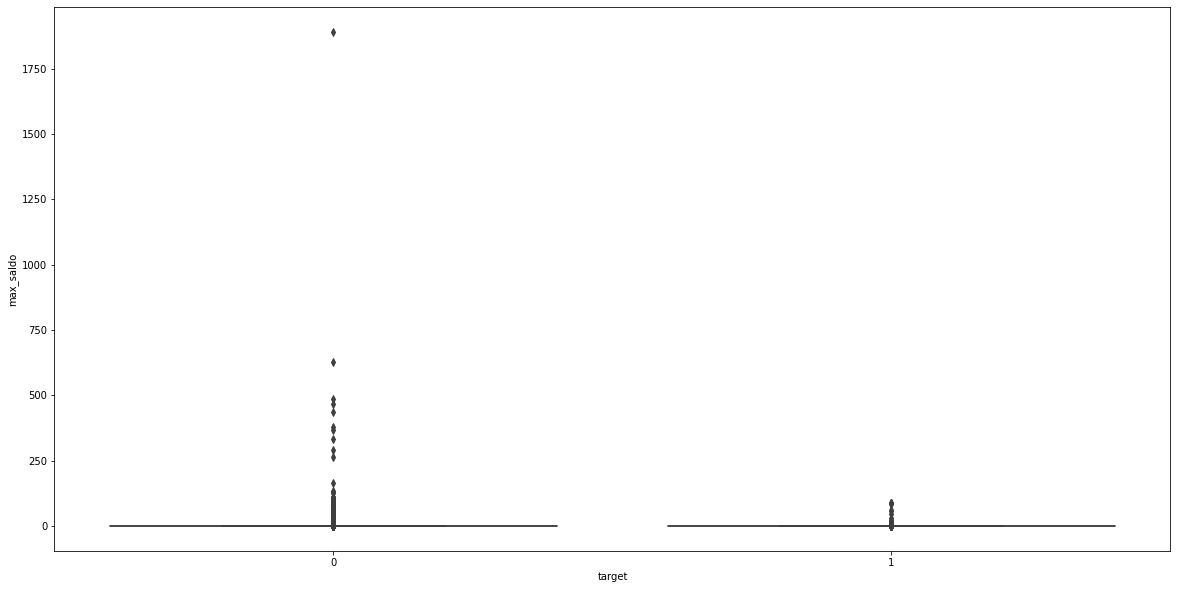

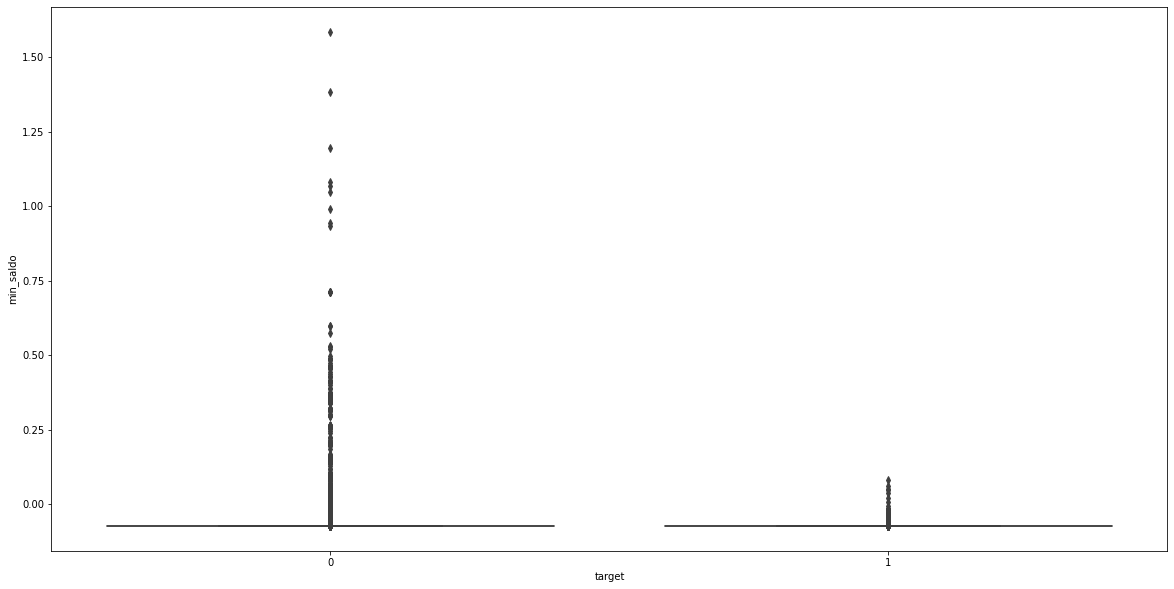

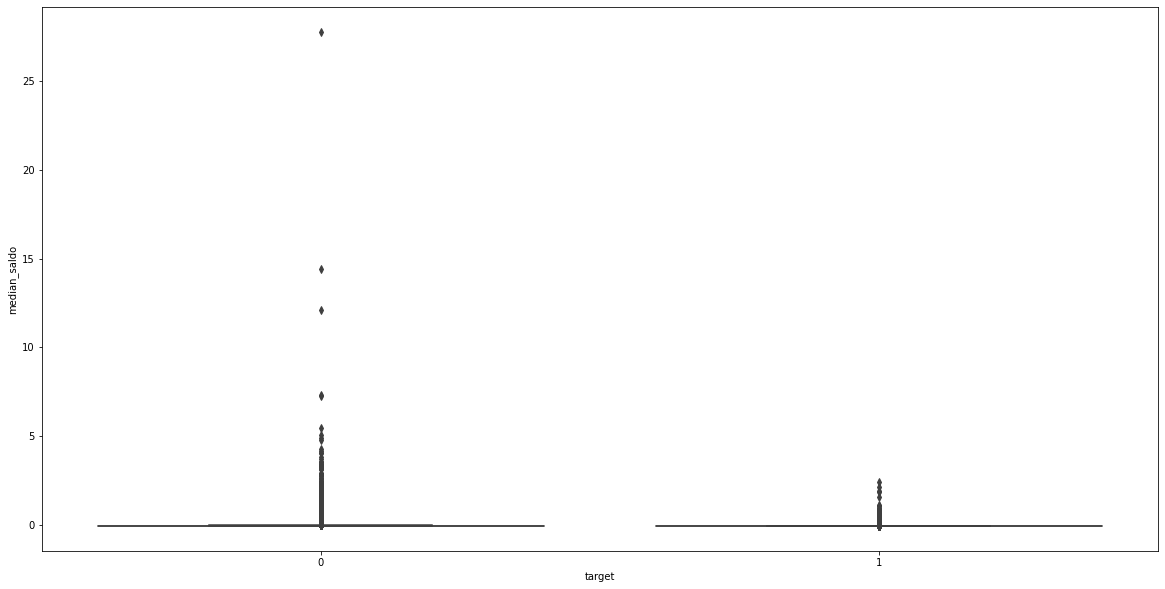

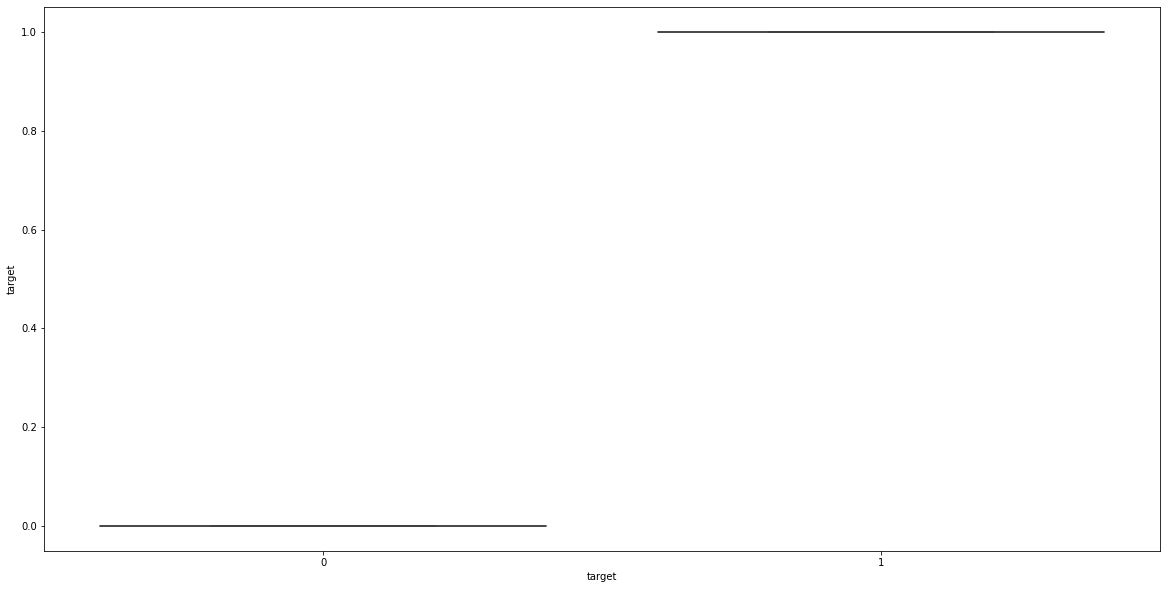

In [301]:
for x in bd_train.columns:
    fig, ax = plt.subplots(figsize=(20, 10))
    ax = sb.boxplot(y=x, x="target", data=bd_train)

In [302]:
#import seaborn as sns, numpy as np
#sns.histplot(data=bd_train, x="COD_CLASIFICACION_DEUDOR_sum_1", hue="target")

In [303]:
bd_train=bd_train.fillna(0)

## Modelo de Regresión logistica

In [304]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report # Nos indicara la precision de nuestro modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [305]:
# División de los datos en train y test
# ==============================================================================
X = bd_train.loc[:, bd_train.columns!= 'key_value']
X = bd_train.loc[:, bd_train.columns!= 'target']
y = bd_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [306]:
regresion_logistica_1 = LogisticRegression() # Creamos la instancia
regresion_logistica_1.fit(X_train,y_train)   # Ajustamos el modelo con los datos de entrenamiento

D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [307]:
prediccion=regresion_logistica_1.predict(X_test) 

In [308]:
print (classification_report(y_test,prediccion))


              precision    recall  f1-score   support

           0       0.86      0.98      0.92     60416
           1       0.65      0.16      0.26     11282

    accuracy                           0.85     71698
   macro avg       0.76      0.57      0.59     71698
weighted avg       0.83      0.85      0.81     71698



In [309]:
confusion_matrix(y_test,prediccion)

array([[59443,   973],
       [ 9484,  1798]], dtype=int64)

In [310]:
# Indicador de probabilidad: AUC que mide cuanto más esta aportando respecto de un modelo aleatorio
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
AUC=roc_auc_score(y_test, prediccion)
AUC

0.5716319504628453

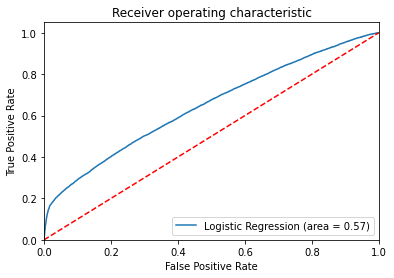

In [311]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, prediccion)
fpr, tpr, thresholds = roc_curve(y_test, regresion_logistica_1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Selección de variables con random forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [104]:
# primera versión modeo RF
rf = RandomForestClassifier(n_estimators=100, random_state=2020)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [105]:
## Importancia de variables con rf
from eli5.sklearn import PermutationImportance
import eli5
perm = PermutationImportance(rf, scoring='f1').fit(X_test, y_test)


In [106]:
eli5.show_weights(perm, feature_names=X.columns.tolist())


Weight,Feature
0.0139 ± 0.0007,condicion_len_4
0.0060 ± 0.0007,condicion_sum_4
0.0058 ± 0.0006,condicion_median_4
0.0047 ± 0.0003,condicion_mean_4
0.0041 ± 0.0019,PRODUCTO_mean_6
0.0041 ± 0.0012,PRODUCTO_median_3
0.0039 ± 0.0010,PRODUCTO_len_6
0.0035 ± 0.0006,PRODUCTO_median_4
0.0033 ± 0.0006,PRODUCTO_sum_0
0.0032 ± 0.0009,PRODUCTO_mean_8


In [312]:
columnas1=['condicion_len_4',
'condicion_sum_4',
'condicion_median_4',
'condicion_mean_4',
'PRODUCTO_mean_6',
'PRODUCTO_median_3',
'PRODUCTO_len_6',
'PRODUCTO_median_4',
'PRODUCTO_sum_0',
'PRODUCTO_mean_8',
'PRODUCTO_mean_4',
'tipo_credito_median_11',
'COD_CLASIFICACION_DEUDOR_len_1',
'COD_CLASIFICACION_DEUDOR_len_0',
'PRODUCTO_len_8',
'PRODUCTO_mean_3',
'PRODUCTO_sum_8',
'PRODUCTO_mean_7',
'PRODUCTO_median_8',
'target']

In [313]:
columnas2=['PRODUCTO_mean_6',
'RIESGO_DIRECTO_len_-1',
'COD_CLASIFICACION_DEUDOR_len_0',
'PRODUCTO_len_6',
'condicion_len_4',
'condicion_median_4',
'condicion_mean_4',
'tipo_credito_len_12',
'tipo_credito_mean_11',
'PRODUCTO_mean_4',
'PRODUCTO_len_3',
'condicion_sum_4',
'tipo_credito_median_11',
'COD_CLASIFICACION_DEUDOR_len_1',
'PRODUCTO_mean_3',
'tipo_credito_len_10',
'PRODUCTO_median_3',
'PRODUCTO_sum_1',
'RIESGO_DIRECTO_median_-1',
'RIESGO_DIRECTO_mean_1',
'target']

In [314]:
columnas3=['PRODUCTO_mean_6',
'RIESGO_DIRECTO_len_-1',
'COD_CLASIFICACION_DEUDOR_len_0',
'PRODUCTO_len_6',
'condicion_len_4',
'condicion_median_4',
'condicion_mean_4',
'tipo_credito_len_12',
'tipo_credito_mean_11',
'PRODUCTO_mean_4',
'target']

In [315]:
columnas4=['condicion_len_4',
'condicion_sum_4',
'condicion_median_4',
'condicion_mean_4',
'PRODUCTO_mean_6',
'PRODUCTO_median_3',
'PRODUCTO_len_6',
'PRODUCTO_median_4',
'PRODUCTO_sum_0',
'PRODUCTO_mean_8',
'target']

In [316]:
# División de los datos en train y test
# ==============================================================================
bd_train2=bd_train[columnas2]
X = bd_train2.loc[:, bd_train2.columns!= 'target']
y = bd_train2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [317]:
regresion_logistica_2 = LogisticRegression() # Creamos la instancia
regresion_logistica_2.fit(X_train,y_train)   # Ajustamos el modelo con los datos de entrenamiento

D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [318]:
prediccion2=regresion_logistica_2.predict(X_test) 

In [319]:
prediccion2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [320]:
print (classification_report(y_test,prediccion2))


              precision    recall  f1-score   support

           0       0.86      0.99      0.92     60416
           1       0.78      0.12      0.21     11282

    accuracy                           0.86     71698
   macro avg       0.82      0.56      0.57     71698
weighted avg       0.85      0.86      0.81     71698



In [321]:
AUC=roc_auc_score(y_test, prediccion2)
AUC

0.5589315793761962

### Enlaces asimetricos Cloglog

In [322]:
### reclasificar nombre de variables
bd_train2=bd_train[columnas2]
bd_train2['RIESGO_DIRECTO_len_menos_1']=bd_train2['RIESGO_DIRECTO_len_-1']
bd_train2['RIESGO_DIRECTO_median_menos_1']=bd_train2['RIESGO_DIRECTO_median_-1']

D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [323]:
# División de los datos en train y test
# ==============================================================================
X = bd_train2
y = bd_train2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [324]:
# Feature Scaling
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [325]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [326]:
formula2 = 'target ~ PRODUCTO_mean_6 + RIESGO_DIRECTO_len_menos_1+COD_CLASIFICACION_DEUDOR_len_0 + PRODUCTO_len_6+condicion_len_4 + condicion_median_4 + condicion_mean_4 + tipo_credito_len_12 + tipo_credito_mean_11 + PRODUCTO_mean_4+PRODUCTO_len_3 +condicion_sum_4 +tipo_credito_median_11 +COD_CLASIFICACION_DEUDOR_len_1 +PRODUCTO_mean_3 +tipo_credito_len_10 +PRODUCTO_median_3 +PRODUCTO_sum_1 +RIESGO_DIRECTO_median_menos_1 +RIESGO_DIRECTO_mean_1'

formula4 = 'target ~ condicion_len_4+condicion_sum_4+condicion_median_4+condicion_mean_4+PRODUCTO_mean_6+PRODUCTO_median_3+PRODUCTO_len_6+PRODUCTO_median_4+PRODUCTO_sum_0+PRODUCTO_mean_8'

formula1 = 'target ~condicion_len_4+ condicion_sum_4+condicion_median_4+condicion_mean_4+PRODUCTO_mean_6+PRODUCTO_median_3+PRODUCTO_len_6+PRODUCTO_median_4+PRODUCTO_sum_0+PRODUCTO_mean_8+PRODUCTO_mean_4+tipo_credito_median_11+COD_CLASIFICACION_DEUDOR_len_1+COD_CLASIFICACION_DEUDOR_len_0+PRODUCTO_len_8+PRODUCTO_mean_3+PRODUCTO_sum_8+PRODUCTO_mean_7+PRODUCTO_median_8'

In [327]:
model = smf.glm(formula = formula2, data=X_train, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:               286789
Model:                            GLM   Df Residuals:                   286768
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0996e+05
Date:                Thu, 20 May 2021   Deviance:                   2.1992e+05
Time:                        18:27:50   Pearson chi2:                 3.15e+12
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [328]:
predictions = result.predict(X_test)
predictions_nominal = [ 0 if x < np.mean(predictions) else 1 for x in predictions]

In [329]:
print(classification_report(y_test, 
                            predictions_nominal, 
                            digits = 3))

              precision    recall  f1-score   support

           0      0.906     0.715     0.799     60416
           1      0.284     0.605     0.386     11282

    accuracy                          0.698     71698
   macro avg      0.595     0.660     0.593     71698
weighted avg      0.808     0.698     0.734     71698



In [330]:
AUC=roc_auc_score(y_test, predictions_nominal)
AUC

0.6597423951133161

In [ ]:
##ROC1: 0.6425888040754697
##ROC2: 0.6597423951133161
##ROC4: 0.615680780600716

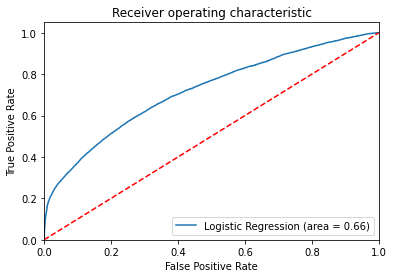

In [331]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions_nominal)
fpr, tpr, thresholds = roc_curve(y_test, result.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
###modelo cloglog

In [332]:
model_cloglog = smf.glm(formula = formula2, data=X_train, family=sm.families.Binomial(sm.families.links.cloglog))
result_cloglog = model_cloglog.fit()
print(result_cloglog.summary())

D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.
D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsm

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:               286789
Model:                            GLM   Df Residuals:                   286768
Model Family:                Binomial   Df Model:                           20
Link Function:                cloglog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 20 May 2021   Deviance:                          nan
Time:                        18:29:02   Pearson chi2:                 7.57e+20
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [333]:
predictions_cloglog = result_cloglog.predict(X_test)
predictions_nominal = [ 0 if x < np.mean(predictions_cloglog) else 1 for x in predictions_cloglog]

D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:798: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-np.exp(z))


In [334]:
print(classification_report(y_test, 
                            predictions_nominal, 
                            digits = 3))

              precision    recall  f1-score   support

           0      0.827     0.383     0.524     60416
           1      0.148     0.572     0.235     11282

    accuracy                          0.413     71698
   macro avg      0.487     0.477     0.379     71698
weighted avg      0.720     0.413     0.478     71698



In [335]:
AUC=roc_auc_score(y_test, predictions_nominal)
AUC

0.47738636008329605

In [336]:
model_probit = smf.glm(formula = formula2, data=X_train, family=sm.families.Binomial(sm.families.links.probit))
result_probit = model_probit.fit()
print(result_probit.summary())

D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.
D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsm

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:               286789
Model:                            GLM   Df Residuals:                   286768
Model Family:                Binomial   Df Model:                           20
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 20 May 2021   Deviance:                          nan
Time:                        18:31:46   Pearson chi2:                 2.87e+20
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [337]:
predictions_probit = result_probit.predict(X_test)
predictions_nominal = [ 0 if x < np.mean(predictions_probit) else 1 for x in predictions_probit]

In [338]:
print(classification_report(y_test, 
                            predictions_nominal, 
                            digits = 3))

              precision    recall  f1-score   support

           0      0.846     0.899     0.871     60416
           1      0.185     0.123     0.148     11282

    accuracy                          0.777     71698
   macro avg      0.515     0.511     0.510     71698
weighted avg      0.742     0.777     0.758     71698



In [339]:
AUC=roc_auc_score(y_test, predictions_nominal)
AUC

0.510837314750097

### Random Forest

In [340]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [355]:
bd_train2=bd_train[columnas3]

In [366]:
# División de los datos en train y test
# ==============================================================================

X = bd_train.loc[:, bd_train.columns!= 'key_value']
X = bd_train.loc[:, bd_train.columns!= 'target']
y = bd_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [367]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [368]:
# primera versión modeo RF
rf = RandomForestClassifier(n_estimators=20, random_state=2020)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=2020)

In [369]:
y_pred = (rf.predict_proba(X_test)[:,1] >= np.mean(rf.predict_proba(X_test))).astype(bool) # set threshold as 0.3

In [370]:
np.mean(rf.predict_proba(X_test))

0.5

In [371]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[58605  1740]
 [ 7998  3355]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     60345
           1       0.66      0.30      0.41     11353

    accuracy                           0.86     71698
   macro avg       0.77      0.63      0.67     71698
weighted avg       0.84      0.86      0.84     71698

0.8641803118636503


In [372]:
#AUC RF1: 0.6328679698673492
#AUC RF2: 0.6292843588125226
#AUC RF3: 0.6333412001050333
#AUC RF4: 0.6363010208347983
AUC=roc_auc_score(y_test,y_pred)
AUC

0.6333412001050333

In [392]:
bd_train2=bd_train[columnas2]

In [393]:
# Class count
count_class_0, count_class_1 = bd_train2.target.value_counts()

# Divide by class
df_class_0 = bd_train2[bd_train['target'] == 0]
df_class_1 = bd_train2[bd_train['target'] == 1]


In [394]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)


In [395]:
# División de los datos en train y test
# ==============================================================================
#X = df_test_under.loc[:, df_test_under.columns!= 'key_value']
X = df_test_under.loc[:, df_test_under.columns!= 'target']
y = df_test_under['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [396]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [397]:
# primera versión modeo RF
rf = RandomForestClassifier(n_estimators=20, random_state=2020)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=2020)

In [398]:
y_pred = (rf.predict_proba(X_test)[:,1] >= np.mean(rf.predict_proba(X_test))).astype(bool) # set threshold as 0.3

In [399]:
np.mean(rf.predict_proba(X_test))

0.5

In [400]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[7593 3799]
 [3362 7930]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68     11392
           1       0.68      0.70      0.69     11292

    accuracy                           0.68     22684
   macro avg       0.68      0.68      0.68     22684
weighted avg       0.68      0.68      0.68     22684

0.6843149356374537


In [401]:
AUC=roc_auc_score(y_test,y_pred)
AUC

0.6843937284574544

In [ ]:
#rf balanceado_3:0.6621064817317961
#rf balanceado_1:0.6782517552448387
#rf balanceado_2:0.6843937284574544

In [ ]:
#regresión logistica balanceada 

In [402]:
### reclasificar nombre de variables
bd_train2=bd_train[columnas2]
bd_train2['RIESGO_DIRECTO_len_menos_1']=bd_train2['RIESGO_DIRECTO_len_-1']
bd_train2['RIESGO_DIRECTO_median_menos_1']=bd_train2['RIESGO_DIRECTO_median_-1']


D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Users\orafaelt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [410]:
# División de los datos en train y test
# ==============================================================================
X = df_test_under
X['RIESGO_DIRECTO_len_menos_1']=X['RIESGO_DIRECTO_len_-1']
X['RIESGO_DIRECTO_median_menos_1']=X['RIESGO_DIRECTO_median_-1']
y = df_test_under['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [411]:
model = smf.glm(formula = formula2, data=X_train, family=sm.families.Binomial())
result = model.fit()
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                90736
Model:                            GLM   Df Residuals:                    90715
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55175.
Date:                Thu, 20 May 2021   Deviance:                   1.1035e+05
Time:                        19:10:35   Pearson chi2:                 9.42e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [412]:
predictions = result.predict(X_test)
predictions_nominal = [ 0 if x < np.mean(predictions) else 1 for x in predictions]


In [413]:
print(classification_report(y_test, 
                            predictions_nominal, 
                            digits = 3))


              precision    recall  f1-score   support

           0      0.657     0.736     0.694     11423
           1      0.695     0.610     0.650     11261

    accuracy                          0.673     22684
   macro avg      0.676     0.673     0.672     22684
weighted avg      0.676     0.673     0.672     22684



In [414]:
AUC=roc_auc_score(y_test, predictions_nominal)
AUC

0.6729306583713845

## Modelo con Random Forest